### 

--------------arreglo de la imagen 1----------------------------
-------------------mas-----------------------
---------------------------- con X-----------------------------
----------------------------columna Xn- 1----------------------------
--------------arreglo de la imagen 2----------------------------
-------------------mas-----------------------
---------------------------- con X-----------------------------
----------------------------columna Xn- 2----------------------------
--------------arreglo de la imagen 3----------------------------
-------------------mas-----------------------
---------------------------- con X-----------------------------
----------------------------columna Xn- 3----------------------------
--------------arreglo de la imagen 4----------------------------
-------------------mas-----------------------
---------------------------- con X-----------------------------
----------------------------columna Xn- 4----------------------------
--------------arregl

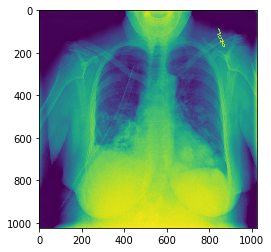

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dicom
import pandas as pd
import h5py
from skimage.transform import rescale, resize, downscale_local_mean



     
        
        
def create_dataset():        

        X=np.array([])


        for m in range(1,10001):





            imagen=(dicom.dcmread("C:\stage_2_train_images/"+str(m)+".dcm"))
            imagen_dicom=np.array(imagen)# FICHERO DICOM******************************
            pixel_arr=np.array(imagen.pixel_array)

            print("--------------arreglo de la imagen "+str(m)+"----------------------------")
                #print(pixel_arr)

            my_image = resize(pixel_arr, (pixel_arr.shape[0] / 2, pixel_arr.shape[1] / 2),anti_aliasing=True)       

                        #plt.imshow(image_resized)

                #my_image = scipy.misc.imresize(pixel_arr, size=(int(pixel_arr.shape[0] / 2),int(pixel_arr.shape[1] / 2)))
                
            print("-------------------mas-----------------------")   
                #print(my_image)

            Xn=my_image.reshape((my_image.shape[0]*my_image.shape[1]),1)# CREAR LAS COLUMNAS Xn

            X=np.append(X,Xn)



            print("---------------------------- tamaño con X-----------------------------")
            print(X.shape)





            print("----------------------------columna Xn- "+str(m)+"----------------------------")          
            print(Xn)
            print(Xn.shape)

        print("--------------------------------atributos de las imagenes-------------------------------")        
        print(X.shape)
        print(Xn.shape)
        print(pixel_arr.shape)




             #segmentar todo arreglo (Xn) que entre en (X)
        X_ordenada=np.array(X.reshape(10000,int(X.shape[0]/10000)))

        print("----------------------------------SHAPE-------------------------------------------")



        print ("------------------------------X_ordenada-----------------------------------------------------")
        inputx=X_ordenada.T
        print(inputx)
        print(X_ordenada.shape)



        print("-------------------------------------sacar arreglo-------------------------------------------------")

            #imagen=inputx[:,0].reshape(1024,1024)# extraer el arreglo en dicha posicion y dimencionarlo a 1024x1024
            #print(imagen)
                #plt.imshow(imagen)
                #plt.show
                #crear el archivo hdf5
        f=h5py.File("train_.hdf5", "w")
            # crear el dataset
        dset=f.create_dataset('train_', data=inputx)
        f.close()
        dataset1 = h5py.File('train_.hdf5', "r")
            #leer los elementos del dataset
        D = np.array(dataset1['train_'][:])
        print(D.shape)
        plt.imshow(D[:,0].reshape(512,512))
        plt.show
        dataset1.close()
        print("-------------leabels-----------------------")






In [0]:
create_dataset()

(1048576, 500)


<function matplotlib.pyplot.show(*args, **kw)>

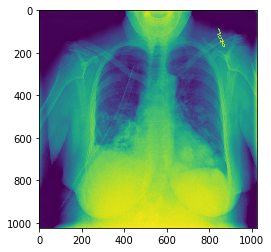

In [0]:
import h5py
import scipy
import numpy as np
import matplotlib.pyplot as plt

dataset1 = h5py.File('train_.hdf5', "r")
    #leer los elementos del dataset
D = np.array(dataset1['train_'][:])
print(D.shape)
plt.imshow(D[:,0].reshape(256,256))
plt.show

In [0]:
######RELACIONAR DATOS


##### EXTRACION DE LABELS 

In [0]:

######creacion de leables

import numpy as np
import pandas as pd
import pydicom as dicom
import h5py





nodupli=np.array([])

    
labels_ordenado=np.array([])# donde guardar los leabels que coinsiden con los feature 
      
labels = pd.read_csv('C:/labels_unicos.csv')
Y=np.array([])
     
        

        
        
print("-------labels cruzados---------")
for d in range(1,20780):
    
    
    imagen=(dicom.dcmread("C:\stage_2_train_images/"+str(d)+".dcm"))
    pac=np.array(int(labels.Target[imagen.PatientID==labels.patientId]))
    
    print("---------id"+str(d)+"---------")
    print(imagen.PatientID)
   
    print(pac)
    Y=np.append(Y,pac)
    #crear el archivo hdf5
    
f=h5py.File("data_set_Y.hdf5", "w")
    # crear el dataset
dset=f.create_dataset('labels_unicos', data=Y)

dataset1 = h5py.File('data_set_Y.hdf5', "r")
    #leer los elementos del dataset
D = np.array(dataset1['labels_unicos'][:])
print(D.shape)
print(D[5])
dataset1.close()
    #print(Y)
        #labels_ordenado=np.append(labels_ordenado,labels.Target.get(pac))



#print(labels_ordenado)
#print(labels_ordenado.shape)




C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


-------labels cruzados---------
---------id1---------
0004cfab-14fd-4e49-80ba-63a80b6bddd6
0
---------id2---------
000924cf-0f8d-42bd-9158-1af53881a557
0
---------id3---------
000db696-cf54-4385-b10b-6b16fbb3f985
1
---------id4---------
000fe35a-2649-43d4-b027-e67796d412e0
1
---------id5---------
001031d9-f904-4a23-b3e5-2c088acd19c6
1
---------id6---------
0010f549-b242-4e94-87a8-57d79de215fc
0
---------id7---------
001916b8-3d30-4935-a5d1-8eaddb1646cd
1
---------id8---------
0022073f-cec8-42ec-ab5f-bc2314649235
1
---------id9---------
0022995a-45eb-4cfa-9a59-cd15f5196c64
0
---------id10---------
0025d2de-bd78-4d36-9f72-e15a5e22ca82
0
---------id11---------
00293de0-a530-41dc-9621-0b3def01d06d
0
---------id12---------
002c591d-df62-4e34-8eda-838c664430a9
0
---------id13---------
002cb550-2e31-42f1-a29d-fbc279977e71
1
---------id14---------
00313ee0-9eaa-42f4-b0ab-c148ed3241cd
0
---------id15---------
00322d4d-1c29-4943-afc9-b6754be640eb
0
---------id16---------
003d8fa0-6bf1-40ed-b54c-

---------id134---------
0294b4aa-5614-4b33-80a4-2c31b639e5b3
1
---------id135---------
0295573e-1bbe-4f14-83c2-32449fa79f10
0
---------id136---------
0297e501-88b5-4ec0-a2fd-50a7c70b42eb
0
---------id137---------
029a7647-5a1b-45fd-bae0-35e4fa49f785
0
---------id138---------
02a07cce-e68d-4096-a6d9-dbb93ce2cdf1
0
---------id139---------
02b20ea4-9c01-48b2-b3b3-5dae20e80095
0
---------id140---------
02b7b018-0fed-44c2-a9c2-93b2b3952efc
1
---------id141---------
02bc87cb-6660-4faa-97e4-4de01cb640a4
0
---------id142---------
02c2331d-b3fa-4d55-bf86-f0efbd589c86
0
---------id143---------
02c34d5b-16e9-412e-a385-ccd8cbceae16
1
---------id144---------
02c7fec6-46d9-480a-9ccc-edccfbbb44ab
0
---------id145---------
02cfa7d1-61e0-4d9e-8664-9a7469ccab76
1
---------id146---------
02de2d68-b7f9-428b-ac12-0cb8f56a0145
0
---------id147---------
02de832c-0929-4d8e-a333-6fd53367c63e
0
---------id148---------
02e141b9-8bc0-45df-be3a-5508768412c6
0
---------id149---------
02e4191e-fb03-4581-914c-f0438a1

---------id266---------
055fee13-c09c-4635-b35e-e50b9215d1c3
0
---------id267---------
05632b7f-f4c5-4d67-aa93-8f3c04eb7937
1
---------id268---------
0566560d-cbff-4025-b803-64498357df9d
0
---------id269---------
0567a5b7-3ba8-4741-87ed-488aebd02321
0
---------id270---------
0567d70b-5a94-4363-a162-7207ffaff023
1
---------id271---------
056c11ef-e99e-444b-824f-734a32ea40d2
0
---------id272---------
056d6cc6-fb4a-48a5-808b-b775d29a438a
0
---------id273---------
056f6beb-c3c8-4ee3-8db5-d1b50aabf7c9
0
---------id274---------
056fb495-574d-4b37-9f89-77b9ced2ef43
0
---------id275---------
0572881e-d1dd-4757-a54e-b240b30da946
1
---------id276---------
05744f1d-2fa5-41ce-85d3-3df6a7302064
1
---------id277---------
0582f503-a451-448f-87a5-a67589c5f7c5
0
---------id278---------
0586660a-f243-41dc-bcae-d1e342640846
0
---------id279---------
0587782c-ac6b-4ae1-8ffb-ce894d09f75e
1
---------id280---------
05905ac6-1b8f-4793-a7d2-ac794b1bb2ff
0
---------id281---------
0598a87e-6a8a-4439-a6ec-cd33956

---------id399---------
06c3e09b-341b-4fb9-9e28-bfd9cf298c6d
1
---------id400---------
06c50ad5-8ffd-480b-8424-dd38df7ca86c
1
---------id401---------
06cb14bf-b134-4ad0-840b-8cf278559d66
0
---------id402---------
06cc46b7-50b1-41c1-a406-ccac7a5ac3e2
1
---------id403---------
06cc9b59-b8ff-4a6b-9e5b-f127c7c1208d
1
---------id404---------
06ce1fa2-986b-4936-82f5-7b06d0d3b4ff
0
---------id405---------
06cf339f-a71a-4177-b950-ae1fdd5f4762
1
---------id406---------
06cfc310-7820-4a81-ac26-67910f7e9ea6
0
---------id407---------
06d3f696-82ea-4c71-b162-f18b3e0eeeac
1
---------id408---------
06d5a58d-baf1-4937-bfc3-00db1fb2b1be
1
---------id409---------
06d6e209-0bd4-45d4-81b4-4b97546d57fa
1
---------id410---------
06df5d57-6f34-43c0-99ad-b9b5f9346cbd
1
---------id411---------
06e09ebb-cb5b-4c30-8d3a-67a6ec34692b
1
---------id412---------
06e1a29a-6307-4ec2-902e-b379d39d2101
0
---------id413---------
06e30df6-253e-4a03-b16e-49305fb0f165
0
---------id414---------
06e40d99-227c-4fa5-a51a-8691b15

---------id530---------
07d8975a-76e3-4160-8784-c97e35166271
0
---------id531---------
07d8eecd-8160-4f1f-8e26-d35de039cef6
1
---------id532---------
07daedd9-d1b8-4ff1-b203-24e71326d083
0
---------id533---------
07dc2fb6-61f3-4d89-aa58-2780fb5f29f2
0
---------id534---------
07e08ccd-ea26-4cb2-b7ea-a330aff72a3a
0
---------id535---------
07e257da-ae36-45f1-baa4-5f7ad4e5d86b
0
---------id536---------
07e91ac7-990f-4318-8da2-732b09764cd8
0
---------id537---------
07ec1c73-c77a-4b43-bcc6-96f94cbd32ac
0
---------id538---------
07ed91aa-ef0c-49fa-a691-13efc83f8d7e
0
---------id539---------
07ef6836-c643-4708-8bca-85b9cd2bb57e
0
---------id540---------
07f1ae3f-2482-4c76-8801-bc4895b3f46e
0
---------id541---------
07f59492-1b36-4ff7-98b0-df996bf4fc4b
0
---------id542---------
07f62c5d-2351-49fa-8eed-02800042dc8d
0
---------id543---------
07f78db5-7d9a-4ba0-a00f-02c36953020f
1
---------id544---------
07f8978f-eaac-467e-8ff1-4de731dc441e
0
---------id545---------
07faa92f-6eef-4fbe-b3c6-8a78e1f

---------id662---------
091cc2b7-8ba6-4fce-8ae2-7547117dbddf
1
---------id663---------
091d75a8-e23e-4cb8-af67-10cb314077ec
1
---------id664---------
091d9bb8-eb0e-48ef-946a-254a4f8f0a0b
0
---------id665---------
091e90d0-bdb7-4815-935f-5b52b93ddbe6
0
---------id666---------
091fa211-36c0-42a4-bd7d-c8bced664d9d
1
---------id667---------
0922222f-03d6-4346-bf1a-63ed17eb45d3
0
---------id668---------
09232852-c9c0-487a-b656-d6fa013b0453
0
---------id669---------
09236f60-57e0-48b3-aede-a885f4dfe1b1
0
---------id670---------
0924465c-dbf3-49b3-97db-a4c49f6010c2
0
---------id671---------
0927bc1e-e1af-4c7e-93c4-7127d366f57d
0
---------id672---------
0927e819-9640-487d-a04e-f5d4732dbe0a
1
---------id673---------
0930b0aa-25c2-4624-a3fc-9b60ba0b23f4
1
---------id674---------
09326eb7-f4cb-4d8f-83c6-8ba7fb8b5ac7
1
---------id675---------
0934e2a4-10f9-45f2-9729-af674d68118c
0
---------id676---------
093ce867-9a80-4748-83ed-3d81d26b7741
0
---------id677---------
0940017e-0dc8-414a-9560-98f13cd

---------id795---------
0a5b4860-e6ab-4737-a389-9d0cf7300770
0
---------id796---------
0a5c4dcb-33ac-4466-9dbf-42ed5c8ec1f0
0
---------id797---------
0a628951-4482-4d01-a09a-9e590b886cf2
0
---------id798---------
0a62df77-7459-4acc-9cca-a62c2cec4b0f
1
---------id799---------
0a63a331-3e17-4e23-8a9f-f7a4ec850a1b
0
---------id800---------
0a66f58c-f98d-41d1-89af-4e0136888e13
1
---------id801---------
0a6a5956-58cf-4f17-9e39-7e0d17310f67
1
---------id802---------
0a7162ad-b2bc-4132-b15a-7fdc80957618
1
---------id803---------
0a72a6fe-0dde-49f0-bb65-d3d73366b83f
0
---------id804---------
0a74badc-f221-4017-96a6-055ee057b57d
0
---------id805---------
0a74f788-cd7e-47a5-a437-cb9a7dd00a06
0
---------id806---------
0a796f83-f908-4b83-9252-e513d107be2e
0
---------id807---------
0a7b0cc8-af04-4d2c-9267-6fdfb05f48f2
0
---------id808---------
0a7b13a9-bcfe-4a99-b699-4c8cf6882f04
0
---------id809---------
0a80033c-8a64-4810-9ecb-6013f7b0dde9
0
---------id810---------
0a825a59-c034-481c-b596-9c7f0bc

---------id927---------
0b8f8765-0406-447c-b873-7ac5ce8884aa
1
---------id928---------
0b905a8b-9884-4f82-8e02-4577090678de
0
---------id929---------
0b92e1e9-78ae-4477-8b7e-f7cac9c79104
0
---------id930---------
0b9736d7-413f-4fe0-8ff3-163c290e2679
0
---------id931---------
0b974a07-7c7f-4826-913d-f5b0d5bd8142
0
---------id932---------
0b9f36a1-cc44-44f4-b500-cf1127fc71e6
0
---------id933---------
0ba09fda-b861-4f95-affd-773cfdddde5a
0
---------id934---------
0ba245bb-b2e4-49b1-8c63-576e38470708
1
---------id935---------
0ba96c88-a3ed-4f28-9981-36c340f4996b
0
---------id936---------
0baa6d29-66e3-40db-8aeb-5ebe80ddc8c8
0
---------id937---------
0bad22f7-1833-43bc-92ec-ac2aba6e1ef7
0
---------id938---------
0bad68b0-b67c-47c9-bb8b-b9513a326394
0
---------id939---------
0bae27f3-01d4-4223-adc5-d3264e0d9213
1
---------id940---------
0bb0dca8-127f-4793-849b-cf9d4a67a055
0
---------id941---------
0bb1cb0e-7377-407d-845e-dce144852d32
0
---------id942---------
0bb24183-8b59-48f1-8bbf-4d88997

---------id1058---------
0cac04c6-c4b6-48e5-9b28-b0a6c44289a5
0
---------id1059---------
0cac94e3-15f2-4657-beae-b508b5e0d176
1
---------id1060---------
0cadf93e-b9d9-42c3-93c6-dd8e568d76f9
0
---------id1061---------
0cb05380-5ae8-46de-8585-41b5323d7c65
1
---------id1062---------
0cb0f095-c49b-4ed2-b041-deb4f87ab35a
0
---------id1063---------
0cb14822-96b4-4d77-b3ab-436e40ea135c
0
---------id1064---------
0cb23e5a-a46a-4a32-89c0-8030941b6301
0
---------id1065---------
0cb47fe7-14e3-4c3f-9430-71d97ac0a3e5
0
---------id1066---------
0cb52e59-3b50-41fb-a022-5b24741dbcfc
1
---------id1067---------
0cb697cb-b775-4908-aff2-40dad27723e3
0
---------id1068---------
0cb6fe57-ead1-444b-8563-a51f14014e2d
0
---------id1069---------
0cb75033-7ff0-4f4b-938f-cb6b58bf7fdb
0
---------id1070---------
0cb9f824-8f97-4195-a887-97873f657063
0
---------id1071---------
0cbadade-7aae-495f-bb51-42b8ebd1b7cb
0
---------id1072---------
0cbb1188-a386-4965-a292-29ff93300c97
0
---------id1073---------
0cbc601f-91f0-4

---------id1187---------
0f1ca6cb-02e3-43ed-87ce-9619095fa14b
1
---------id1188---------
0f1fced1-4c33-44b2-9009-1370aa6287f3
1
---------id1189---------
0f266626-6804-4aaa-bd44-12d230a1c181
0
---------id1190---------
0f2bce55-7193-45d0-8223-d978b550477a
1
---------id1191---------
0f3ac29b-7682-4402-bbe5-89e4add87639
1
---------id1192---------
0f45a78f-d20b-4370-b0c9-00da4e9a8a05
1
---------id1193---------
0f4b80b6-fd39-451f-aebf-7cdb1b655c0b
0
---------id1194---------
0f4c38f3-854f-4f74-9051-59c801a6c859
0
---------id1195---------
0f510183-11b0-4356-b8ae-24ac9e3814c4
1
---------id1196---------
0f526bd8-4383-4b59-8db0-7ed03e41c142
0
---------id1197---------
0f5460cd-0847-4977-9bbf-01de53f44f45
0
---------id1198---------
0f5b56fd-7f0f-4b80-9128-92611763172b
0
---------id1199---------
0f5d1591-5e8d-4328-9ba2-0d99deb8ad57
0
---------id1200---------
0f60ce12-960f-4ecf-8c71-040737565327
0
---------id1201---------
0f639fad-780e-44f8-ba8d-0c934bdca870
1
---------id1202---------
0f65daf5-08f1-4

---------id1317---------
11fcbe52-87f7-4074-85ac-153d5f255e35
1
---------id1318---------
11ff35a5-51dc-41d7-afe1-588ff59cbc4b
1
---------id1319---------
120088b4-5fc5-49a1-a772-be10a37a897c
0
---------id1320---------
1202ef51-061c-43a4-8d2b-759fce4f15d4
0
---------id1321---------
120fd100-b447-4ec9-b4fe-3cdd3f0496e9
1
---------id1322---------
121ae1f2-0e8e-43f3-8dfc-93ffc2cfff22
0
---------id1323---------
121eb744-2f28-443d-a361-ba0cb2401462
0
---------id1324---------
122bd0b8-4b45-4587-8cb9-1848e52aa863
1
---------id1325---------
1239cc4b-bacb-449e-b7e3-5545df8a6677
0
---------id1326---------
124f5571-659f-47ff-9354-f46fae71b248
0
---------id1327---------
125a4350-c49f-4056-bfc1-d016c68a1159
0
---------id1328---------
125a6b00-d20c-413e-b5fb-3728fcfce39f
1
---------id1329---------
1260a8e0-dad4-4b75-8448-0c54c1e21f84
0
---------id1330---------
12657240-8b00-4be5-994e-6bba758e168a
0
---------id1331---------
1266cab0-e29f-47b9-87a2-17ed6658603c
0
---------id1332---------
126de93a-1209-4

---------id1447---------
1552da4f-04de-4c70-8c82-b5e3b8012b93
0
---------id1448---------
1553848a-161e-48ad-af50-05f38696a6fe
1
---------id1449---------
1555c17d-994a-4400-b62b-4b53fc727da3
1
---------id1450---------
1555f6ac-0266-4120-b948-697809f139a1
1
---------id1451---------
1557bea3-b9f0-4235-b06f-49de5ee8d194
0
---------id1452---------
15588680-1e41-4ba7-b785-b7e053d39adc
0
---------id1453---------
155e1bbc-b81f-4164-8de1-b3c235bfa87a
0
---------id1454---------
15602987-7fe1-4ff9-a7f7-24c9fe79e8df
0
---------id1455---------
1561af3e-022a-448f-a729-2c4ba5546aa3
0
---------id1456---------
1562c5c8-39cf-4fb2-8592-eafdeeeb5dd2
0
---------id1457---------
1563a4ed-d5f5-4e31-8818-c5417109d403
1
---------id1458---------
1565fd6c-9432-454a-87e4-937fd5ad5b60
1
---------id1459---------
156634a8-5ca7-4822-92cd-677aedc2247a
1
---------id1460---------
15688c5b-57a9-419c-b93c-115d7cec828d
0
---------id1461---------
15697b54-5aa8-413f-8bc0-12d790340fff
1
---------id1462---------
156a563f-4580-4

---------id1576---------
163aa468-b519-4109-85ac-58b46a5b8bf7
0
---------id1577---------
163b3240-2726-45f0-9054-9119bab7fd88
0
---------id1578---------
163d7cb1-bf62-4643-a1a2-73c03257b9d7
0
---------id1579---------
1643d9ee-7f12-4a05-9328-f7d775f6cd2c
0
---------id1580---------
16440036-5704-4096-acc1-7ea237d0fefc
0
---------id1581---------
16495067-35af-4582-b7b4-1ae3bde67e7b
0
---------id1582---------
1649b78a-cc96-42da-b826-61f0ba2f7907
0
---------id1583---------
164a9325-6bb3-4af3-9217-e7ca73cbbb1f
1
---------id1584---------
164e8e2e-f90c-41d8-a7ee-cfee6fef16b2
1
---------id1585---------
1651bc42-0024-445d-862a-55a35c04b954
0
---------id1586---------
1653174e-bd9e-47f3-a57a-5c5508c3fdc9
0
---------id1587---------
165bc884-61e3-4fd8-a799-643a8626c7e5
0
---------id1588---------
165e4595-deeb-4910-b06b-89e2fba035f6
1
---------id1589---------
166088ea-38d0-4881-8a1a-7e6d5fc442dd
1
---------id1590---------
16637461-2175-426c-a0fd-e6bf3c6dbe95
0
---------id1591---------
166479fb-b1f7-4

---------id1707---------
1791fab6-9f2e-479f-9c50-65984afe8539
0
---------id1708---------
17924737-81b7-4dd1-9d9b-2d75af022f8f
0
---------id1709---------
1792982c-8183-4199-8217-510c92805614
1
---------id1710---------
1794b7b4-de8c-479a-bfa7-2ab868c3061b
1
---------id1711---------
179c5fc6-32a7-4144-91e9-58c2371616d7
1
---------id1712---------
179dbb8e-d6b0-4afa-bb53-f6590e3892c2
1
---------id1713---------
179f022d-f515-438c-b17d-f0a998b0e115
0
---------id1714---------
17a1427c-70b0-4383-b5f3-a2b5f1ec0691
1
---------id1715---------
17a26c7a-8bd6-494a-82af-c504a5a6a1bb
1
---------id1716---------
17a46e10-30d3-4ddb-bcca-a6316b20c509
0
---------id1717---------
17a5ce04-809a-42ed-9e58-100cfb33de7a
1
---------id1718---------
17a6c2d3-d218-4ef3-99c0-4da163fc9e52
0
---------id1719---------
17a78211-ea8d-4ac8-8882-170a269cd605
0
---------id1720---------
17a8f738-d00a-4198-9c1d-29d3fd2e1145
0
---------id1721---------
17aba977-7b64-47b0-acb0-d41abba1fcbc
0
---------id1722---------
17ad2599-0077-4

---------id1837---------
1889dd53-607f-4897-9be6-b2a5c078d6b3
1
---------id1838---------
188dece6-09da-4166-9d7f-18c495358216
0
---------id1839---------
188efa57-599d-43d2-baa2-8d1d54edd073
0
---------id1840---------
1895cf28-e433-486c-8c12-38c2e548453d
0
---------id1841---------
18977885-5d9f-42f9-80a1-d39e201845ee
0
---------id1842---------
18996e90-1465-414c-b623-de6da68336dc
0
---------id1843---------
189b1bb5-65d4-4dac-9cd8-e7232d84fcdd
0
---------id1844---------
189fec61-2bb1-46e3-a285-1dc3a09e8860
0
---------id1845---------
18a279f0-b065-4e26-97ae-11efd9883c3e
0
---------id1846---------
18a5c559-5563-47e2-b26a-8b20f7250ab0
0
---------id1847---------
18a72d07-25cf-4eb4-af6a-8a81e807bae6
0
---------id1848---------
18a81d53-15a3-470e-b51a-98d9348189e4
0
---------id1849---------
18a919d8-5d23-4cde-bb99-dc0e457babb5
0
---------id1850---------
18aef831-82d6-4847-953e-9c06f1e2f5fe
0
---------id1851---------
18b0c02d-4023-49a3-9a47-ad663cc1c7c6
0
---------id1852---------
18b3a0ce-d693-4

---------id1966---------
1a2dc891-713d-4253-ad19-a1e7910ee2eb
1
---------id1967---------
1a32542e-bc47-4703-82a7-d88bedc8c07d
1
---------id1968---------
1a388cdd-671b-48a9-9a4c-ca64cc60ef81
0
---------id1969---------
1a42aa5f-54c6-4ada-b381-cdf65cfc69b1
1
---------id1970---------
1a4326c3-303c-4140-8747-ae962f87a981
0
---------id1971---------
1a4421d2-3905-4a69-b08e-b304f1ed5c22
0
---------id1972---------
1a4f537b-0a38-4343-b7a0-a6391625c8a4
0
---------id1973---------
1a557ac7-3f9e-4750-9d36-1c311cad8a6f
1
---------id1974---------
1a563761-ea16-4583-8231-6c122963c6d3
0
---------id1975---------
1a5ad03f-aac6-4491-b2e2-e5634fdfd2be
0
---------id1976---------
1a623a18-bf08-4204-8ed6-cd9e02edfbe1
0
---------id1977---------
1a63ca9b-22c9-4856-960f-7cdca38bdfd9
0
---------id1978---------
1a7606e0-4d81-4bbe-ae22-93ca30540cb9
1
---------id1979---------
1a93ba37-ec6b-4562-87b1-ca23be8a1e1e
0
---------id1980---------
1a9af28f-f757-4d16-92dc-469f2da9fef7
0
---------id1981---------
1a9c2e64-7cbd-4

---------id2223---------
20db11bd-2bd8-46d7-b2d3-77b8d4d8ec67
0
---------id2224---------
20e1f3f2-953a-4a8e-b7d3-8db21a4ce933
0
---------id2225---------
20ed5a77-bb84-4c95-b126-714bd59cdfbf
1
---------id2226---------
20f39b8e-be82-4f24-8791-651533a73184
1
---------id2227---------
20f6d471-e33c-4f09-bdcc-2fe9de41cb41
0
---------id2228---------
20fa542a-4930-46eb-8e1b-3e938980e6ea
1
---------id2229---------
2118026e-ed2f-4d1e-baa2-0e9e1004f72c
0
---------id2230---------
21273117-1e4c-4f9a-8ed1-f11b7c063060
0
---------id2231---------
212ccee9-80ec-4d67-8edb-5959d344c923
0
---------id2232---------
2131a5d5-d3ca-4ce1-97a7-4ae34ef0d19f
0
---------id2233---------
2139214a-4a50-4144-9c2d-eb4c929e1e7e
1
---------id2234---------
213c5da7-32fa-482c-be59-94ea948ffbff
0
---------id2235---------
214dcd68-4220-4010-8510-4c8eee830c70
0
---------id2236---------
2152d0ec-5d28-4b15-bb45-422e110aad20
0
---------id2237---------
215d0abd-60fe-457e-b6bd-de970a9162fa
0
---------id2238---------
21684515-f845-4

---------id2354---------
2458fdf6-7200-425e-b072-0a4e08afcdca
0
---------id2355---------
245d1104-6524-4d44-ace9-e54f0645a46e
1
---------id2356---------
246bf123-5a0d-4a3d-b4b4-6e442f8a830c
0
---------id2357---------
24714d07-9d17-43e9-ac49-89965306fcc5
0
---------id2358---------
2474f5d3-45d0-44d2-a859-90a39f7dd9f6
0
---------id2359---------
248212c6-2326-47ea-9976-6cbaa9c7ae3e
0
---------id2360---------
2490b2de-41fb-41dc-a73d-7e946c86124b
0
---------id2361---------
24a0f5b2-e762-4c07-ac23-b190fb0211ce
0
---------id2362---------
24a37f78-cea1-42eb-94a7-b2c51c0f0915
0
---------id2363---------
24bc6cbc-3ed9-455a-8fbf-f106ce3e1e59
1
---------id2364---------
24c876fa-93e4-4dd6-b1f1-a6f5f4aab729
1
---------id2365---------
24c98b8f-6d53-4ef1-b0f6-dce04a10f1b7
0
---------id2366---------
24cb4fd3-7f4b-4bc7-a9c1-24be6c6e09de
1
---------id2367---------
24d33a1b-f931-4635-8014-ffaf1d266986
0
---------id2368---------
24dba8ea-22b9-4a3c-84ce-6bafeab8e6d1
1
---------id2369---------
24e11e90-9a36-4

---------id2483---------
27bdb2cc-9665-40ea-a6b4-248a1112dbe8
1
---------id2484---------
27c98d87-8bda-4d17-847a-2732aa50e55c
0
---------id2485---------
27d1956f-5e94-4fa3-b1ee-0fb2896d9c7d
0
---------id2486---------
27d43d8a-ffe0-41b6-a96a-3182901c1fe7
0
---------id2487---------
27d8a7c7-b9e0-46f2-bd34-eb2f2362b846
0
---------id2488---------
27dc31f8-148e-42de-a6b4-60bfa79e20ae
0
---------id2489---------
27e52306-ac01-4326-8ab1-e4e655bbd073
0
---------id2490---------
27e7f64a-a6a4-4a36-8888-c6c96c8e7828
0
---------id2491---------
27ee75df-d2e3-40c0-994f-3efd14e6dafb
1
---------id2492---------
27f328a2-ec1b-4d6e-8a0b-fe1d655b4a91
0
---------id2493---------
27f50647-8355-4a2f-91ba-ba3f1ea540d0
0
---------id2494---------
27f779d2-3488-4536-9f8b-00932d4c0806
0
---------id2495---------
27fa7496-e222-4016-8d1a-5a8dd4db52ed
1
---------id2496---------
27fdc9c2-5544-4142-92ac-11a1264d4fb8
0
---------id2497---------
27feebaa-f4dc-4c68-9348-f0ff35134e43
1
---------id2498---------
2802fe49-28e4-4

---------id2614---------
2ae42ec0-68e3-463e-8559-4a5edd45f32c
0
---------id2615---------
2aed7ffb-3b2b-4094-921a-0d5fbb270ab1
0
---------id2616---------
2af1bc3b-fad3-4645-9171-791c1a6fc1ee
0
---------id2617---------
2af2646f-3cc0-4ef2-a9e4-0beea36f335a
1
---------id2618---------
2af2b9f2-500a-429f-a7cf-7b47ee4f3220
0
---------id2619---------
2af433f9-69ad-4a61-8717-327b3280cf96
0
---------id2620---------
2af7c7b5-4b57-470a-9b31-1f167e3e500a
1
---------id2621---------
2afaf9b4-664c-4c87-b9f5-4e411789da5d
1
---------id2622---------
2b08e0b6-d944-4466-b582-a62ce4a8a852
0
---------id2623---------
2b0fe1f0-e5e8-41b1-8d57-270cc19c5961
0
---------id2624---------
2b1e28fe-e10f-4c40-bd0b-7f29f88afd6f
0
---------id2625---------
2b1eb6ac-335c-406e-bcea-31dffed2e79f
0
---------id2626---------
2b4a8d36-11a1-454f-8dcb-0fc2ada7dfa9
0
---------id2627---------
2b4c09a2-c8d7-4773-84e3-f1aa664fba9a
1
---------id2628---------
2b55eeed-3408-46fd-9e18-d7c5295a92b2
1
---------id2629---------
2b57dc05-b925-4

---------id2744---------
2e1e92ea-36f4-4340-98af-eb8956961175
0
---------id2745---------
2e2f0137-aec8-4ec8-b69e-15a7813a7320
0
---------id2746---------
2e303b9f-1a06-4553-afce-3561db6420f3
0
---------id2747---------
2e3363a0-19d9-47d7-b7e5-d2142da1b9fa
1
---------id2748---------
2e34adf2-9e00-4e46-8510-a8d0fc2d3b94
0
---------id2749---------
2e497e99-5aec-4290-bf40-0bb9041973dd
0
---------id2750---------
2e4998d6-b0dd-4bb0-a139-432a56e82b2b
0
---------id2751---------
2e4b20f7-69c4-4680-9c8b-6984c195b1cf
1
---------id2752---------
2e4e8d73-c213-47f2-a4f4-cebe3a6b2467
0
---------id2753---------
2e566084-386d-48a6-beb2-8b28732371e7
0
---------id2754---------
2e5dc881-3eef-4f78-96f8-2e240bbede2a
0
---------id2755---------
2e776901-d47c-4d8e-9b8c-04587230ef92
0
---------id2756---------
2e81e582-821a-4b3c-bd76-48a7d39e3f82
0
---------id2757---------
2e826ff4-4329-4b2b-9467-c4506ab1f6ba
0
---------id2758---------
2e827502-06a4-425a-9ee3-9a0accbf3a79
0
---------id2759---------
2e84276a-cac7-4

---------id2873---------
30e21f60-403d-4f23-b01b-c42a638adf7e
0
---------id2874---------
30ed2b9d-b832-4c0a-af4d-a6ccc70ef1b5
0
---------id2875---------
30f237ad-d9af-4f59-921c-5a6b579dd6ed
0
---------id2876---------
30f2c879-2104-45e4-acbd-6284f7a62d35
1
---------id2877---------
31005109-092a-4611-9c42-23c7123a40c9
0
---------id2878---------
31102758-a5ba-44c9-b480-b744bcfcb861
1
---------id2879---------
311a559e-bed5-478a-94f5-c1bcf1df939a
1
---------id2880---------
312920e7-f9a9-4064-aa35-96b805637bcc
0
---------id2881---------
3132440e-c4bc-4dc5-b7af-ef3e082ed989
0
---------id2882---------
3134ae04-5935-4337-9a7d-f190f118091b
0
---------id2883---------
313677e1-a894-4abc-814c-42ce8ab44dde
0
---------id2884---------
31368401-b882-40ef-a728-8657ea3144b4
1
---------id2885---------
313a3547-7b54-4b60-af7f-2f53977681c2
0
---------id2886---------
3141838c-603b-47ea-8591-80a7e7c5bf12
0
---------id2887---------
31428408-0d97-4ff5-b387-8d1c95cf5a0d
1
---------id2888---------
31460e18-fc20-4

---------id3002---------
32368c74-ec8b-423d-8656-7249ca60329a
0
---------id3003---------
3236daec-0403-477d-9c71-fe6214cafac4
0
---------id3004---------
3239951b-6211-4290-b237-3d9ad17176db
1
---------id3005---------
323b7670-7fe4-4427-9383-0fbcc7e7ae1f
0
---------id3006---------
323cc238-97de-4c6b-8502-87975a571233
0
---------id3007---------
323d4055-2830-433c-8585-e02ff7821a17
1
---------id3008---------
32408669-c137-4e8d-bd62-fe8345b40e73
1
---------id3009---------
3246006e-f323-43c9-a322-4979fdb85f37
1
---------id3010---------
3247efbe-0804-4aa6-865b-155e6b9bbb86
1
---------id3011---------
324ab8a0-8292-48ca-a1c1-c64c76a13673
0
---------id3012---------
324d0f66-9315-4312-8d1d-963cbc131bb5
0
---------id3013---------
324d2313-7952-42c2-bad8-a4a92fd9fd46
0
---------id3014---------
324f9ed1-09e0-483e-9bdd-d139e77acb85
0
---------id3015---------
3251dea8-4f74-4f4b-8f56-167b0213414b
1
---------id3016---------
32520edc-7730-4e75-a132-334f077a963b
0
---------id3017---------
32547e73-ab10-4

---------id3137---------
335e5897-5c4c-402c-9390-2bed8d592985
0
---------id3138---------
335ee631-5d9a-464c-8fdd-fa759b5c9fe0
1
---------id3139---------
3360928c-c862-470f-8b08-238114499ce3
0
---------id3140---------
3360d5d9-e1b5-448f-87a4-df15eed8a095
0
---------id3141---------
336622cd-55bc-4404-beb1-8c75de224d0a
1
---------id3142---------
336b379f-b679-42cb-9e9b-e2483a4cae2c
0
---------id3143---------
336c9afc-e140-4d5e-ab50-7b11809dbc1f
1
---------id3144---------
33736c23-6fd3-414e-b35d-f98b95cf01e6
0
---------id3145---------
3374e3a8-2156-4553-b434-805405e67264
1
---------id3146---------
3375538a-8bb6-43af-9fe1-b9c462a597f7
0
---------id3147---------
3375de61-0846-495d-a5d6-fd171828e480
0
---------id3148---------
338019e9-6ee8-47cc-b49f-32dd39c0adbc
1
---------id3149---------
33838dc8-dc3e-443c-be25-609ce5d66743
1
---------id3150---------
33889753-8a7d-4d7b-a8bd-2b1088cf3a0f
0
---------id3151---------
338907f5-8c8c-47e7-a57d-6c9eb5b4529b
1
---------id3152---------
3389b88b-d0e2-4

---------id3266---------
34858b4b-37ff-4130-be8f-7075f3f3b056
1
---------id3267---------
3485bc68-5c84-479c-8ec6-17fa1b6d7a2c
1
---------id3268---------
348699f9-4eb2-42b7-b9e8-8bc3230b32a5
1
---------id3269---------
34873b9f-5305-404e-b7f7-5105feede48a
1
---------id3270---------
3488c0cf-8257-454e-a9a8-fdcecc72d5ea
0
---------id3271---------
3488f56d-1c15-45f2-ad45-ee5b11196442
1
---------id3272---------
3489804c-d115-4f87-b5c9-301462cdcad4
1
---------id3273---------
348c2e71-9dd4-40dc-8e09-0fa4dfa8db5e
0
---------id3274---------
348cedc4-4e08-4bae-b5dc-d68fe804aa65
0
---------id3275---------
34956207-2ebf-4a47-bc56-faf23701adf2
1
---------id3276---------
34958aeb-f963-46e3-92cb-da61931ff74d
0
---------id3277---------
3496cccd-1600-4ae9-920f-a5bf7919801c
1
---------id3278---------
34985379-397f-4afb-9ca7-538cc629703b
1
---------id3279---------
3498f71d-ee17-4a16-a0dd-3d28794cf880
0
---------id3280---------
349905eb-e0f8-4898-a029-75da0197394d
0
---------id3281---------
349b7754-b129-4

---------id3399---------
3592ae43-bcf5-48e8-9cca-680c9a724831
1
---------id3400---------
359355a8-5981-406a-a8c3-3dcfdde9169e
1
---------id3401---------
3594b48f-fcc1-4947-93f5-64be66467147
1
---------id3402---------
35956b97-fd90-43fd-a2f3-670ba5ef779c
0
---------id3403---------
3596a38f-dcd0-471a-bf3c-32d221d98184
0
---------id3404---------
359ce100-a41f-40e2-ba95-c91b83725a35
1
---------id3405---------
35a13820-ba8a-45d7-b566-9ee95b6bd7c8
1
---------id3406---------
35a3198f-d764-4c5e-bed4-87ccd6c1e87a
0
---------id3407---------
35a379c4-1e56-41f7-8a25-a1c2e9b88464
1
---------id3408---------
35a60fb3-459a-43a6-9c1f-066578ca5d63
1
---------id3409---------
35a803ec-bb19-4bcc-a2a3-10e0c30a9c3a
0
---------id3410---------
35a8878c-2ffb-4774-98ab-5915360878d8
0
---------id3411---------
35a9fe12-15e7-46d5-9095-529d5298ca70
1
---------id3412---------
35ab0be2-1772-4ef7-b8f9-45e5e371ac11
1
---------id3413---------
35ab8f3b-8ec0-4e59-9d5b-74d526914d66
0
---------id3414---------
35aea96c-a183-4

---------id3530---------
36c7d37b-05fa-4d92-813c-a437dcb0e661
0
---------id3531---------
36c82e78-4a3f-45f0-94c1-27357fc79aa7
0
---------id3532---------
36ca4185-52e1-4cf3-b007-5c7680d2ae74
1
---------id3533---------
36cdebad-ee74-4e4b-809a-d4e89220ab7c
0
---------id3534---------
36cf3250-2ea6-4ef9-8143-c1bbafe83475
1
---------id3535---------
36d55e8a-0fa3-4af7-91e7-725bbdbd442e
0
---------id3536---------
36d7ebd2-a4e5-42d1-bde0-c7699da0b152
1
---------id3537---------
36da2e3e-cd74-48f5-89bb-00cd186f4de9
1
---------id3538---------
36deb0a8-4845-4610-88a1-5ba66039f00c
0
---------id3539---------
36e2d7a1-bfea-4126-a44c-0388463a7461
0
---------id3540---------
36ee3d9f-3cc5-4968-aae5-8ce646c5113e
0
---------id3541---------
36ef9113-5ea4-4812-a5ea-fdb0e3e028ba
0
---------id3542---------
36f0c0e8-9216-42a4-9a52-4322c74fc35d
0
---------id3543---------
36f22c61-5bff-4583-8269-35d25b6bb2c4
1
---------id3544---------
36f51cc5-a28d-48f0-a086-df424f7f2c94
1
---------id3545---------
36f775ee-d044-4

---------id3664---------
37eefa29-9ff3-4c78-ac9b-0a0bb500a17c
0
---------id3665---------
37f025d9-05c0-4e27-9a75-2e6a2085fa30
1
---------id3666---------
37f17069-62ce-42ff-9fa4-d6a1056bd075
1
---------id3667---------
37f5c61c-c395-468f-a4ea-7108343a22cb
1
---------id3668---------
37f70057-7e01-4aae-8940-6712bfe34255
1
---------id3669---------
37f70220-545f-4f86-bace-61f4bf052e6e
0
---------id3670---------
37f917c2-68e2-4e03-afed-1d4acf054498
0
---------id3671---------
37f941a9-f736-4100-a771-517c9449da9f
0
---------id3672---------
37fa8cec-dec9-4772-9773-9fb2b26b041e
0
---------id3673---------
37fd6daf-9d93-44a8-8818-20a423de28c2
0
---------id3674---------
38016466-59bb-4364-a099-03813dd09f46
1
---------id3675---------
3802b256-c042-4f52-ab00-73877c1d1a57
0
---------id3676---------
38062f40-82c9-4322-b2bb-dacca835bb3b
0
---------id3677---------
380bbb59-0158-4464-94c8-a3c19153cb0d
0
---------id3678---------
380c4bec-022e-4b0e-b96b-40be0dddfd52
1
---------id3679---------
3810c7be-ecfe-4

---------id3795---------
38dee97d-933d-48f7-8f77-dbb7bc9b2776
1
---------id3796---------
38e001a1-f518-4dc3-bdf7-b568ba90f512
1
---------id3797---------
38e3b0bc-e533-408d-a589-ca5abecce596
0
---------id3798---------
38e479a3-f9fc-44f0-8f8d-dc5de7668895
0
---------id3799---------
38e68dfa-d76e-4d4a-9fa8-4a9d86f1a380
0
---------id3800---------
38e8ed40-7a1f-4678-b655-31d3431b0ba7
1
---------id3801---------
38e99364-5995-4b7c-ad87-f8b558a0b5a4
0
---------id3802---------
38ead95b-c698-4cef-bec8-3f95005484c3
1
---------id3803---------
38f23b8d-d8ef-4348-978b-d8350aae9c96
0
---------id3804---------
38f2df56-b804-4c70-811e-b01f1aac0216
1
---------id3805---------
38f6e3fc-a474-44a8-8bbf-10ed53e57a76
0
---------id3806---------
38f6f757-4d87-4a2c-ae06-c707578b7a00
0
---------id3807---------
38f85ed5-7251-48e9-8c52-234be2e3f9f9
0
---------id3808---------
38fcb370-03e9-49bf-9a87-8ac0172a5af6
0
---------id3809---------
38fe4a2d-b910-4eb6-9465-64a353d66c02
0
---------id3810---------
38ffaafc-11bb-4

---------id3924---------
39f08b1e-46f0-4463-ab20-f72aac165d83
1
---------id3925---------
39fd4e64-28de-4424-9772-73d337cffad1
0
---------id3926---------
3a010152-9ce2-4780-bdd8-bac6fa101991
1
---------id3927---------
3a01bb45-4742-4df3-a519-482cb2a8023e
0
---------id3928---------
3a037b3d-5100-4ba1-bbb4-eb9c22d9e572
1
---------id3929---------
3a03d95c-fea8-471e-b7b8-e8efef2fd4a9
1
---------id3930---------
3a0832d6-76d6-4915-945c-2ea769faabb3
0
---------id3931---------
3a0a3a09-a971-4df8-a4dc-ea6424101888
0
---------id3932---------
3a0c1a58-6d13-43f3-a5a0-07d8ecdf7fd5
1
---------id3933---------
3a0c80db-3411-4547-8822-01f6e746bc51
1
---------id3934---------
3a0dc1e6-cfac-412d-a6c2-70c69236ee6a
0
---------id3935---------
3a0dc890-7a6b-47b7-bd54-832a2b7c9121
0
---------id3936---------
3a0f9e11-0dee-4e81-96e2-9ce8417270ef
1
---------id3937---------
3a0fb504-c7fe-4f7e-9bf1-98560c74614d
1
---------id3938---------
3a146de9-9044-4abc-b15c-e7e0d18a0704
1
---------id3939---------
3a15d1af-32f7-4

---------id4058---------
3b1a0e72-4870-4927-8171-293f1a767bde
1
---------id4059---------
3b1bead0-08fc-4f1c-acad-7fef601ebeaa
0
---------id4060---------
3b1e6d35-ec24-41f0-b5cd-ae2c7f814e5e
0
---------id4061---------
3b230c42-36a4-4f32-a891-2800c14e63a9
1
---------id4062---------
3b2503ab-5006-420a-a26a-f5c8409488bf
0
---------id4063---------
3b253e33-a932-4d96-a8fe-f3a5be6b66a6
1
---------id4064---------
3b258862-6865-4a06-ab21-d18a5dfdfa4c
0
---------id4065---------
3b266180-6af2-4859-9576-17fd9ab9fff1
1
---------id4066---------
3b26e791-3f6c-4cc5-93be-b690134eeb8d
1
---------id4067---------
3b27a391-cc42-47b3-aff6-206011e86628
0
---------id4068---------
3b2853dd-7027-4d70-945e-f604ad9d33bb
0
---------id4069---------
3b29eb24-e46f-4529-a0e0-c4c342727152
0
---------id4070---------
3b2cd577-6e31-4b41-8349-dacac273aadf
1
---------id4071---------
3b2d5952-ecd3-4e79-9ecc-908adde0ab99
1
---------id4072---------
3b2ea469-695a-4b58-9f51-56684958d9a3
0
---------id4073---------
3b3039f3-1704-4

---------id4187---------
3c2e061f-ad8f-497b-a97f-196d2606ffeb
0
---------id4188---------
3c2f580e-bdac-4f28-a33e-38b147fc60ca
0
---------id4189---------
3c2f796b-7183-40da-9bd1-4a6f81dbd1e5
0
---------id4190---------
3c2fea96-8b4c-4110-b050-d97deab3d589
0
---------id4191---------
3c2ffd0c-b04c-4a9c-84df-09ec201f55ff
0
---------id4192---------
3c313509-8707-4fab-be4b-770fd8cbdb07
0
---------id4193---------
3c319790-02cd-44d7-bb91-8e758463ac82
1
---------id4194---------
3c329c7a-1dcf-41c6-a3ab-1db886e8ebd8
1
---------id4195---------
3c353be5-b19e-4b2f-81e0-fcabb93c429f
0
---------id4196---------
3c37c82e-fbd2-41f1-8292-1ff77df2b3fd
1
---------id4197---------
3c38d0bf-0a4b-42ea-bacd-287dcc621603
0
---------id4198---------
3c3d0e93-09f0-4be5-9fc9-5f0f3efda96b
0
---------id4199---------
3c3edd61-17dd-4ec2-b434-d5bbe0bbb13f
1
---------id4200---------
3c3f7a08-29c4-4773-8ae1-e32418e018c9
0
---------id4201---------
3c47e1a2-c1e9-4a4c-b545-7217d061a33d
0
---------id4202---------
3c4945ed-5abe-4

---------id4318---------
3d3c4768-ae36-4807-bfc2-195fe0194b07
0
---------id4319---------
3d3cb363-4214-4556-a0b2-7cc7cdedfc8d
0
---------id4320---------
3d3ff5b0-9aed-4237-a815-d1c192d7f09c
0
---------id4321---------
3d413032-b091-4f90-a131-17bc1eeb0647
1
---------id4322---------
3d46edf3-15a7-4f6b-a89c-bc11949e2550
0
---------id4323---------
3d48f4d3-7a90-4ead-8634-b2d394575284
1
---------id4324---------
3d4b52c7-96c8-412c-9b53-98030d531c75
0
---------id4325---------
3d4b7cfd-a94c-486d-a0e3-7504a77c6929
0
---------id4326---------
3d4dfd10-61c7-4305-816f-fde544d1f3a3
1
---------id4327---------
3d505bb2-544e-4e2d-8859-ef33bf31c49f
1
---------id4328---------
3d507d80-6139-42cf-b8eb-7db10633fdaa
0
---------id4329---------
3d57f7e9-b198-4478-84c4-063bea92b00e
1
---------id4330---------
3d59ea9f-a290-492e-8c93-114e488af4c2
0
---------id4331---------
3d59faf9-6b80-42e5-b5fb-95048344c92a
1
---------id4332---------
3d5e4188-b4c2-41b1-81fe-a48f6271fe47
1
---------id4333---------
3d5ece34-fb7c-4

---------id4448---------
3e75ff4a-a15d-4451-850f-605c3244cb17
1
---------id4449---------
3e77e593-74c8-4f9c-aa09-8e0cabffd059
0
---------id4450---------
3e790750-704c-4b91-b4ae-d7d47c89d2fe
0
---------id4451---------
3e7c788b-3c99-4c44-9877-0ced391d1f75
0
---------id4452---------
3e7fc50e-d9ae-4b91-909d-1ea4cc9ddcb1
1
---------id4453---------
3e80d53f-1b03-4a12-ab50-6b86c49e8837
0
---------id4454---------
3e80e9c7-8f9a-4da5-b084-6f3d364d6010
1
---------id4455---------
3e881f10-28aa-4626-a79a-50cc014b7a1a
1
---------id4456---------
3e8b04ac-40e4-499b-8677-8c0cf1c43c05
0
---------id4457---------
3e8eea71-b36a-49a9-8fbc-47749ee2c641
1
---------id4458---------
3e8f1321-ac53-4ecd-8ca2-5150bfafabe7
0
---------id4459---------
3e94f21d-0159-4f9a-8981-3048c0be9f91
0
---------id4460---------
3e9908ab-c3de-4cda-b07f-d03ef3a56654
0
---------id4461---------
3e99e768-693c-481d-b0c7-535bbeaf4dbf
0
---------id4462---------
3e9a7227-3806-4b23-a51a-5a193896b83b
0
---------id4463---------
3e9dc5b9-1b7a-4

---------id4582---------
3fb227fe-ba26-4682-ae1f-0e19dee31876
0
---------id4583---------
3fb2f726-42d1-4b7b-87b2-0faadd1872c8
0
---------id4584---------
3fb5525f-edfa-4217-81f9-df59b3e94135
0
---------id4585---------
3fb60904-497c-4009-94cd-aa4e28ecc854
1
---------id4586---------
3fbcdd00-8633-4bcc-a264-9a013073443d
0
---------id4587---------
3fbd4620-cd61-4c5d-a067-aa8025df7430
1
---------id4588---------
3fbd74df-08fb-4145-abdc-5e27828b3d30
1
---------id4589---------
3fc09255-ac70-4e8b-8507-efde01c9fd45
1
---------id4590---------
3fc0ad26-a4e5-47a1-8074-80686ef85821
0
---------id4591---------
3fc13fa7-0981-4dae-8d4d-ff8769f98d28
0
---------id4592---------
3fc199bf-56c1-48fe-a00a-7592e3c00e3c
1
---------id4593---------
3fc1b246-9939-4707-b56e-b72e550b633b
0
---------id4594---------
3fc3e7fb-1fff-4ad0-9900-8874ada57d05
1
---------id4595---------
3fc68a87-c737-419a-a871-8e78fec7f940
0
---------id4596---------
3fcc1a52-4329-4c61-9a79-f62c237387dc
1
---------id4597---------
3fcd4b0a-c575-4

---------id4711---------
40abf906-d723-4ea3-ac96-b940c8bb33b1
0
---------id4712---------
40ad92c2-901d-4f65-a6f2-b9d7452b5047
0
---------id4713---------
40add7b8-efdd-4a12-b59a-4aedbda776c0
0
---------id4714---------
40af1ae1-9caf-4e7a-9875-fb5e7eeb20cd
0
---------id4715---------
40b011e6-7d68-482e-b8b0-664a61ebe21d
1
---------id4716---------
40b0ec17-4b44-470c-b94b-7b2e57ec39c1
0
---------id4717---------
40b2c95d-4ee7-4b81-abc9-2c5f97e5442c
0
---------id4718---------
40b8bf1a-038a-4fb0-a92a-0f2405cfa6df
0
---------id4719---------
40ba3b29-2a7d-448e-9b45-195866e2d379
0
---------id4720---------
40bb9e6f-b67b-44f2-9268-c2f4091b88a7
0
---------id4721---------
40bfd201-ea8e-4c1c-9c96-d4d6e0834dc0
0
---------id4722---------
40c31d96-78f1-4d21-984b-db5c143a43e4
1
---------id4723---------
40c66f83-da90-4316-b53e-ded82c4b8c5a
0
---------id4724---------
40caa346-8524-4331-9559-1676b16700de
0
---------id4725---------
40cbe831-406d-4492-961e-373493628c03
0
---------id4726---------
40cf1491-12c9-4

---------id4843---------
41bd3bce-27fe-4ac5-b972-058614eab7ac
0
---------id4844---------
41bd41d3-1331-4945-aa6c-4352ea3ed626
0
---------id4845---------
41bf2042-53a2-44a8-9a29-55e643af5ac0
1
---------id4846---------
41bf38ed-29d0-4ac1-8e2f-a1a1d6468856
0
---------id4847---------
41bf80a8-621d-4efd-8559-db86626c28dc
0
---------id4848---------
41c03709-012a-4f30-8254-42582bf53e31
0
---------id4849---------
41c24e94-d448-4ec6-8b41-1c2c7497664a
0
---------id4850---------
41c35afe-fac7-4688-943c-7127cd7dd136
1
---------id4851---------
41c5032e-0c2e-4d64-8f7e-f41e5fa881e7
0
---------id4852---------
41c58e05-2844-472a-8e46-74e5eb4edf43
0
---------id4853---------
41c5ca32-16da-4e95-8e33-7d9c74310169
0
---------id4854---------
41c5cb4a-4ebf-4774-b088-c14ea99f734d
0
---------id4855---------
41d086ad-4ecb-48f9-bd7f-b3b6b338f23c
0
---------id4856---------
41d319b8-f243-4464-b0ec-b283fa696fa7
0
---------id4857---------
41d8f17e-030a-4565-9c40-2b5e9e9e993d
0
---------id4858---------
41df6d1a-a499-4

---------id5104---------
445c2799-58cc-4d3a-93ab-c8e16398e1e4
0
---------id5105---------
445de2e1-a0bc-4535-a233-2d9d62975e80
0
---------id5106---------
445df4da-d68c-450d-b8a3-d632e1c172c5
0
---------id5107---------
445e328a-084f-47a8-909a-f8bd1585b50b
0
---------id5108---------
4461fe8f-936b-429a-828c-1c5dcaff6984
0
---------id5109---------
4462bee5-0734-446e-b8d5-7f8f60cec4b7
0
---------id5110---------
4462d405-201b-4d61-868f-6cc8415947f7
0
---------id5111---------
44630e28-cf4e-4c6c-abee-51283a227382
0
---------id5112---------
4465b85f-2ae5-474f-a649-0ffcbd5ebb75
0
---------id5113---------
4467b1cd-ae6c-44e2-8215-f901fd1b0f89
0
---------id5114---------
4468241d-75a2-4b1e-8a30-eb4e9e604582
0
---------id5115---------
446ed45f-a926-45ab-a93e-3e047c2c7440
1
---------id5116---------
44745f37-2470-4a57-ba1d-1b9a65b71b77
0
---------id5117---------
4474c611-e91a-4aa2-8993-69ad51c2e332
0
---------id5118---------
44755384-0bea-4ba6-ad74-0f165ce566e5
0
---------id5119---------
4477cd9d-b6af-4

---------id5235---------
455c76de-482c-47d4-b15c-61da2640f4e0
0
---------id5236---------
455f89b9-3245-4c41-87e1-a867ff4622fa
0
---------id5237---------
45618772-42d3-4d9a-9a87-188e5bb82aad
0
---------id5238---------
45621540-ab38-4c90-9cfd-f092a802effe
0
---------id5239---------
45652e61-bfd3-4057-b5eb-895cd4e2899a
0
---------id5240---------
4566cfe1-c7bf-43be-9b25-013ff55f4370
0
---------id5241---------
4566ef68-f103-40b7-bbd2-f5e620191c0d
0
---------id5242---------
456b9f50-58c8-4260-a3f6-513485bf45d7
0
---------id5243---------
456df612-bc48-437d-a247-10a82d93e86e
0
---------id5244---------
456f096c-2dc5-4ece-8023-9932c716650c
0
---------id5245---------
4571ba1f-131f-47d6-a5c4-a5f1e2fb7b77
0
---------id5246---------
4571ec5d-33a3-4a1e-8473-3b6f423198c9
0
---------id5247---------
4572eb1c-0810-48c5-aa40-3c3b7b15bc4f
0
---------id5248---------
457491c0-de6d-4bf1-9d74-1f9ea46b563d
0
---------id5249---------
4574b254-3494-4530-bb8d-b3a80b14fff6
0
---------id5250---------
45757e7f-5f42-4

---------id5366---------
468180c9-dd14-4b34-a11d-60f05ed02d2d
0
---------id5367---------
46863727-a70d-48a9-8497-fffabd1193fe
0
---------id5368---------
4688892f-076f-4d48-85e3-34da2c3bf7f3
0
---------id5369---------
468a6731-0bd8-4e30-8473-fcdd2998fc82
0
---------id5370---------
468feb51-e690-4ba0-967d-62dec940b671
0
---------id5371---------
46932ad7-92fa-4a2a-a2e9-251e67854f2e
0
---------id5372---------
469481f9-b1cc-48f0-ab42-235e44cadb13
0
---------id5373---------
4698cc24-be96-4d0e-a365-2c813244c8cf
0
---------id5374---------
4698e391-5722-4947-a6f7-ff1fce632746
0
---------id5375---------
4699eae3-390a-4a76-9be0-7646d1a36425
1
---------id5376---------
469bc7dd-4d57-4f31-9852-dc3374575583
0
---------id5377---------
469db06c-6eb2-4aae-92d5-8a88148562f7
0
---------id5378---------
469ee828-7b1a-436b-accb-f928582d1330
1
---------id5379---------
46a0e7b3-026d-4178-ab4b-4d9e11c07e7b
0
---------id5380---------
46a46b58-a96b-438b-9742-ade04045c9fb
0
---------id5381---------
46a684b6-d62e-4

---------id5498---------
4780fbaa-80b4-484d-bb07-fba2d241e342
0
---------id5499---------
478b099b-555c-4c82-916a-37389e42c4b1
0
---------id5500---------
478d1aa1-98cf-461e-ac56-ec895a241ce0
0
---------id5501---------
478d58f7-13a0-423d-b759-20dc25412a66
0
---------id5502---------
47925813-7387-41b6-b00d-7c365b836bce
0
---------id5503---------
47926fba-a26c-42b6-b174-d2b312119286
0
---------id5504---------
4794359b-25af-4ed9-859d-3a0bdf1e4868
0
---------id5505---------
4794cea6-ea2b-4ab4-8939-d90e101e7a71
0
---------id5506---------
47967829-ae4e-49db-bdc8-07112fe86862
0
---------id5507---------
479740fb-dbcb-4cfd-9923-d913607dbbdf
0
---------id5508---------
4799182a-1587-4b92-809f-cbac8ddbeb51
0
---------id5509---------
479c8352-38cc-4af7-87f0-125b8f1564bb
0
---------id5510---------
479dd9fe-0360-4aa7-9a2c-bb51bb621459
0
---------id5511---------
47a15caf-d139-4fa3-956d-6f8afa5ac376
1
---------id5512---------
47a4611b-39a7-4d5f-947b-33024366d632
0
---------id5513---------
47a778f5-cd9e-4

---------id5754---------
49dcbed5-1a06-477c-ae64-46b6391d7774
0
---------id5755---------
49e2aae8-864d-42df-bd4d-f52c8f261c80
0
---------id5756---------
49e31ff9-fe8f-43c8-9c0b-4a27a9828493
0
---------id5757---------
49e3b070-5e67-4e18-8fd5-0535eaf500c8
0
---------id5758---------
49e7e3a8-2980-4a6d-b469-ed6b749c3b7f
0
---------id5759---------
49e96e12-32d5-42be-9a58-62bd0ace5ad0
0
---------id5760---------
49eb5baa-49a9-4c88-9c29-f12f96b88240
0
---------id5761---------
49ecfd4a-3d3f-463c-be3f-668347655f2a
0
---------id5762---------
49ee0424-95fb-45a6-bc76-f24d06db7ac5
0
---------id5763---------
49f0fa25-89cd-41a7-9c70-4d7d8d9be572
1
---------id5764---------
49f20ab0-dde4-4ac6-8323-950a6bfa4123
0
---------id5765---------
49f448e5-c3eb-49cf-9e76-dc8920369e1b
0
---------id5766---------
49f52a4f-201d-41dd-9037-e2be83f82c20
0
---------id5767---------
49f5c9f1-8c3c-4afc-b940-33e1500d31e8
0
---------id5768---------
49f711da-4bb0-4309-aeac-d18fbfa83f98
0
---------id5769---------
49f714bc-6e00-4

---------id5883---------
4b048bdc-0a0a-43ed-aa0d-5971e433874b
1
---------id5884---------
4b04ae4f-7d4d-44ea-aec7-5d8e673e8ce5
0
---------id5885---------
4b0b35fc-c1a9-4808-8e51-a85a0e0b78d9
0
---------id5886---------
4b0cbffb-4974-411f-ae98-553830c360f0
1
---------id5887---------
4b0e4413-56aa-48dd-a9ea-4712d211334c
0
---------id5888---------
4b0f3bf3-fa7c-4e6d-9ef9-2d65f485021c
0
---------id5889---------
4b0fe61d-df6f-4ff7-a3e6-394bcbb09267
0
---------id5890---------
4b1252a3-8860-4d93-bc5d-c209f3d6e181
0
---------id5891---------
4b18a44a-5d6b-4bf3-9a4b-c8f5211e4f07
0
---------id5892---------
4b1a60c2-40e4-4cc5-9fb2-d0a3e4fe8a4f
0
---------id5893---------
4b1bd2e0-bbc1-4cf4-8f35-565c1ab1385b
0
---------id5894---------
4b1cab8a-c9bd-40e6-bc86-23c6be98a099
0
---------id5895---------
4b1d3e29-2e48-45b6-974d-a8c7dc5f37e1
0
---------id5896---------
4b1e649e-9d73-4aaa-b545-8ba3f53ba45e
0
---------id5897---------
4b1e8ad7-2487-4689-a952-0818fa8713d1
0
---------id5898---------
4b2202b8-450a-4

---------id6016---------
4c26fceb-f1e4-45d3-be43-3141b8cdf614
0
---------id6017---------
4c2749cb-7bb8-46d8-9d14-491d0035f891
0
---------id6018---------
4c2a3eec-38e9-459a-980c-545d0c50f7bf
1
---------id6019---------
4c2d30a8-f815-4f71-b3cf-4a522f0f353e
0
---------id6020---------
4c2e071e-d217-42fa-9c9b-e3931974bd8d
0
---------id6021---------
4c30114d-2e03-43b7-9bc2-48ce5e8851ab
0
---------id6022---------
4c30daee-6594-485e-a539-a1bf6c497e14
0
---------id6023---------
4c30e2c4-f7f6-451d-8ce9-d065ff7c4b36
1
---------id6024---------
4c38a298-94e2-460f-b40e-f8ec669afebb
0
---------id6025---------
4c3a5b59-d0f5-465f-9e8e-431c43134202
0
---------id6026---------
4c3dfaae-cab5-49e5-b9be-a7356b2da73c
0
---------id6027---------
4c3e602d-e745-4f9c-bd5b-91129e431f63
0
---------id6028---------
4c3ea79c-df15-44ac-a6c1-2ab834f7f7d2
0
---------id6029---------
4c4124e0-1584-49a0-97e5-76c708f072fb
0
---------id6030---------
4c43612d-dc22-473d-8194-6efa0110b39e
0
---------id6031---------
4c445a68-b7af-4

---------id6145---------
4d571831-5585-4025-a80f-b7762a570646
0
---------id6146---------
4d59ea0c-8e47-49c3-a45d-60979e66bdf8
0
---------id6147---------
4d5bf1c7-fd16-4791-a5a2-cc2175030d94
0
---------id6148---------
4d5ca402-e14a-4b6c-86cd-d25512b31047
1
---------id6149---------
4d5d6c72-d216-4b0c-a277-a24ba9151f32
1
---------id6150---------
4d5e9224-6558-4fb1-9a19-d9ea0f37f2b7
0
---------id6151---------
4d5f36a6-71a1-48b2-ae53-06544d918664
0
---------id6152---------
4d61c5dd-858f-4b23-9b15-838e3f16b043
0
---------id6153---------
4d64af6e-6810-4ca7-9b78-c8868a6ba248
1
---------id6154---------
4d67f8f8-2b08-466a-803f-6e70743b30e4
0
---------id6155---------
4d6b6aa7-c1c8-47bb-ad81-7bc92fdbbceb
0
---------id6156---------
4d6e7a87-c86a-499d-a383-911aee689f75
0
---------id6157---------
4d6f4e36-f9d7-40e1-b1c9-004d217b8019
0
---------id6158---------
4d72c78e-2064-4615-bd7f-af58e0ec22db
0
---------id6159---------
4d74f086-d45b-42d0-86e1-fca7b04664df
0
---------id6160---------
4d77b506-38bb-4

---------id6279---------
4e716933-0a3f-4caa-8364-babe0e4a30d8
0
---------id6280---------
4e725ee0-8013-4b82-963c-c61d7f38a4b8
0
---------id6281---------
4e73b1f7-9b5f-44b7-9a6d-45d7256b8b94
0
---------id6282---------
4e73fd0b-65f9-4354-abf7-18e7311d1356
0
---------id6283---------
4e74d69f-2afb-4db2-b253-a93ecc61e1ef
0
---------id6284---------
4e75169b-0e7d-47e5-becd-7d69be08dcf4
0
---------id6285---------
4e751df2-0ca5-44f5-b611-d2069b2eb22e
0
---------id6286---------
4e798168-140f-432a-97a2-60e44e7779c4
0
---------id6287---------
4e7c40ba-e4f4-41d0-b9fc-7e2cda586d89
0
---------id6288---------
4e7c822d-0df2-4d75-a3a4-d15962d90a18
0
---------id6289---------
4e8486ee-7248-4880-829f-e247fcc9175a
0
---------id6290---------
4e89a60e-6263-4dbd-a4af-00f5923cd0e1
0
---------id6291---------
4e8e683f-b8ac-4a07-8ab2-b93dad788801
0
---------id6292---------
4e90a086-288b-4926-a33d-5c3c876c3e06
0
---------id6293---------
4e90e80e-e990-4f27-8bc6-c6c11e822974
1
---------id6294---------
4e97ddae-f34b-4

---------id6418---------
4f96be07-c2e7-42e0-bb07-cf463da8c69d
0
---------id6419---------
4f9a7303-4d5d-45fc-bcc4-d3f50f03464e
0
---------id6420---------
4fa00b91-3a79-4c58-afd7-06eef0487c06
0
---------id6421---------
4fa01ef3-f138-4163-9cee-0c1117a88a34
0
---------id6422---------
4fa6212d-15a4-4fd4-aa35-c07b1ff94ca3
0
---------id6423---------
4fa69712-d57b-4ea9-bdf3-40cdc03f02ff
1
---------id6424---------
4fab5087-c895-4671-8741-b5065fec928d
0
---------id6425---------
4fabf46a-ceec-421c-bb64-8527b44aa576
1
---------id6426---------
4facc369-ba39-4631-9e63-61ebb0d6ab3d
0
---------id6427---------
4fb25225-3f58-472d-a2d7-89726f28448e
0
---------id6428---------
4fb4a9dc-5429-41d9-b47f-47745d2e8552
0
---------id6429---------
4fb8cb90-0633-41c9-b229-36d77816a70c
0
---------id6430---------
4fbb4099-64c8-482e-a99e-e48c1197878a
0
---------id6431---------
4fbbb79d-53cb-4e96-b894-a535623316fc
0
---------id6432---------
4fbbc333-2706-48f9-9d57-137b372a5a5c
0
---------id6433---------
4fbc7a68-31a3-4

---------id6551---------
50ac73f3-76ef-4610-a62a-88ef8addcec3
0
---------id6552---------
50aca2cc-0998-45fe-902b-88dd222539a1
0
---------id6553---------
50acfb42-e161-455c-982f-78d2ffeb12e3
0
---------id6554---------
50ae1abb-8b74-47e5-9dda-51c2f6840475
0
---------id6555---------
50b524a5-6142-406a-a89f-98cbc3a93e1e
0
---------id6556---------
50b72f46-6536-44c4-a040-7bff3df602f5
0
---------id6557---------
50bb14cb-2a07-475c-8564-56e306d60e83
0
---------id6558---------
50bc9ee4-8a31-4a58-81ae-2bc960b50304
0
---------id6559---------
50bfe833-df93-4022-9b99-0c8d56a96d30
0
---------id6560---------
50c1e2e5-05ff-463d-999b-8ee02e6974b8
0
---------id6561---------
50c82178-841f-40c6-b2fc-871fa0c97b62
0
---------id6562---------
50cb1cac-baba-4a4a-bad1-d12cee21b2ca
1
---------id6563---------
50cb2940-ba0f-4683-9d9e-e42ef3162c3f
0
---------id6564---------
50cbc243-6654-4b10-b063-95b939f9eeca
1
---------id6565---------
50ccf4b3-fb05-4e21-aa6a-73f93ce2f33f
0
---------id6566---------
50cf5554-e277-4

---------id6684---------
51f540ba-aad8-4e1f-bc8b-7373d3d23ee2
1
---------id6685---------
51f68c41-ad1f-4440-aaf2-b8d7440fbec0
0
---------id6686---------
51f72917-146c-435a-8bea-cf4d1896997e
0
---------id6687---------
51f85d4c-7d59-4657-86f4-96a24ebd1549
0
---------id6688---------
51fbcba7-7bdb-49de-818c-066ec4ff155f
1
---------id6689---------
51fc4515-e145-4e05-ad32-feb6cfd2ec0b
0
---------id6690---------
51fc5fdd-49a7-4c8f-b9e4-41d3e61d75fd
0
---------id6691---------
52017ad1-0344-46e4-9b0a-47a5a38d7e71
0
---------id6692---------
52021b42-19c1-4d5b-8344-4188f4fdfd6a
0
---------id6693---------
52026cfa-1c22-406d-87fa-15fab5fdd35f
0
---------id6694---------
5205d480-a428-49a2-a5d0-d44b822ac724
0
---------id6695---------
5208153a-cce9-424f-8a02-1b2ffccc6b41
0
---------id6696---------
5209ee0e-95e0-4e24-89b6-d414138d402b
0
---------id6697---------
520bff6f-90e0-4e51-b1a1-68229773e802
0
---------id6698---------
520d385d-0571-4204-86d5-15d7b63f04b9
1
---------id6699---------
5210716b-b5b2-4

---------id6820---------
5332fdda-e1a8-4533-b9fc-a6956d74ff6e
0
---------id6821---------
5333966d-cb93-4e51-b882-ee5502cf6486
0
---------id6822---------
533523c9-7620-4228-ace4-d060a33061a5
0
---------id6823---------
5335c092-fa66-4c3a-a4ac-8455eef0ab8f
0
---------id6824---------
53362510-08ef-46fa-87eb-1a9b73906491
0
---------id6825---------
53367958-ef11-4c3e-a2f3-374e88dfbd90
0
---------id6826---------
5337cc53-2e5d-4583-8173-c130cbe8fc74
1
---------id6827---------
533dd19d-7bd4-4178-9c3c-b10f0e44fd33
0
---------id6828---------
533f6423-8465-41f0-aa07-34518dacb8b6
0
---------id6829---------
533f6b0d-6e60-44d4-93fa-29c777e6278c
0
---------id6830---------
5340047d-295c-4b89-aabf-03889f4acb42
0
---------id6831---------
5341f2bc-e62c-433a-80b8-439035520842
0
---------id6832---------
5342f3b9-cb1f-498d-8974-8b771e359b7e
0
---------id6833---------
5344ae10-10d7-4b35-b602-a97dbff359ef
0
---------id6834---------
534dd305-b5ae-4200-9e77-0662f9094d4b
0
---------id6835---------
534eae67-8907-4

---------id6951---------
543f4f16-4b7f-43bc-8d44-da66513c58b0
1
---------id6952---------
543f6ac2-317b-4cba-8828-fd73fafaecea
0
---------id6953---------
54439b0a-2842-4070-abc5-716f9f341787
0
---------id6954---------
544713a2-8263-410e-903c-c577869ccfe8
0
---------id6955---------
544bff0f-46e5-450a-9c52-a624203e3091
0
---------id6956---------
545258bb-53e4-4219-9b5f-62d18661eac2
0
---------id6957---------
54539347-4e0a-4b42-af9a-420d5f0c95e7
1
---------id6958---------
5458205b-c67a-44de-a1e3-009f977b4f98
0
---------id6959---------
545a0775-e301-4093-860f-dd10ff6dde3e
1
---------id6960---------
545eea70-f537-42bc-95e6-79e0c59f4c68
1
---------id6961---------
545ef4ff-a6c7-40b6-bc2a-34e71c758909
0
---------id6962---------
545ffe8b-d4c1-4545-bd2c-4b9114c31dcb
0
---------id6963---------
546001d3-f415-42c0-ab79-40e5a417bdc9
0
---------id6964---------
5460b0c1-6e89-40e7-adc0-c75dbe7c9e09
0
---------id6965---------
546156f0-9e90-4410-a515-3fdc807950ea
0
---------id6966---------
5461b852-ecfc-4

---------id7085---------
5565cfc3-8ec4-42a0-9fbc-ac6a979f16f3
0
---------id7086---------
5567ddc7-4c8e-456a-9ef1-24128a0dd9c8
0
---------id7087---------
556db285-6b5c-4032-8760-f0dd78d93475
0
---------id7088---------
556dc7ff-ece4-4ea9-90e4-fcffc38f5082
0
---------id7089---------
556ea435-2b79-45ca-9612-cde5f6bdffdc
0
---------id7090---------
55754887-a552-47dd-a5c6-2d069da40136
1
---------id7091---------
55773dd5-fa20-40f2-9c52-53731bfb3e82
0
---------id7092---------
5578a54c-a803-4558-954b-415ae6f18526
0
---------id7093---------
5578dcab-0a2f-4d79-b4e2-d3c9c28811c0
0
---------id7094---------
557ab975-0426-4746-a88f-872ef5675134
0
---------id7095---------
557cdf5f-f162-4900-b7fd-a9428d9c1da4
0
---------id7096---------
5582616e-31dc-40e4-a852-7b37cb616d8f
0
---------id7097---------
5583aa85-0700-4ad4-8d47-4d2fe5f5475f
0
---------id7098---------
5585e87c-0877-4ddc-92d1-be45efff4176
0
---------id7099---------
55864c8f-79fa-4fc5-9c7b-3abfa01de1d9
0
---------id7100---------
55891cc7-b8ed-4

---------id7216---------
56899133-2a10-471e-93b6-0ac3588aed4d
0
---------id7217---------
568b28a7-675a-41ba-811e-220681a75cd7
0
---------id7218---------
568e580f-c31b-4e58-9821-b6b822e3f8ec
0
---------id7219---------
568fdf74-7b00-4755-9185-6e89b197170f
0
---------id7220---------
5699df0c-aa5a-4109-8f23-1bed85d1470e
0
---------id7221---------
569e6728-9748-4db4-be57-9e5278c3cc71
0
---------id7222---------
56a10b62-f721-4bbe-805f-3a90af981515
0
---------id7223---------
56a60039-bf00-44ea-aaf2-ea50b68c4dbc
1
---------id7224---------
56a60ddd-66be-4e4c-8612-8916e2efedee
0
---------id7225---------
56a7e256-00c1-4053-97de-13565831b48d
0
---------id7226---------
56a7f91d-3ccd-4be6-88a7-659ebb9f3829
0
---------id7227---------
56a8befb-2f49-4ad8-9d5f-bd21435cdf5f
0
---------id7228---------
56a9a226-789b-428e-a1bd-303f4d7a2f1e
1
---------id7229---------
56adf1fc-1db5-4787-843c-500c7102f22a
0
---------id7230---------
56af1d91-fca6-461a-991b-e153acb22f3f
0
---------id7231---------
56b0cf24-93a5-4

---------id7348---------
57b0d4e3-3545-4bdf-9657-93c6107cc7bc
0
---------id7349---------
57b169bd-1867-46aa-9236-da80cd78be6e
0
---------id7350---------
57b598bf-4f4c-44df-aea5-6e208e43d2e3
0
---------id7351---------
57b684bd-14f7-4dfb-8232-dd14fd0e9822
0
---------id7352---------
57b7c911-a726-457c-b588-0a1ffdf0ad5f
0
---------id7353---------
57b8d3ee-a555-4acb-8be1-8bfe53f1b58d
0
---------id7354---------
57bcd96a-2400-4c10-bce2-28fd0a52a737
0
---------id7355---------
57bd0264-c56d-4266-b74a-b731212b6037
0
---------id7356---------
57bf80ea-1cad-47fa-b5df-bb66623bcf95
0
---------id7357---------
57bffc6f-1656-45a2-9e49-e28d1dcbeee1
1
---------id7358---------
57c44c24-2f39-472a-9a6e-53b9d95fa7ba
0
---------id7359---------
57c51bb2-7795-48a1-8f14-e16e7c0ee3eb
0
---------id7360---------
57c72280-b7e3-41c7-88d9-6bbb81e75b06
0
---------id7361---------
57c7a66f-46aa-40cc-a1fd-67511f5d67f7
1
---------id7362---------
57c974f9-b9ca-47c4-b16c-6b5c19a5a083
0
---------id7363---------
57cc1c1c-38ef-4

---------id7481---------
58dddcca-2f38-4556-8a72-326f8113ebb5
0
---------id7482---------
58e1adb7-f566-4e03-8770-43a36d3b44b3
0
---------id7483---------
58e38024-ca19-4410-b4b2-0230b1cf7320
0
---------id7484---------
58e3c190-8ab1-465c-bf3e-22a2deb0b9f2
1
---------id7485---------
58e7a5ed-7a8c-4071-9518-fd0a6eda58de
0
---------id7486---------
58e881f5-b41c-46c3-880c-a96b3b398ddd
0
---------id7487---------
58e9d328-783c-4c74-ba99-ffd9f7187353
0
---------id7488---------
58f28a2b-8fd5-44ce-9ef5-8aa81a957557
0
---------id7489---------
58f5b64f-97a6-4126-a66f-c56d307e3e3c
0
---------id7490---------
58f625bb-b656-4b17-b1d5-dd42de880c1f
0
---------id7491---------
58fa6956-23b3-48e6-a2ca-61fea7695e3b
0
---------id7492---------
58fb74fc-c506-4225-a6d2-39435d654e60
0
---------id7493---------
59010e44-e84f-45c4-890b-dfaa5baca9cc
0
---------id7494---------
5902e358-40b5-42c6-8b77-a6a02f9a9e7c
0
---------id7495---------
59031951-8039-4470-880d-6299c575e97f
0
---------id7496---------
5904aef8-6b8c-4

---------id7616---------
5a133587-a3b4-4515-be3e-fd0ee5a39f7a
0
---------id7617---------
5a17c6cf-5a46-4fb6-906c-4ac89f532fa5
0
---------id7618---------
5a18b41e-6e23-4fbe-a55a-ef6cfb027b0d
1
---------id7619---------
5a1c22b5-f8e8-477c-934c-9c347d7b29bc
0
---------id7620---------
5a1edc6c-b8a9-4b7f-870a-4e5f867cca33
1
---------id7621---------
5a220a92-bf26-451f-826a-6886460f7671
0
---------id7622---------
5a23151e-fceb-4d74-82b1-803bf1234450
0
---------id7623---------
5a29bf0b-e88c-4c2a-a793-6a84c9cb9856
0
---------id7624---------
5a2efed9-8132-4de5-bf6f-c73c7d014530
0
---------id7625---------
5a2f1408-caa2-4f0f-b14e-71ee713dc737
0
---------id7626---------
5a2f8c86-f21d-4815-98a3-1bb5fa6d9f44
0
---------id7627---------
5a2fc23d-facb-4105-bf35-ba87ccc78eaa
0
---------id7628---------
5a30d39a-979b-4646-a17a-87a8e6fe5322
0
---------id7629---------
5a3560b6-3460-4f9f-a429-1a0ebbcee520
0
---------id7630---------
5a38a30a-650e-4112-879a-fa387aae1b20
0
---------id7631---------
5a3e37e9-4d7e-4

---------id7749---------
5b5c1927-2b15-4ac5-8931-0edf8c6cf23d
0
---------id7750---------
5b5f544d-08a6-43c2-9543-68d0bef8e2cb
0
---------id7751---------
5b61df7d-385e-4338-89f3-98796a5a394e
0
---------id7752---------
5b622e5e-09c0-4ade-b82a-c73010b7f47a
0
---------id7753---------
5b684669-0ee0-44ff-851b-e2f6146c7e30
1
---------id7754---------
5b6ae851-f240-4a3e-ace5-c8f61853c872
1
---------id7755---------
5b6c40fe-abd6-4cf8-8de4-b064aea86b5f
0
---------id7756---------
5b6f828f-98b3-4a29-b93c-763594d135fd
1
---------id7757---------
5b72c6d2-e7eb-44a6-b625-78d2ec0008f2
1
---------id7758---------
5b737720-6b6c-4763-95ea-d3291957c781
0
---------id7759---------
5b795813-0205-4879-9bcb-69b7a417316f
1
---------id7760---------
5b7a9d09-53e4-4584-a1a1-38e594d091e6
0
---------id7761---------
5b7c4b7d-cf34-49fd-99a6-5dc5a7f1c5c0
0
---------id7762---------
5b7def79-7acb-436a-b46d-0337493fa33b
0
---------id7763---------
5b7e8916-7e64-4807-abaf-47b40bbf4bab
0
---------id7764---------
5b7fa41b-2591-4

---------id8009---------
5da671da-84f7-4847-9995-334ecf044f86
1
---------id8010---------
5da79531-8d7c-4368-b82b-505e1812a5c4
0
---------id8011---------
5da96579-cc2c-4437-8830-4069e7da2a16
0
---------id8012---------
5dad8463-531e-4945-8aab-058a63127c4e
0
---------id8013---------
5daef1bc-54de-4ed4-82b8-a9a1dbe89266
0
---------id8014---------
5db171ec-95a7-42b5-80ac-103bbfdc1f73
0
---------id8015---------
5db19a66-a763-4a59-a431-65ec181c22a8
0
---------id8016---------
5db2fbb6-4da5-47ce-a4dd-94cf2d956d4d
0
---------id8017---------
5db4e9e7-9312-4c29-84f0-f693340e9c11
0
---------id8018---------
5dbb180e-0145-49a7-a6af-dffb8718fb96
1
---------id8019---------
5dbb418a-7dc7-4ceb-a3f0-956b28b39734
1
---------id8020---------
5dbb4c6d-0f62-48c7-ac40-4eca9562a74d
0
---------id8021---------
5dbc1cfe-7caa-44e3-adb4-fb66694275c3
0
---------id8022---------
5dbf71a5-1c10-4639-9148-f2cacbc0e462
0
---------id8023---------
5dc0d1ca-756d-4053-9031-ed4d97fe36aa
0
---------id8024---------
5dc0efc3-1df6-4

---------id8272---------
5fddd203-a282-4f29-b741-dd03bfcec835
0
---------id8273---------
5fe137e2-d416-4f49-b685-6a3fe5367910
1
---------id8274---------
5fe1991f-2596-4cca-bfdf-2fae8db07cf0
0
---------id8275---------
5fe3ceb8-babb-49be-b260-44937fae4b2f
0
---------id8276---------
5fe48afd-ee8e-4b82-9ca9-a766a0fb0924
0
---------id8277---------
5fe5ff08-5be1-4676-9bc7-4395b67514aa
1
---------id8278---------
5fe6299a-dbb0-4090-9811-b80fe23eaa4c
0
---------id8279---------
5fe9b9af-9b7e-4575-bc16-7c204d3c40a5
0
---------id8280---------
5feccc14-e51d-4c12-bc60-4cdf83014ee2
1
---------id8281---------
5fecf69f-a89f-4ad9-89ef-a72e93bed642
0
---------id8282---------
5fee7685-a1eb-4be4-8054-e550d86f863b
0
---------id8283---------
5fef0c10-048f-430c-a4c6-4a38fbc4be6a
0
---------id8284---------
5fefa7fc-bf2f-44a9-bfe0-d4c6f9c55511
0
---------id8285---------
5ff115ab-1fa6-4cef-a372-e489e4a1b87e
0
---------id8286---------
5ff5a08c-7ee2-49b9-bdf4-d3043753f98c
0
---------id8287---------
5ffa367a-de51-4

---------id8405---------
610b7e59-4f18-4ea2-9f0f-b3668803b409
0
---------id8406---------
610bb23b-30af-4868-8d53-f90cda513fc6
0
---------id8407---------
610d9b12-14a0-4beb-894a-ce9abc88e294
0
---------id8408---------
610e5426-ed44-4cf1-b5a9-3393bcc54e2a
0
---------id8409---------
610ea636-e9df-4a9b-a396-867c06d10cb1
1
---------id8410---------
6111379f-790e-4957-9729-56ac4bb53d54
0
---------id8411---------
6113a040-1600-4525-adbc-c5415959ebaf
0
---------id8412---------
611522e7-12ba-4273-ba44-f59f4df0c88b
0
---------id8413---------
611a0f56-9463-4b3b-87ce-c856a170c14f
0
---------id8414---------
611a59c3-68d4-48fd-84d9-74f67339b5e1
0
---------id8415---------
611a6d3a-3c10-4fe4-9bd5-af17ba537486
0
---------id8416---------
611aac41-d471-4689-9732-610d88abb3e7
0
---------id8417---------
6121d7b6-8d47-45d4-9706-bd42ae676534
0
---------id8418---------
6126c957-5789-4264-86c9-9fe21c0498b9
1
---------id8419---------
612892af-2ac4-4da7-befb-c9bd18be97a2
0
---------id8420---------
6129213e-1ab7-4

---------id8663---------
6349bcae-b88a-4d59-a4c4-f3ccf0eb520d
0
---------id8664---------
634b0a73-98a6-488d-b2b9-1bef05248fc1
0
---------id8665---------
634b4289-f604-4c8d-bfcd-8b33388333d1
0
---------id8666---------
634dc2f2-faf9-44da-a5f2-011870025110
0
---------id8667---------
635058f5-90a8-46b6-8c4c-0989a3a82afb
0
---------id8668---------
63515470-5841-47cd-af05-d1169ac3a28a
0
---------id8669---------
6351aa4e-31d7-497c-912d-2b3f11b21fe7
0
---------id8670---------
6356caac-984a-41de-b607-97f9eb7afa30
0
---------id8671---------
6357baa1-71ad-47a3-ab64-42a83908db99
0
---------id8672---------
63583781-88e5-4ac2-b4b1-d7d8541c1a45
0
---------id8673---------
63590dff-7b12-4aeb-b747-6f7f7ad23f23
0
---------id8674---------
635aec0b-d365-4aee-8deb-4b63df83215d
0
---------id8675---------
635df94d-c90d-43ce-8792-67f4fee774b6
0
---------id8676---------
635e4332-bc10-421c-a5cb-7fc5ee1995b2
0
---------id8677---------
635f5da8-2340-4309-bd15-3d9a93e9aa41
0
---------id8678---------
63621a58-5fbd-4

---------id8798---------
6470a79b-e277-4f10-80ab-5d5484a010af
1
---------id8799---------
647110e0-1f69-40c8-af7e-e8c3ad526495
0
---------id8800---------
6472ceac-1095-4b62-a0b8-8a52086e23f4
0
---------id8801---------
647318b9-ffbd-4f35-8deb-f570410046db
0
---------id8802---------
64739b6b-2ef7-459e-8604-0578392094bd
0
---------id8803---------
6475d34d-7984-4ed0-9603-12b74bc48efb
0
---------id8804---------
6477a41c-821b-4c21-88cf-677f73d8bcd4
0
---------id8805---------
6478344f-9f81-4591-bc01-8f3a69cf17ce
0
---------id8806---------
647974ba-117e-4159-a00e-30ef27b634c6
0
---------id8807---------
6479c18f-0b92-4ad5-84a0-53ed3593a2aa
0
---------id8808---------
647a1939-b281-4c7c-ba12-ac055793f929
0
---------id8809---------
647aae90-5201-4b8b-8733-835d0bd244c3
0
---------id8810---------
647b300a-2027-4d70-8227-84085dd99dc1
0
---------id8811---------
647b7bbc-5cfb-4776-b157-838a4264d318
1
---------id8812---------
647c2b90-4ef5-477b-b60b-00bc2094eb13
0
---------id8813---------
647db67f-687d-4

---------id8931---------
656ea13b-f710-4709-9181-0a78319ffc37
0
---------id8932---------
6570970b-d2ce-43f5-b160-8a59e093749f
0
---------id8933---------
65720766-d890-459f-9676-000d60f3014b
0
---------id8934---------
65728058-5579-4116-b171-575e843d081c
0
---------id8935---------
65738ec0-4bc7-45b4-ad9c-8d1d84b1618f
0
---------id8936---------
657b1ec2-8f10-4070-bfde-db020bbdb2fe
0
---------id8937---------
657ca713-8f72-4a89-b6ac-a849d1c36497
0
---------id8938---------
657df63c-3461-4469-8018-1114956db567
0
---------id8939---------
657e2cb9-e776-4aad-80a4-f3826adb26eb
1
---------id8940---------
65845e8f-2cb8-4a56-a529-e6b856b0a6fb
1
---------id8941---------
6585a8f4-0489-4818-8188-f11256ff98aa
0
---------id8942---------
658a2896-6f1b-41b8-bf00-c737fec7c969
0
---------id8943---------
658da350-aa7a-4a04-b084-43a89e53259d
0
---------id8944---------
658e7faf-1a01-4388-ba49-2976020b81d7
0
---------id8945---------
658f18d3-69ea-4ee6-ace7-d179d441036a
0
---------id8946---------
658f8602-ffec-4

---------id9064---------
668c7bea-ca06-4131-9567-33078f889aa0
0
---------id9065---------
668dd12b-6cc1-4d97-8713-24bb92f8c221
0
---------id9066---------
668e680e-64ea-4730-ab78-9d2aa81de2e0
0
---------id9067---------
668f5041-3bc8-45f8-88d9-2fab7d1b07b3
0
---------id9068---------
6690649e-0fca-456a-8da7-a364b0acde85
0
---------id9069---------
6690d837-d209-4d75-b71d-1f090745fbef
0
---------id9070---------
6698a813-373d-4d2a-9ecb-89ced5d2c1f8
0
---------id9071---------
6698c3d6-2128-4ff8-aaa8-b840045e00c1
0
---------id9072---------
669a4a9f-f876-4da2-a48d-e2db19fc9cbb
0
---------id9073---------
669a8626-fdb4-4778-b51a-e58817d77545
0
---------id9074---------
669ae596-b72a-4acf-bd63-2aa25513017f
0
---------id9075---------
669c8aaa-5f89-439d-ac9c-28f1b787c6d9
0
---------id9076---------
669d7d59-7390-4bdb-8085-3bbcc400c417
0
---------id9077---------
669f22f9-a27a-4aef-ba95-492fbe0dcb8f
0
---------id9078---------
66a01743-311e-452a-b093-2ef63ca3ae2b
0
---------id9079---------
66a08a4f-0ef1-4

---------id9196---------
6797dfe0-ba4e-464c-9644-8c1022b68a25
1
---------id9197---------
679ac33a-0f94-4043-bf0e-77e552360a22
0
---------id9198---------
679e2aba-ae04-4a63-8031-c65dcd11a43f
0
---------id9199---------
67a25567-950c-4e4e-abe8-f6065adf7ddb
0
---------id9200---------
67a4830c-2869-4f28-b4eb-c9b76d6288a3
0
---------id9201---------
67a495f5-4a1c-4176-9562-2657a7790eed
0
---------id9202---------
67abb6ec-929a-4e85-879f-e963d753a14a
0
---------id9203---------
67af68f7-7ba0-49a0-a373-3a8801eb0faa
0
---------id9204---------
67b006cd-ea64-4d06-9ce4-e19134e2cb21
0
---------id9205---------
67b322d7-88d3-457f-ae58-66d416684a6b
0
---------id9206---------
67b78cc2-ddb2-4a2d-a595-20c126309a5d
0
---------id9207---------
67b858ef-f3ff-4c13-b473-3d8ec8ef889a
1
---------id9208---------
67b8ef8a-5285-4eec-88c8-8f4fe53f0f6e
1
---------id9209---------
67bb2550-c8eb-405c-a96c-7e820dd247de
0
---------id9210---------
67bc7433-4582-493a-af6b-82d0383d9c32
1
---------id9211---------
67bda6e9-0606-4

---------id9326---------
68ceed79-9969-4054-9631-b1c84808d6e8
1
---------id9327---------
68d4ee73-479a-4e8c-beab-6822aa605a0f
1
---------id9328---------
68d6f135-b26e-460f-803e-4789044ed367
0
---------id9329---------
68d9ff29-877f-4d6f-af4c-c831c7c72966
0
---------id9330---------
68dbe4c9-2671-4c71-8a42-ab6dc868105f
0
---------id9331---------
68ea9d5b-d79e-443f-8cfd-63263f51c6ee
0
---------id9332---------
68ecf260-c3f6-4e06-903f-8bb202e6256a
0
---------id9333---------
68eede7b-2f55-4d00-8158-a0801fa7193b
1
---------id9334---------
68ef7ecf-d546-4b59-9912-effce9cdee65
0
---------id9335---------
68f017b0-5e1a-4426-8214-22cce023f87f
0
---------id9336---------
68f5af12-3276-404c-8b82-97e4945575dd
0
---------id9337---------
68f63380-e0f5-4797-bc2c-0aed51888125
0
---------id9338---------
68f6391e-0148-458f-975c-5369d10ef81a
0
---------id9339---------
68f722e5-6b7c-44f9-9224-079cc00a62b9
0
---------id9340---------
68f8a49a-7792-4e68-b41e-fcb8ce14ea8c
0
---------id9341---------
68fb70d8-304f-4

---------id9459---------
69d9bbb9-8952-42c9-849e-c1fcff4741f7
0
---------id9460---------
69df60a0-cb3d-4da5-9a3b-9d8c36e2c113
0
---------id9461---------
69e0c05a-89e0-4b26-9628-7276cf4c18d8
0
---------id9462---------
69e140dc-4be3-4ec6-8468-778f1fa58af4
0
---------id9463---------
69e20212-750e-482f-9ad0-1aed2911fa50
0
---------id9464---------
69e38864-ac4e-4475-b29c-b48462d16b35
0
---------id9465---------
69e484ae-9462-4fc5-bae6-3a71ce35fb94
1
---------id9466---------
69e52db4-2e77-4dba-9c75-7b2a2a9b5b57
0
---------id9467---------
69e6daf2-a1df-432e-b45c-fd11f49d2fa5
0
---------id9468---------
69e8eeb0-80dd-4722-ade2-3f36d946d0a2
0
---------id9469---------
69ea6479-ba87-4988-8271-996981133a0c
0
---------id9470---------
69f247b8-48c4-43cd-89c1-e6be042d6b19
0
---------id9471---------
69f347b2-780b-4f70-af6c-d8f664dff9a2
0
---------id9472---------
69f67e49-d9f3-4763-b2cb-db657f1d0a58
0
---------id9473---------
69faa480-4581-4dce-bb9d-29eb9a29b96d
0
---------id9474---------
69fbde07-6eef-4

---------id9596---------
6ad6525d-5225-4623-9f5a-65816cc3436f
1
---------id9597---------
6ad73a5d-2d72-416f-ac53-01f1bcc5598d
0
---------id9598---------
6ad7f3fe-7c0d-4dbc-a3dc-386cbb8e219b
0
---------id9599---------
6adaad70-4f68-478b-b489-6824830a7688
0
---------id9600---------
6adbec9a-9e1c-4055-a4ab-37d2a0436674
0
---------id9601---------
6adca7eb-bf40-4139-9939-32f74eb64cff
0
---------id9602---------
6add1a08-28d6-459b-a8a1-b018007cebef
0
---------id9603---------
6add9875-17e2-4e06-8a26-86bb1ffb09dd
0
---------id9604---------
6adeb121-a57b-4e5a-8732-8695eca3b7b4
0
---------id9605---------
6ae40616-cee1-4d80-a5bc-878bce7f8ac9
0
---------id9606---------
6ae4184c-07b8-456d-8a73-e204b7a3cf6f
1
---------id9607---------
6aec6632-3c25-4a22-bcdb-94f589a77653
0
---------id9608---------
6aef6ac2-01b9-4742-ad26-429cc9577a1f
0
---------id9609---------
6aefeac2-d497-47c9-939d-5558d039ae1a
1
---------id9610---------
6af28755-0522-4b37-97d8-b931a31b876c
0
---------id9611---------
6af3135b-3425-4

---------id9738---------
6bf25d01-d877-404f-a92b-a997450c092a
0
---------id9739---------
6bf26f0a-245a-43f3-b9df-c6cb07c4dce8
0
---------id9740---------
6bf2fed4-9988-4a06-8cfe-c10ff4576fb1
0
---------id9741---------
6bf3c8e4-67d7-4e39-9d28-fe9a396c9d84
0
---------id9742---------
6bf4ea67-9a7d-4839-beac-b3541ad31826
0
---------id9743---------
6bf5b78a-635b-48f2-b767-460711927d7f
0
---------id9744---------
6bf5ff1a-07df-4c64-8fdf-dd8a26ab9b5b
1
---------id9745---------
6bf72a31-d934-44e5-814c-36215526f1e9
0
---------id9746---------
6bf9093d-e289-4f0e-815d-1acbc206f6ce
0
---------id9747---------
6bfad602-a328-49ea-80cf-bb6db9d42652
0
---------id9748---------
6bfafb53-1ddf-4e51-8285-ca01bc9c0af5
0
---------id9749---------
6bff452f-17b7-4a7e-8d1f-8898ac8bdedc
0
---------id9750---------
6c008096-1006-43be-9b05-1889eb953544
0
---------id9751---------
6c0341ef-950c-45c1-9009-777d893e8060
1
---------id9752---------
6c069d96-31a4-4aa4-b808-6012bb4e5ca1
0
---------id9753---------
6c0db351-5354-4

---------id9874---------
6d05e276-4fa2-4959-b2ec-b471c3af2d5b
0
---------id9875---------
6d06b742-3186-4152-b194-76b70def540d
0
---------id9876---------
6d0b86ac-4d99-4a45-8558-20de59ad39b0
1
---------id9877---------
6d0d2d29-ba30-40ef-b9a3-822b522ffb51
1
---------id9878---------
6d0d7b56-ea24-45b6-ace6-d8763e852547
0
---------id9879---------
6d12a702-5d01-4e7e-8c58-d39eacc3dfce
0
---------id9880---------
6d13500d-05ee-4f4f-bc08-aeda019858fe
1
---------id9881---------
6d144e7e-8e3b-494f-85d5-e56150f64f3a
0
---------id9882---------
6d1a0673-4f51-4e77-9a4f-95b78bec1e56
0
---------id9883---------
6d1efe52-1513-43c8-947f-158a33c0ad81
1
---------id9884---------
6d1f151b-b100-4086-9c9d-16e510aec767
0
---------id9885---------
6d20ac5a-6f59-4b17-8d9c-5e6c1eac3c74
0
---------id9886---------
6d2354a2-9b64-4dd4-b4fc-f047cbb73e3e
0
---------id9887---------
6d2371e4-f8cd-4f6f-bf9e-1e8773b3960a
1
---------id9888---------
6d25bdb3-5ae4-4249-bdeb-a2c65c0407e9
0
---------id9889---------
6d25fc2c-d0b3-4

---------id10002---------
6e16da29-aeea-415a-80a0-34a9937345b4
0
---------id10003---------
6e1764e6-6915-42d5-a893-e29a2fe69b30
0
---------id10004---------
6e1d50f6-0065-422d-9f93-8680627d6835
0
---------id10005---------
6e1f5ce5-a624-4d13-9088-1d769440599a
0
---------id10006---------
6e2174d4-d2e8-421a-9577-109160d053eb
0
---------id10007---------
6e22e938-1cb8-4c9a-89fd-c97e43452826
0
---------id10008---------
6e26360c-3342-449c-907a-803c06d59830
0
---------id10009---------
6e26a7a8-38f8-47d9-935f-35a553aec844
0
---------id10010---------
6e290df1-5d27-4de0-aba7-374ffe59baa8
0
---------id10011---------
6e29410d-4578-446e-8d04-a9f4dfa911db
0
---------id10012---------
6e298e09-6e9d-44cc-a696-7ea7a15f626c
0
---------id10013---------
6e2aacb3-74b4-4909-afd1-5e9765df303a
1
---------id10014---------
6e2cd79b-018b-46e4-a3a5-2e2c916543c6
0
---------id10015---------
6e2f44ec-dcec-4891-b33c-a7e2ad791ba4
0
---------id10016---------
6e318106-e492-45f7-9393-dd642359f08f
0
---------id10017---------

---------id10137---------
6f3953f5-5129-4a74-b8f9-cf386f919930
1
---------id10138---------
6f3ccbda-6bc1-4bbf-aa49-f789335a22b3
0
---------id10139---------
6f3d76ce-9c4e-4e4c-b344-776d764e1be8
1
---------id10140---------
6f3edd10-1cc0-4f2b-874f-3d599bdf463f
1
---------id10141---------
6f3ee2c1-3491-4e1e-890f-ffab242b68a7
0
---------id10142---------
6f402f79-f774-41bd-b722-6319665ee388
1
---------id10143---------
6f41f78b-66db-40eb-b657-e07470a50d24
0
---------id10144---------
6f4378d6-f017-45ed-91cd-b28f579506ba
0
---------id10145---------
6f439221-5c8e-4b75-a443-0cccc10a6bb2
0
---------id10146---------
6f464fc9-d9c3-404a-97c3-f4504c859eb2
0
---------id10147---------
6f47bae9-705f-41c8-8a28-d5cf88927b0e
1
---------id10148---------
6f491520-b891-48e4-9047-7afc2ad9f7bb
0
---------id10149---------
6f4c4632-50d2-4ba9-8a75-0c651f66a096
1
---------id10150---------
6f50bef2-f849-42c1-8e00-d3003b9ced67
0
---------id10151---------
6f5144a4-1998-4b7d-b767-e666a2e4d3c6
0
---------id10152---------

---------id10264---------
70724572-19ca-41de-9521-f9bf11479597
0
---------id10265---------
7072e0b6-6ac6-4645-9053-0ba973a86ed9
0
---------id10266---------
70764772-7dbc-4ab1-a5ed-08108fa547d8
1
---------id10267---------
707c04db-7e4d-4600-b4cc-52255dcda7fc
0
---------id10268---------
707c724b-bc84-4e62-8a1e-195056b22f2a
0
---------id10269---------
7080d43d-623b-4e63-935e-9ea66597fa6c
0
---------id10270---------
7081380a-00a7-49a5-b574-a7f8a41f582d
1
---------id10271---------
7082022e-2d79-4fcd-8701-2cba57b5ceb7
0
---------id10272---------
7086a7d5-056c-4752-8523-51929ca5e412
1
---------id10273---------
708845b9-85f5-478a-90bd-36cbc40146ae
0
---------id10274---------
708849e5-564d-4e3a-855d-e1107874f513
1
---------id10275---------
7089e4a3-2938-4e40-ae57-36e72e8a92c6
0
---------id10276---------
708af3b5-af63-45cc-8b46-3df0f52a80b1
0
---------id10277---------
708fa90a-d9d2-4b36-aa81-445037788347
0
---------id10278---------
70923e9a-cabe-4d97-bfd5-542f5a78bb01
0
---------id10279---------

---------id10397---------
717e8c41-2b54-4f7a-b7a8-d51b53108d82
0
---------id10398---------
717f61a8-7368-479d-8f73-278e8a1a329b
0
---------id10399---------
71813eab-6524-4c28-a978-b518a631585c
1
---------id10400---------
7181705d-bd1b-4896-94e6-0cc4d7562d56
1
---------id10401---------
71846fc9-ef2c-41ee-bb57-b513217438e1
0
---------id10402---------
7184cc40-a58a-40df-9aa7-39d610190410
0
---------id10403---------
71864474-2cba-48f0-8332-003f70bbb9ec
0
---------id10404---------
7188416c-2072-418f-a1b0-acee21705cad
1
---------id10405---------
718cee3f-4cff-4edc-92d3-80f0169e3b5c
1
---------id10406---------
718d6d9e-aa8e-46bf-8b5d-1e42e6f398bf
1
---------id10407---------
718d7420-83bf-48a2-9419-042046583ffc
0
---------id10408---------
7190f7a7-9e9a-453b-b837-2c7126e11968
0
---------id10409---------
7191407b-65df-4a48-8cb0-560eac8a025e
0
---------id10410---------
7193cbb0-daf6-4ee6-90b4-1db93123040d
1
---------id10411---------
71946324-e864-4d77-9c4a-ab2ce25ecb94
0
---------id10412---------

---------id10525---------
7281c876-beb7-4371-bbb4-4269bd00f767
0
---------id10526---------
72831387-4c1f-4398-a638-803ad559e2fd
0
---------id10527---------
728415d7-f6d7-4c91-9e34-fc85002856a8
0
---------id10528---------
72848196-fd24-4106-9c33-9c29b7a66a04
1
---------id10529---------
7286efff-9cbf-49fa-8d22-12608fca60ee
0
---------id10530---------
72888864-3b3e-4320-992c-1611352ce311
0
---------id10531---------
728a07c1-31e8-4167-ad19-ddd7b96ad14c
1
---------id10532---------
728a62fc-4310-4aca-9d68-72c8a829d69e
1
---------id10533---------
728adb55-c152-47f5-86f2-975f60820f67
0
---------id10534---------
728c8191-5ed6-40e1-80b5-a15fb3bc8eb2
0
---------id10535---------
72925c32-9102-466c-a9ab-169cd6e81369
0
---------id10536---------
72958adc-e186-4905-9017-d941681a250e
0
---------id10537---------
72980284-41de-4a91-b722-ab180bdbba7e
0
---------id10538---------
729820a4-6f1a-4071-8793-1db3d782dd27
0
---------id10539---------
729ad38e-12b9-4bc5-8773-cd1615b5bd04
1
---------id10540---------

---------id10789---------
74ead0c4-bddb-4660-8831-210c9c5b8d9e
0
---------id10790---------
74eb29cc-33a7-4ad4-b420-a4f4ba34cf19
0
---------id10791---------
74ed4f73-33e6-4607-8842-57aec6c318c6
1
---------id10792---------
74ef566d-21ce-4b66-b134-a713ca915762
0
---------id10793---------
74f02a21-db6b-439d-b17d-81c23120374d
1
---------id10794---------
74f0cc41-4b2d-4294-8bab-47bd0584b05c
0
---------id10795---------
74f427aa-a1bd-4eed-86de-2755158efcd9
0
---------id10796---------
74f58c95-43cd-4dac-ab6e-de270adf1d4d
0
---------id10797---------
74f62860-c882-47f2-9e9c-1f63588cee5e
0
---------id10798---------
74f69a44-9224-4c14-a6a4-cffef6d1a757
0
---------id10799---------
74f72d5f-15de-4f6c-9dfa-89cfd3c1acf1
0
---------id10800---------
74f8f310-cc0c-41ff-871d-8daadb81bbcd
0
---------id10801---------
74fa6abc-1d7c-494f-b025-1c42ff421cdf
0
---------id10802---------
74fb09f1-f085-4759-aa14-e951de845919
0
---------id10803---------
74fc0444-3b29-4b22-8e3d-6a92f87f725f
1
---------id10804---------

---------id10924---------
7608a2ca-0709-4cba-b685-3bf55d3a7041
0
---------id10925---------
760c4639-a0e5-40f6-93c5-a377e5ab4e80
0
---------id10926---------
760fc611-b3ee-4504-876d-ff864b3b3f88
0
---------id10927---------
7610cabc-b892-4a7d-9a7d-802e514fc685
0
---------id10928---------
76115ff9-5117-45fc-831b-29bc150bf0ff
0
---------id10929---------
761160f0-7d5b-448c-b708-c77838def919
1
---------id10930---------
7613a737-5b0c-4753-a1c8-7de8156456e4
0
---------id10931---------
761418cc-7757-4cfe-8b26-9e76c955487a
1
---------id10932---------
76160fbe-cc9f-4f5b-842f-760750a13df4
0
---------id10933---------
76197cfa-4aba-4afe-890e-8ad703ef5ba6
0
---------id10934---------
7619f134-bdc9-4164-a0b7-cd9a7dd64855
0
---------id10935---------
761c89a5-19b9-4e1b-b6f0-b7fb753a9b70
0
---------id10936---------
761f4498-6f0d-487c-99cc-244136ef8a69
0
---------id10937---------
762178eb-d2e7-4bef-a2c9-6d88c4b7b3a0
0
---------id10938---------
7625412b-fbb0-46d7-9f7d-00b436cc467a
1
---------id10939---------

---------id11058---------
773f5b5c-f4d4-47d6-9166-ea655f8e267b
0
---------id11059---------
7741e816-0b90-46c1-b529-f3c009302a19
0
---------id11060---------
7749ed33-5b57-4d0a-8978-7deb5be26d1a
0
---------id11061---------
774ab2dc-a3ef-4ae7-a932-ff78fa441804
0
---------id11062---------
774d6e2f-bf8e-4587-99d2-b9feb8d53f33
0
---------id11063---------
774e0a41-b033-43da-8d57-db5baf9605ed
0
---------id11064---------
77547063-7732-46c1-ad38-d3d0dda9a55f
0
---------id11065---------
7754aa7b-9db3-474a-8423-78924dcc4a33
0
---------id11066---------
77563978-96a9-4687-838e-328917066492
0
---------id11067---------
7759e7ae-641f-4504-b373-95a8763dc59a
1
---------id11068---------
775ae2b8-f87a-41eb-81d6-4e5edaca2f11
0
---------id11069---------
775c8468-399e-49a9-9fe4-07e75071abe7
1
---------id11070---------
775cfd2b-66a5-46ef-8531-c554744b634e
1
---------id11071---------
775f7e36-39cb-4a1f-8447-0276ac310ef4
0
---------id11072---------
77600a83-1710-4847-b7d9-2d1d6982e40c
0
---------id11073---------

---------id11199---------
7895bf3c-db0a-4b9e-92e3-67c95cd9452f
0
---------id11200---------
7896b8d7-ca85-4cda-9246-9d7baeb3d487
1
---------id11201---------
7897d5d2-f56c-4fc0-a036-f9b6f69933f8
0
---------id11202---------
789c56a1-8303-4b8f-bb20-6d9dc02b616c
0
---------id11203---------
789e0f7e-a921-4957-a784-e4766b77a99b
0
---------id11204---------
789e8a7a-2ded-466f-8d50-17e8bc955978
1
---------id11205---------
789f5671-63be-4b3d-b816-2a2fd8943557
0
---------id11206---------
789f8e9e-59cf-42aa-88dd-33f18f0967f1
0
---------id11207---------
78a16aec-fc22-4ca6-8901-3bbf97652c07
0
---------id11208---------
78a396fd-20af-4384-acdd-c9a6ddb8c1ad
1
---------id11209---------
78a47f86-e283-4cf4-bd81-9584f6d9b79a
0
---------id11210---------
78a76d69-dd21-4743-948f-75ecc275642f
0
---------id11211---------
78abc3f5-ac62-4e42-a6b4-1c44e09cb566
1
---------id11212---------
78aca32e-70f5-4d6b-a51a-f2ce862c47b2
0
---------id11213---------
78b1aa25-d59c-40ec-b3e8-70bb4da045a6
0
---------id11214---------

---------id11335---------
79aefcef-abf8-48b4-9c8e-403661fae438
0
---------id11336---------
79b326b7-f189-49c4-92fb-25029d74b937
0
---------id11337---------
79b34f64-0c0b-458b-82c3-95f938d3ab08
0
---------id11338---------
79bb5ea3-ca6c-4d75-a379-a6ee6c6da659
1
---------id11339---------
79bc46d2-f00e-4a68-b8ff-96d3625e3176
0
---------id11340---------
79bcefaa-0a4d-4db2-a6cc-296946fa6da3
0
---------id11341---------
79c37699-463f-40d0-aff9-6aa5bd6fca24
0
---------id11342---------
79c5d2b3-0df0-4d85-b0f1-7936545c8c54
1
---------id11343---------
79c9fdcb-4b15-4e11-8d8a-30fac6bbca58
0
---------id11344---------
79ca26e4-70f2-409b-986b-91cdb44daff5
0
---------id11345---------
79cb22b9-a291-44a2-a1f5-7d51a256e37c
0
---------id11346---------
79cb4053-b062-4be9-8922-9585b170d8fc
0
---------id11347---------
79d2cd00-12c6-4710-ab46-673794f3e130
0
---------id11348---------
79d2fd30-abad-4848-b9d6-bb30d9269341
0
---------id11349---------
79d35ee0-5b92-43ce-ab21-69f8addd7cb1
0
---------id11350---------

---------id11477---------
7af9fe89-6e32-4057-9196-1d02f66ec3f4
0
---------id11478---------
7afa5139-7239-4d27-966c-593c60115c51
0
---------id11479---------
7afd770d-99e3-4f37-a3ef-006d56637f89
0
---------id11480---------
7b00661d-2d3c-4422-8b23-64b523a734cf
0
---------id11481---------
7b02424f-ab9d-4f11-a087-cc2a4bc15165
0
---------id11482---------
7b04700e-e76f-4f52-afc3-105cb964a709
0
---------id11483---------
7b05171e-2a7c-4451-b296-54ecbeef7b46
0
---------id11484---------
7b0cc950-21ba-4256-899c-27e26e7a0c63
0
---------id11485---------
7b150d69-0ea7-460d-8048-14132b736ec4
0
---------id11486---------
7b1ab1a2-95e2-45d1-87ed-ffd6804f4d1d
0
---------id11487---------
7b1c4184-e96b-429b-8235-766689103054
0
---------id11488---------
7b1c6d78-7e75-412d-9e4f-7ed778f61def
0
---------id11489---------
7b23e4cf-95d2-4b64-9cdc-c19bcd8bef3a
0
---------id11490---------
7b268915-8e41-4732-95bd-22cf849969b7
0
---------id11491---------
7b275a37-8a0d-4d21-97de-a84616393ca4
0
---------id11492---------

---------id11616---------
7c206793-4723-4655-b36f-71486cc0a063
0
---------id11617---------
7c240d6a-2230-41f2-a4cd-9f0d00466074
0
---------id11618---------
7c2ad76c-88a5-4a25-a0e4-49437ea5f628
0
---------id11619---------
7c32749b-40bb-47ad-9df1-33d55e697a89
0
---------id11620---------
7c328c0b-3a48-4043-aa50-d592e59fbf96
0
---------id11621---------
7c342eba-66f2-4610-b674-608c6717db71
0
---------id11622---------
7c384cd2-0f07-4f26-b1e3-9383570ee82a
0
---------id11623---------
7c39b797-9f03-44ba-ba1f-60763e865923
0
---------id11624---------
7c3b333b-e807-42ff-9cde-46b763ff1e7f
0
---------id11625---------
7c3bcfcb-7761-401d-b707-3dc3fe61ea31
0
---------id11626---------
7c3c2830-d863-4804-b172-e5d435e780be
1
---------id11627---------
7c3d5c7d-8ce1-4dd6-ad27-587d6aa5ef88
0
---------id11628---------
7c4047d8-0e2a-40d4-b85e-48480bfe5b92
0
---------id11629---------
7c417c53-35e8-47ec-9bd1-8eb4ac0699b0
0
---------id11630---------
7c427dbf-cb62-409f-a8ce-4847500e7001
0
---------id11631---------

---------id11749---------
7d523d9f-6560-48e1-b3a6-f191ce083753
0
---------id11750---------
7d5502bf-2958-4bc1-a34e-d0b30f36f5fc
0
---------id11751---------
7d5a5e4c-2856-4e49-b66b-0365e26b2dbb
0
---------id11752---------
7d5c6cc4-1ef4-4f84-ab53-f736f4844c3d
0
---------id11753---------
7d5ef53d-94ea-4d7a-8914-0f36c2d1a2c5
0
---------id11754---------
7d5f828f-5c6a-4898-a64f-8364339f35cd
1
---------id11755---------
7d60aa42-943e-43d4-bfa6-d06fcb22d7b8
0
---------id11756---------
7d642b47-1b85-4378-884a-6ad043173585
0
---------id11757---------
7d674c82-5501-4730-92c5-d241fd6911e7
1
---------id11758---------
7d6b6af5-80ec-48c7-8efd-c11183e16280
1
---------id11759---------
7d6ee401-a84e-4cb0-81f8-ae94de0b5269
0
---------id11760---------
7d70f820-bae4-4369-88d6-26ae77141de5
0
---------id11761---------
7d74d9bd-bf0c-46eb-a27c-031062c13c10
0
---------id11762---------
7d7fd5c2-f00f-4bc7-91b4-2f2d4f5cf92d
0
---------id11763---------
7d80378b-b46b-4dbc-a8b5-70982536ea06
1
---------id11764---------

---------id11890---------
7e92a59a-e54d-4947-a3fa-c2369f7d43df
0
---------id11891---------
7e947811-1242-42b0-b378-d77487f3b9d7
0
---------id11892---------
7e97f902-20be-44cd-94e2-e9695631f69d
0
---------id11893---------
7e9a064b-33d7-4395-8244-d6bdb4dd0e2c
0
---------id11894---------
7e9bff75-80ee-40a2-a62c-2dbec8b16439
0
---------id11895---------
7e9f1e53-92d9-4cde-8d53-0a3837711cb3
0
---------id11896---------
7e9f2963-7428-4275-82f5-57c48f39c7d9
0
---------id11897---------
7ea025b8-66e9-4318-8860-001464f6df89
0
---------id11898---------
7ea1ed29-b45f-491c-a4da-105e7c0a0417
0
---------id11899---------
7ea6a920-a1ad-4cf1-91d5-a6634708b12c
0
---------id11900---------
7ea7de7c-1a3d-4c86-a5f9-e9031a4e1d4c
0
---------id11901---------
7ea83bc5-c771-4c4f-acaa-9bd78c8f2349
0
---------id11902---------
7eaa9b23-fc4f-4fdb-a6ec-fc277afbf958
0
---------id11903---------
7eabc23f-a585-40b1-b6e5-ba61407abb1f
0
---------id11904---------
7eabe6a9-1bd5-4f58-b043-4bb3a91f61a2
0
---------id11905---------

---------id12017---------
7f93cf5d-c4ba-4e28-8260-d74ade18eb78
0
---------id12018---------
7f957ae7-0d22-47c2-8c41-ecf5aeccb1f0
1
---------id12019---------
7f9623a6-510f-4e84-8e58-12b65a5e9dfc
1
---------id12020---------
7f9859ae-f79c-495a-b5ab-f717e2bde686
1
---------id12021---------
7f99c12d-5a9b-4d3c-b314-9f76ca17383c
0
---------id12022---------
7f9a94e2-a36b-4f42-9cfb-1f239c448784
0
---------id12023---------
7f9b4539-9cfb-49db-9d19-dea98ab6445f
1
---------id12024---------
7f9c0ab7-106e-424f-9acf-c2f9e772b146
0
---------id12025---------
7f9c4c46-fc41-4f30-8bb9-7173419139a2
0
---------id12026---------
7f9e27e3-44ec-4260-8a2a-3d047f910283
0
---------id12027---------
7fa10f67-8c38-4027-b7f6-50887f85ad43
1
---------id12028---------
7fa2ea6b-4d47-4f4a-b0be-8f47aac97d35
0
---------id12029---------
7fa32698-17e4-4041-9f38-38fcf83c8eea
0
---------id12030---------
7fa5c832-11ce-4342-9ea2-1806fb0988aa
0
---------id12031---------
7fa60e93-a01d-4523-b164-b76cf61fb209
0
---------id12032---------

---------id12144---------
80a5e433-c26e-4701-a88b-271467ed3163
0
---------id12145---------
80a9ee3b-11a6-4961-ade0-32554205f743
0
---------id12146---------
80adb2dd-4b99-4c06-9411-d5e80f42c2cf
0
---------id12147---------
80b32290-e877-4945-8b0f-848d3f3dd36a
0
---------id12148---------
80b493e1-a3a6-47a2-ae68-6a502c081507
1
---------id12149---------
80bb1913-c1a4-4f50-a2e0-a9e237ee2a53
1
---------id12150---------
80bbe5b6-e9f6-4c67-bfe2-a644b6c9c3d0
0
---------id12151---------
80bca6c8-5cdf-4528-85d6-aa6f3336664b
1
---------id12152---------
80be4d23-bdd7-4b44-9ce9-0c269584eb61
0
---------id12153---------
80c0e2b1-afdb-4dc9-b977-899030c4ca81
0
---------id12154---------
80c28f3e-bbf1-44db-a4e0-cd8d6411dd62
0
---------id12155---------
80c445d1-e402-4c31-8e0e-f8bdb1e07fba
0
---------id12156---------
80c91327-883f-4da3-94f3-fd03c0088f59
0
---------id12157---------
80d79201-7611-47b9-892b-5e615d1f38d6
0
---------id12158---------
80da7404-f9b9-45dd-9233-139ac5f3fb24
0
---------id12159---------

---------id12275---------
81dd61eb-4dd8-4766-b841-493af68026d9
0
---------id12276---------
81de2423-bcc6-4cc4-9bf2-2097da2fe6c3
0
---------id12277---------
81e1e4c7-34f3-4c0b-be39-1066ad72e18f
0
---------id12278---------
81e3f8f9-fb8a-4c64-b514-8541ff57ccbd
0
---------id12279---------
81eb8d7c-9e42-4a4a-ba8b-9ff05164ba72
0
---------id12280---------
81ebe1ca-04bf-413e-9f69-ed7ee39271fb
1
---------id12281---------
81edd0f8-9240-41c6-a9c4-ad84ca021fdc
0
---------id12282---------
81ef1bce-9c23-49b0-b9fc-d8518a663336
0
---------id12283---------
81efaf28-113e-40f8-92e5-49ceaa310b73
0
---------id12284---------
81f6fcf9-88eb-47f2-b217-714feaf5289f
0
---------id12285---------
81f89fe4-78c8-409b-8f4e-e20588818fa1
1
---------id12286---------
81f8b5af-6ae0-4206-9d40-9647a53b4bae
0
---------id12287---------
81f8cd75-46eb-474d-a413-51cb420402e6
0
---------id12288---------
81fb1d2e-b163-4c60-8c75-9ec4d724285c
1
---------id12289---------
8201fb03-9949-48ba-aad0-1368c1ee6eca
0
---------id12290---------

---------id12407---------
8332a000-68f2-40c2-8973-4da2aa081cc1
0
---------id12408---------
8332c0a4-5784-4f5d-901c-3c6350c9a732
0
---------id12409---------
833439b8-aabd-47d9-a485-dfdc861c0d11
0
---------id12410---------
8335067e-35ab-47a1-ba26-117be9f26ab2
0
---------id12411---------
8336247a-99ea-4b37-9658-3deaad4838f3
0
---------id12412---------
83380c83-a884-438d-aab2-addedcb566d0
0
---------id12413---------
83382cf9-8e43-4006-add8-f0ecdfd93ddd
0
---------id12414---------
833a38fd-dab6-4dd9-ba53-0f536b86555b
1
---------id12415---------
833ba05f-1f0b-480a-9dd1-eb92aa3e8041
0
---------id12416---------
833c814a-032b-496a-9133-d2c4b6a8a1fc
0
---------id12417---------
833d97e7-d927-4ff8-b7ff-6a28f629b6a9
1
---------id12418---------
8340b291-b5ca-46d3-88e4-7335230d2922
0
---------id12419---------
83424b71-1be1-4c9b-9f3c-9e26e4d3803f
0
---------id12420---------
83425751-d8f1-49d7-afa9-fbaf47fcfaee
0
---------id12421---------
8343af52-ccde-4c09-8f26-588244518558
0
---------id12422---------

---------id12546---------
849642c1-13eb-4521-9af0-43e25ac8134c
0
---------id12547---------
8496fb3a-b2ea-4cd7-8c61-726945c70bbe
0
---------id12548---------
849a8885-b59f-4027-8fee-bc1db024b223
0
---------id12549---------
849cbc4f-d4a7-416d-8bdc-550fb6b1eeda
0
---------id12550---------
84a0590a-8a58-4a17-8e56-fa9229652d60
0
---------id12551---------
84a14ff5-f4fe-4ee4-9873-ccb84b76d5a8
1
---------id12552---------
84a2adb0-52b6-4a64-908d-538356e67d6d
0
---------id12553---------
84a5acd8-1e79-4f6b-8cf4-66496fb34314
0
---------id12554---------
84a853f6-ae4d-432b-8adf-9e19c55064a3
0
---------id12555---------
84a8a5ea-cb99-4376-8d50-d90cff5904ef
0
---------id12556---------
84b0f6d4-30e5-4124-8d7d-5f747e2368bf
1
---------id12557---------
84b1c1c7-5c0d-4437-a135-67ec33e7171d
0
---------id12558---------
84b210e0-f18c-4d66-936f-b93a6c861e81
0
---------id12559---------
84b3869e-5f82-423f-9553-b1006a00a04c
0
---------id12560---------
84b41293-07b3-420f-9470-1bcdd1c09ca4
0
---------id12561---------

---------id12675---------
85d84453-ab2d-4666-98e6-5df3cbb81f5b
0
---------id12676---------
85d878f8-6828-4952-bd30-319bc4698358
0
---------id12677---------
85d9875a-9fac-4422-a92b-08a593461a51
0
---------id12678---------
85dad6b6-8a4f-4189-b1c0-006a66f5b0bd
0
---------id12679---------
85e72666-5791-4882-b0ee-c0635c97ecd7
0
---------id12680---------
85ea73b8-aef6-43a1-819d-0ceb0af633f5
1
---------id12681---------
85ec2430-4040-4fb1-be12-e1f39e7472f0
0
---------id12682---------
85ed61bb-2c3c-4192-b48c-a1732e822731
0
---------id12683---------
85eebfe1-8819-408e-a5a0-6df1d4165e9a
0
---------id12684---------
85f49d66-c50b-4f89-be34-2aee655583b3
1
---------id12685---------
85f6d0dd-980c-45df-a971-b3a8ac3213bd
0
---------id12686---------
85fde190-a997-4f2c-8378-61749288bb46
1
---------id12687---------
85ff75dd-4799-477c-83c7-7324f1e4ad91
0
---------id12688---------
85ffb2f7-51c3-4b6b-8e7d-d46af9ff82a8
0
---------id12689---------
86054053-e1e2-4fa9-85b7-0ba7a6708afb
0
---------id12690---------

---------id12812---------
87302879-6e65-485b-a461-e2f3e21769e7
0
---------id12813---------
8732a404-be54-4ab6-809f-b92b3dde6e63
1
---------id12814---------
87344c44-8544-4e4f-bd7d-4d9b335e65c5
0
---------id12815---------
8736a34d-c090-422e-bc99-6281271d6554
1
---------id12816---------
8737758e-de09-4135-b5b6-a46eb2ae3a21
0
---------id12817---------
873e1556-1944-42e3-9267-c3bad3387973
0
---------id12818---------
873f4d9b-de57-4129-a83c-0bfc6cdfa313
1
---------id12819---------
8741ed59-b23a-4b7b-9113-cf359cc2bc41
1
---------id12820---------
874447bb-9b37-48bd-a593-12e6d62c8dbb
0
---------id12821---------
87457098-212e-4dd5-9719-676b0f389511
0
---------id12822---------
8746873e-f5e4-405b-bcaf-f27c12f1927d
0
---------id12823---------
8748f059-1fe3-4cb3-8595-177a46ceb5e5
0
---------id12824---------
874b936d-24b3-4c55-9ee6-d4974a89bf99
0
---------id12825---------
874f4de5-3840-4f47-9d23-6005871c7dbc
0
---------id12826---------
874fb2e8-4d06-4750-b1f1-23c9e45bb8e1
0
---------id12827---------

---------id12946---------
8852c2ae-113a-4e71-9c7a-b8f67f60b012
0
---------id12947---------
8857719d-f43b-43b0-934c-a0ec5ced9fb3
0
---------id12948---------
88588638-7486-4c03-aefe-884f4e89885e
0
---------id12949---------
885bfab8-e8eb-4282-b9ef-f845355b1032
0
---------id12950---------
885d0a5c-ccfb-4522-b98f-824b32c763d2
0
---------id12951---------
8860c7f9-d29d-4266-8a7b-33ae1d69a132
0
---------id12952---------
8861a5a5-071b-413a-9000-1d217a75df71
0
---------id12953---------
88655da0-c331-4400-aedc-de357b57b35b
1
---------id12954---------
8867c7ec-01bf-48de-8f8a-378b02b3ffe8
0
---------id12955---------
886c4c4d-5ce8-4537-b642-21998c20a85d
0
---------id12956---------
8873a039-5a87-45b0-9078-087cae4ca4a9
0
---------id12957---------
8875ae84-1ae7-4d7b-b455-4a3d56949535
0
---------id12958---------
88786ed5-20ca-4499-859e-b91ad7065809
0
---------id12959---------
887be5e0-0e44-453b-a76b-88d06df5e3a0
0
---------id12960---------
887ddbfb-7b20-4673-9ee6-5dd1b688e8c6
0
---------id12961---------

---------id13082---------
89a2272f-45d0-448a-84cd-2b7c6f6e305a
0
---------id13083---------
89a40d1f-3e1f-4295-9a4c-4d5a13c5af70
0
---------id13084---------
89a70e5a-1a24-46a0-9b60-e0780752a1d7
0
---------id13085---------
89aa5c47-f644-4add-a711-6c66adb39003
0
---------id13086---------
89ae4018-34ae-4c9c-8d48-f9526809160e
0
---------id13087---------
89ae6072-d856-4254-bd43-8a625c4483aa
0
---------id13088---------
89aeafbd-37ed-4ff7-a8cf-3e6e5cf803ef
0
---------id13089---------
89af4d95-4a0d-4fb3-a4e1-75d470fd3cbd
0
---------id13090---------
89b02e31-a13a-4eb5-99c3-03bf7a0f0bd6
0
---------id13091---------
89b562f9-7ad1-4fe6-93d0-04727a5e2030
0
---------id13092---------
89b60fb5-b6a2-49a1-ac55-7defb6126414
0
---------id13093---------
89b8ae25-5f32-436a-9a03-4b39a9a25879
0
---------id13094---------
89b91e46-f1f4-416c-abbf-8b0e2131f549
0
---------id13095---------
89b98f9a-d4e7-4234-a047-2e3874155181
1
---------id13096---------
89bc08ec-6dab-4427-a9c5-6c3d4dd98bb3
0
---------id13097---------

---------id13209---------
8ab479ea-10e6-48ac-94bd-f4eb3773fbb3
0
---------id13210---------
8ab78d8b-e279-43a8-acf5-478d972cc30d
0
---------id13211---------
8ab8dfdb-1afe-4e18-8a75-e6ac7ebc3fae
0
---------id13212---------
8abcbbbd-3aa8-4dac-b1cd-932a7d0a072c
0
---------id13213---------
8abd6d5e-6aa0-44fc-9e02-7914ba22ad68
0
---------id13214---------
8ac710db-fc0e-4ce2-a961-004fe9672671
0
---------id13215---------
8ac92a3d-6fe9-45d6-ba9b-a860abe38f83
0
---------id13216---------
8acabbc7-d6d0-4f74-ae5e-a5a01fcb4c6c
0
---------id13217---------
8acd8910-499e-4698-86fd-f4031de9c2b3
0
---------id13218---------
8acde419-f00f-4c20-a5ee-5746c5ddce20
0
---------id13219---------
8ace1a2f-7c08-4bc3-88dc-50e2ea032056
1
---------id13220---------
8acf34e1-266d-41cd-b900-5ffa4104299a
0
---------id13221---------
8ad09776-a81e-4b36-95ed-2fb3bbbe1b02
0
---------id13222---------
8ad23f67-f105-4cfe-b1c0-306fbf4134f4
0
---------id13223---------
8ad84aeb-9ede-4983-9a58-9de85a644f76
0
---------id13224---------

---------id13346---------
8bd41f60-031d-49b7-9d60-da63d523192d
0
---------id13347---------
8bd6bfaa-af66-435f-95c3-99c9f5e7074b
1
---------id13348---------
8bdcd25b-5fc0-4b4d-b279-96aaa3b409b1
0
---------id13349---------
8bdf252c-a4cf-4327-917b-8517458fa6bc
0
---------id13350---------
8be3494d-fe57-47d2-9dd1-ac5db3781850
0
---------id13351---------
8be52575-7877-41c2-a1cd-cb16915273b6
1
---------id13352---------
8be5d4c2-445d-4a79-954a-7ff38eee5f9c
0
---------id13353---------
8be6c294-7297-4b1c-947d-11816b0ad1e4
0
---------id13354---------
8be844aa-e84b-4496-b67e-707e6074ca30
0
---------id13355---------
8bf3d116-1c45-43a9-99f8-844be581d401
0
---------id13356---------
8bf6ad00-9134-444f-a4eb-533e04ba1ef0
0
---------id13357---------
8bf81cf9-7a6d-4246-bddf-9b5e5bcf8ba7
0
---------id13358---------
8bfa01c2-aa57-4cba-9793-4dc0e15ec2c0
0
---------id13359---------
8c051e14-777c-4f54-a2b7-d71645cae564
0
---------id13360---------
8c066a8e-7fc4-40f6-b9dd-b979a58801cc
0
---------id13361---------

---------id13477---------
8cf3ec03-b1ba-4565-b970-cb96026e5c3a
0
---------id13478---------
8cf63742-b23b-43e9-8834-ec72713cb33f
0
---------id13479---------
8cf6c451-dd08-4054-a52c-743a4236a058
1
---------id13480---------
8cf8f8ba-1d91-4e30-bed7-ce1ec412d7da
0
---------id13481---------
8cf9fffd-08ef-448b-b9ec-1074d9e5691e
1
---------id13482---------
8cfcc69b-d659-4888-8551-790891d8568e
0
---------id13483---------
8cfec33b-e4eb-4c7c-b31e-584300416467
0
---------id13484---------
8cff6974-c206-4db4-849c-f6a20dd09383
0
---------id13485---------
8d004cd3-8e35-4b9c-acec-fdfa3a474431
0
---------id13486---------
8d05952d-6a24-4633-9fdc-ed5227500c41
0
---------id13487---------
8d091d33-6dfc-431e-b459-995016771709
0
---------id13488---------
8d09cad6-5aec-48fc-8c66-1b5e7c144ac8
1
---------id13489---------
8d0a816d-7847-455d-bd2b-04f4794a593c
0
---------id13490---------
8d0ab9e0-e16d-4394-8b14-5cb4992282be
0
---------id13491---------
8d0ae735-1723-4098-83b8-123f86eafbd9
0
---------id13492---------

---------id13614---------
8e26fa7c-1218-4795-b7ff-bc9db7f74715
0
---------id13615---------
8e277feb-212f-4f1b-9d42-39ab4e0cefa1
0
---------id13616---------
8e287c3f-3484-4a12-a58d-ac4a4c077bae
0
---------id13617---------
8e2b2c4e-18b8-4a78-8817-b1e8a1a5f32e
1
---------id13618---------
8e2d84ef-7fe9-45f3-9aec-8b7d13975e19
0
---------id13619---------
8e2e1f25-fd26-433f-a7de-ef7e38b858b3
0
---------id13620---------
8e322fd9-9f05-410b-9b9c-39fededc1217
0
---------id13621---------
8e372481-be5f-488e-92e6-ebaefe9a7147
1
---------id13622---------
8e37552e-0410-4afa-a22d-c9084e9f09e2
0
---------id13623---------
8e3b4193-6de6-4af0-a558-b573e1b84ca4
0
---------id13624---------
8e3c125f-644a-480b-98c4-220a3eb10ccd
0
---------id13625---------
8e3f8832-bc51-4297-ad37-adfe59ef9d0d
0
---------id13626---------
8e434550-6fc7-4039-a8b5-1279c79e3b29
0
---------id13627---------
8e44e59e-25d8-4fe2-ad22-914f715eeddc
0
---------id13628---------
8e45322d-653e-43a9-8698-fb81595084eb
0
---------id13629---------

---------id13747---------
8f3fd3ca-0c18-473d-8cb0-0ddcab8e5deb
0
---------id13748---------
8f4263bd-bd47-48ab-b021-1a7a9af0ea37
0
---------id13749---------
8f42b765-bbd8-444c-9915-f4e967a3f90b
0
---------id13750---------
8f460d7d-164d-4f3e-b3eb-1c9f0c43b49e
1
---------id13751---------
8f486c13-cd02-4c32-8b23-8c492cc27cfd
0
---------id13752---------
8f4ed552-fe19-49b1-8c01-c805eb7a2a43
0
---------id13753---------
8f4f0c03-bccd-420b-965f-c58d21690b12
0
---------id13754---------
8f5002f2-7cad-4334-a14a-12e67ad21792
0
---------id13755---------
8f54480f-6198-4cbf-b839-0dee3af51b7a
0
---------id13756---------
8f54d530-066c-4a62-8d66-10293a8fe7d9
0
---------id13757---------
8f584997-19b4-43e0-b446-3f376c55e1bb
0
---------id13758---------
8f5dd555-1e48-4d6c-9aed-8411044d1f0f
0
---------id13759---------
8f605675-171e-4658-9ca5-e1155c07f1e6
0
---------id13760---------
8f615e7a-eedb-4f8b-b6da-4b36dab3ed46
0
---------id13761---------
8f619dd8-91d5-4726-b441-a0d14bca7caf
0
---------id13762---------

---------id13880---------
907e4f81-3ed5-4d39-a26b-b5067d0baeac
0
---------id13881---------
9080a290-8018-4a1a-89ca-e39308571590
0
---------id13882---------
908269da-adb0-4b50-a608-48bc7a1e42d6
0
---------id13883---------
9083a390-7a73-4406-a3be-7d7888ad159a
0
---------id13884---------
90849bf6-c078-47c5-a407-1e3fe1d006e5
0
---------id13885---------
90851418-d975-4858-9396-2a03b31ab76c
0
---------id13886---------
9088231c-2869-4133-9cd9-d5ede17bcb6a
0
---------id13887---------
9089d4a8-bb7a-4090-b7fc-f8954bd3318b
0
---------id13888---------
908a1246-80c4-4f04-9fdd-b6735ac13cd0
0
---------id13889---------
908a9eb7-dc6d-4113-ba9a-28a50140563f
1
---------id13890---------
908c8680-2a19-4975-bd5c-8184f2c4e96c
0
---------id13891---------
908d0efc-973e-4880-84e9-fc1b0a892461
1
---------id13892---------
909719b9-a1af-41a2-8ce3-bb99200a5cb0
1
---------id13893---------
909b5165-08ad-4bf1-b3af-2aba2aa5be0e
0
---------id13894---------
909d12be-061f-42c4-a9ae-09e3a25af08c
0
---------id13895---------

---------id14137---------
9305cf44-0565-4dc8-8e45-103cede2b3f9
1
---------id14138---------
9307d6a3-5b39-452c-94cb-42235e55c770
0
---------id14139---------
9308e102-618e-4b4f-9e36-5662ce093b73
0
---------id14140---------
9309c5ee-d82f-4327-9754-d1173e1b3e32
0
---------id14141---------
930a7426-dfdd-4306-82da-9331e823bbaa
0
---------id14142---------
930cd8a6-dc7e-4b4b-9da7-7809408752ca
0
---------id14143---------
930d83dd-cd4c-4968-a94e-581903c2cd76
0
---------id14144---------
930fa3c5-f6ca-4b51-8d3e-2b3d1cc15428
0
---------id14145---------
931118ec-bf38-46a6-b74b-4431ebc5ee56
0
---------id14146---------
93131b9d-fa42-4d13-9af9-c73e72c284d0
0
---------id14147---------
9313e4e8-31cd-42d3-9e66-38fdb3d5b4cf
0
---------id14148---------
93149c11-97ed-4f89-94ec-f8c41041dde8
0
---------id14149---------
9315194a-b5b6-48e3-86df-72e2d093d45b
0
---------id14150---------
931a0cfd-5353-4f3e-9891-83aef97d321a
0
---------id14151---------
931aab93-3ca3-4648-a275-0d9cce255d1c
0
---------id14152---------

---------id14272---------
94211273-5b21-47fa-bbe0-7496e66672ac
1
---------id14273---------
9426dee9-b77d-41bf-b319-6baf65ab5400
0
---------id14274---------
9429988f-5216-425b-95f9-a646ba335fc2
1
---------id14275---------
942fab2b-4338-457a-9005-c7b18ea41798
0
---------id14276---------
94305323-9811-4d8c-969a-7432981a7cea
0
---------id14277---------
9430f1bc-dcc0-4b50-9b33-7ace83fb31e9
0
---------id14278---------
94323442-fd06-4f58-a253-cdb64ea123a9
0
---------id14279---------
9433b6d4-c05f-4a31-b7d6-0a002ca386bc
0
---------id14280---------
9434553c-9ce6-4f46-a0ca-29cc154d488a
0
---------id14281---------
94348605-f3f9-4700-8417-d3bfd8e91a38
0
---------id14282---------
94399962-8f89-4dfa-a93f-7a3df88feca5
1
---------id14283---------
943b27f1-ba1c-415b-b738-7b52aefa445b
0
---------id14284---------
9441732a-591d-4527-8b75-9596fbbed525
0
---------id14285---------
94423ad5-4cce-44fb-bbd4-7328a9c6d23c
0
---------id14286---------
9443c291-caf7-4278-8221-9f68a3af6bc3
0
---------id14287---------

---------id14406---------
9563bf05-531a-4ef6-945a-c7f8714eb6e5
0
---------id14407---------
95672328-19b2-40f2-b912-f7ff707cde64
0
---------id14408---------
9568e6d0-e4ef-4786-b6dc-a26e0bff593d
0
---------id14409---------
9569c848-ec76-418d-b8f4-6fe8cf77d882
1
---------id14410---------
956af6ed-e916-4f1f-bb77-249d8400c7b6
0
---------id14411---------
956c2cb5-3a6a-4341-9535-ff0358ce7320
0
---------id14412---------
956d4f78-12e6-48f9-8062-57f866a2ead2
0
---------id14413---------
956da714-64f6-4a14-b7f4-4f319c759d0b
0
---------id14414---------
956dfc4e-a4b7-47b9-ae27-199b3e2fb864
0
---------id14415---------
95730185-57e4-4c2b-83af-5e4da5a3b66c
0
---------id14416---------
95746d0c-91fc-4a2b-9785-7b9e2bf51019
0
---------id14417---------
9575f8d4-6d15-448e-a615-da0d60c2a961
0
---------id14418---------
9576ab4a-a9c9-4bf4-91e0-7961f8bf9f0f
0
---------id14419---------
9576b42f-84a6-41b2-8b0f-75f867fcbc38
0
---------id14420---------
957d2ae4-20e9-4cad-9b27-ea4b181b7314
0
---------id14421---------

---------id14537---------
9680a3f0-01ca-4c8b-8d09-d209f72108ea
0
---------id14538---------
9681620c-bb96-4a93-b0c8-2e10912e88ee
0
---------id14539---------
96828632-6f46-41d3-801e-faf8616a27a0
0
---------id14540---------
96829f8d-34bf-4d5f-bd71-0d4ca9409dc4
0
---------id14541---------
9683c5bf-fd40-4716-b7a2-1927b1f13319
1
---------id14542---------
96862a19-db35-4c6f-a6f4-2f00a1bd303d
1
---------id14543---------
96891c2a-753b-468d-bba1-610cfb7b7687
0
---------id14544---------
968cdc9c-b3e8-4d54-a2ec-a0932b1ffe35
0
---------id14545---------
968e2791-c13d-4d4d-bc98-223bb4302f3f
0
---------id14546---------
9693f4cd-6af5-4736-ab7a-7a186c13a046
0
---------id14547---------
969d7d75-941c-4933-9e59-42d0dc950611
0
---------id14548---------
969ef761-2950-48f4-b135-ff7fc511b7c2
0
---------id14549---------
96a80d6e-d45b-4613-ad0a-a2fac894846f
0
---------id14550---------
96ae3a17-271e-453e-a3a8-436ca485fb51
0
---------id14551---------
96af8b25-6005-4833-a0bd-821f87cc84a8
0
---------id14552---------

---------id14671---------
97b01ec0-6e26-4e8d-a486-7a078d44b42d
1
---------id14672---------
97b0ce05-4da2-4ec6-a48b-786b8562dd82
1
---------id14673---------
97b46bde-ceed-43b9-8e55-04f116b7ea8d
0
---------id14674---------
97b49b96-d8ba-4fed-bc9e-e0912c9f66eb
1
---------id14675---------
97b7f776-47ba-4a6c-ad9b-064d7d6ec2aa
0
---------id14676---------
97b7fb68-359d-46f4-b20f-5cb82bb8dd81
1
---------id14677---------
97bae038-f27d-4bfb-bc3e-17401b5a51b0
0
---------id14678---------
97baec09-1647-4b8a-b355-c3c8ba9b8712
0
---------id14679---------
97bafc90-db34-4d69-9067-3fbf282bea50
0
---------id14680---------
97bcb1a3-d10b-402d-a3f0-2c9c4b7ed190
0
---------id14681---------
97be853a-7fc0-43cd-85c3-a92ad92e5350
1
---------id14682---------
97bf3573-c8c6-4f4b-98e5-95f3e30e5a37
0
---------id14683---------
97c4d952-46d1-4d31-b8ef-2b555e7ceb2b
0
---------id14684---------
97c66ba6-dd63-4fc9-bb0c-3860a487762e
0
---------id14685---------
97cade54-986c-4ec0-a42b-8fad351e2097
0
---------id14686---------

---------id14813---------
98d96d73-2a33-45a0-a242-dbbad2f2e579
1
---------id14814---------
98ddc75c-9a33-41e0-b905-927e93d2a39d
0
---------id14815---------
98e031f0-4c65-4a50-82e4-e5d6191c4499
0
---------id14816---------
98e42965-bd5b-44b2-92de-38f8aa015341
0
---------id14817---------
98e6b228-3bd6-4bfe-be77-12b6567385d5
1
---------id14818---------
98e951a8-2b9b-439a-a4c4-f662a040635a
0
---------id14819---------
98e9931d-aac7-43d5-abc6-33cfc6582861
0
---------id14820---------
98eca0bb-08a1-4063-beb0-0b35819e93b2
1
---------id14821---------
98ecc8d5-57c2-4426-85ba-40ba4760fc27
0
---------id14822---------
98f04248-c591-4d8a-bb4e-38033233cd21
0
---------id14823---------
98f09d6b-283f-480e-9609-efcdb997eb8d
0
---------id14824---------
98f56f5b-8e5a-4e2f-b448-ab541317d660
0
---------id14825---------
98f69dcd-6aa0-4394-a171-f6bcbf39c4cc
0
---------id14826---------
98f7df32-ac57-4e55-96d9-09066c77d542
0
---------id14827---------
98f7f6be-9f7a-4a57-ab13-d8dc4ba2f3eb
0
---------id14828---------

---------id14955---------
99ee2e4b-87c3-499c-8e9f-47c6777e60e6
0
---------id14956---------
99efd5d6-8ca9-4997-82f4-82a6d28c6b53
0
---------id14957---------
99f092a7-919f-4f2a-a35d-7dfd38463205
0
---------id14958---------
99f1c96c-3b5f-4767-a618-38e88989a5ef
0
---------id14959---------
99f2f3c1-9c90-4bf3-ae30-95f79f6ce277
0
---------id14960---------
99f675e6-942f-4fe5-a686-d8e4706b45a0
0
---------id14961---------
99f740a6-ea7b-4b6c-bb5a-050d2037acff
0
---------id14962---------
99f7ad08-2189-452c-afab-6d7b1c62c049
1
---------id14963---------
99f99868-4c89-47f0-adbb-5a9ca675002d
1
---------id14964---------
99fa243e-5d53-4d28-bef6-b3cec2d2bc7f
0
---------id14965---------
99fb4f16-8f58-4393-a53b-43b5b73c8936
0
---------id14966---------
99fbcbf5-17f5-43ef-8831-232c68fe72ed
0
---------id14967---------
99fc3bfc-3cbf-4080-a358-c455f68f1fae
0
---------id14968---------
99fdf5c0-bb42-4273-9e3e-3f7a23077a0b
0
---------id14969---------
99fea771-32df-4faa-a102-70ef7c659898
0
---------id14970---------

---------id15086---------
9b1db34a-a649-485c-b615-f464c145b88c
0
---------id15087---------
9b1df62b-c463-4379-99dd-6e0fa8b89db5
0
---------id15088---------
9b20a679-e9aa-4264-83b8-90331923b63d
0
---------id15089---------
9b215f1b-5061-457f-acad-471ca01f774c
1
---------id15090---------
9b218763-f3a6-48fb-b17d-50d25cf9bdb8
1
---------id15091---------
9b241e6e-2846-4308-9533-d16cceb0b34f
0
---------id15092---------
9b2685e1-a093-4572-a171-07c244436f4c
0
---------id15093---------
9b291ae4-3934-400e-83aa-56585841308e
0
---------id15094---------
9b29205a-9bb9-4747-acfd-c44bded25b1e
0
---------id15095---------
9b297b3b-07b6-446d-a60f-96ece806e0b3
0
---------id15096---------
9b2d7e34-af22-45b1-a619-4995b7118919
1
---------id15097---------
9b2fcd3b-de08-4d0d-8c40-34bb94804307
0
---------id15098---------
9b315c4f-e7dc-4fc8-88b4-abcea9f8ab46
0
---------id15099---------
9b339f24-c0bb-4039-8060-42cbe401f8be
0
---------id15100---------
9b35a4ff-34b1-4304-bf2c-6d1e608a088f
0
---------id15101---------

---------id15221---------
9c5c063c-a4c2-4b07-8ed9-61fac3340dde
0
---------id15222---------
9c5f1187-8a9c-4fbd-8d87-05abfe89233a
0
---------id15223---------
9c60c661-eae8-4042-9b93-464f1e3c1d77
0
---------id15224---------
9c61da04-bb7c-4e49-b9d2-04c1f59ad7e3
0
---------id15225---------
9c6396cb-7215-4beb-8329-950c5f3d5909
0
---------id15226---------
9c67f8fa-acdf-4c93-b250-cf0c053b47b6
1
---------id15227---------
9c68beeb-e133-426e-831b-2f8266c978d7
0
---------id15228---------
9c6978ae-d8f5-4f39-8162-d6d5b105f3d9
0
---------id15229---------
9c6b1f79-c2e8-497a-88aa-34af955ce666
1
---------id15230---------
9c6b869a-2b44-448b-944f-6f3e9734a591
0
---------id15231---------
9c6cda5f-1ee0-4048-ad4f-815739b9d5ab
0
---------id15232---------
9c6d66b1-0796-4490-879c-d2fb6c865b2b
0
---------id15233---------
9c7193cd-7ae9-481f-afb2-55e72375d6d0
0
---------id15234---------
9c71c1ec-b6e6-46b1-89e1-398f921d7485
0
---------id15235---------
9c741b73-8143-4db5-9a29-d311e151d426
0
---------id15236---------

---------id15362---------
9dd4b75a-b61f-478e-ac67-3cfa6a4edbad
0
---------id15363---------
9dd62ca4-f07b-4843-97bb-a69b7bf8d327
1
---------id15364---------
9dd64822-97f8-4b4b-85ad-7e38c7fd98c9
0
---------id15365---------
9dd6e2cd-3afe-4a03-a3d3-de161a0446a7
1
---------id15366---------
9dd71f8d-5fa7-44d0-85c5-55cdc5a3cf50
0
---------id15367---------
9dd772c8-5c0e-43f0-b646-43800c6f2edc
0
---------id15368---------
9dda6b23-67f7-43c2-90db-aafdcd057042
0
---------id15369---------
9ddb317f-89c1-4c45-8c04-96fba95a0f89
0
---------id15370---------
9dde630b-1f95-46e6-bcde-117eee4c7283
1
---------id15371---------
9ddf1e98-5f30-496e-9c50-5db659effe2a
0
---------id15372---------
9ddfb79a-c732-42c9-98c4-85539f9cc0b8
0
---------id15373---------
9de217b4-1ccd-4e84-b0a7-3e4398687212
0
---------id15374---------
9de4153d-5383-4dc7-977c-e064fb2734c7
1
---------id15375---------
9de53d11-46b1-46af-96d3-9e8a593d183f
0
---------id15376---------
9de7304a-bda3-4aa7-8002-c7b1b662745d
1
---------id15377---------

---------id15491---------
9edd183b-ecc3-433a-9669-f891d34f8490
1
---------id15492---------
9edd6582-d7b2-4b5c-ab51-24c48d404adc
0
---------id15493---------
9ede7426-5aa9-4b4a-85a5-ed3ffd486640
0
---------id15494---------
9ee03a27-eab3-457a-bfca-6e7696f7497f
0
---------id15495---------
9ee07fd5-612d-4a33-89a6-12fa8ce9bb48
1
---------id15496---------
9ee2b533-9bd1-461d-acbc-ac74aa13818b
1
---------id15497---------
9ee3b37b-f1e7-4b02-8f8f-a8af4ce3990e
1
---------id15498---------
9ee5d70d-a1ca-4fe9-af45-27dc20017d27
1
---------id15499---------
9ee5e906-29d5-43e2-a31f-7af046f6a3f7
0
---------id15500---------
9ee69a0c-e362-40ae-affe-2552e145721d
0
---------id15501---------
9eeb04be-4a5f-42d5-b927-eba101889a58
0
---------id15502---------
9eefe353-2aa9-4e95-85bd-c1db14bd66b0
0
---------id15503---------
9ef52df5-6e16-4448-9eab-9db6dba9bc01
0
---------id15504---------
9ef59ad6-9d71-4b08-831e-b77436550ba0
0
---------id15505---------
9ef8d80d-51c6-4bbe-865c-825d84311b65
0
---------id15506---------

---------id15625---------
9fecd2dc-443d-4667-9423-a833ed7e7f29
0
---------id15626---------
9fee1fbb-4c28-461b-8f2a-b208a4a5e4f2
0
---------id15627---------
9ff19b9b-bd0e-450a-a240-8ddf12bd5a92
0
---------id15628---------
9ff60fbd-3d5f-4533-8662-fc799d0f7df0
0
---------id15629---------
9ffd2657-09eb-41b3-a078-144157ae5123
0
---------id15630---------
a000a70e-68c6-44fe-a09c-6290775ff8b6
0
---------id15631---------
a0024ecf-be38-47e0-8325-d46691060eb8
0
---------id15632---------
a002b5a6-a044-497f-a2ce-2ba0469345f2
0
---------id15633---------
a003bb5c-0638-4826-a207-bb8dfb559839
0
---------id15634---------
a004ce1a-4907-4d76-b520-0f31e1eb00d3
0
---------id15635---------
a006bc5e-87c6-48ca-92ac-32cf22ce5a86
0
---------id15636---------
a008f7a9-38ba-4ea8-aa6c-3337dff354d6
0
---------id15637---------
a00959fd-42be-41db-871b-e1f51da8c162
0
---------id15638---------
a009cf1c-3d74-4209-a911-0c318847a610
0
---------id15639---------
a00cf769-0dfb-4b2e-9abf-4330fa529843
0
---------id15640---------

---------id15757---------
a11a11e6-18b1-4efb-9c26-37f458bc1b0c
1
---------id15758---------
a11c711d-292a-43cf-925a-9e98a816040e
0
---------id15759---------
a11e3d4c-8248-452d-8f82-ce10a150416d
0
---------id15760---------
a11ec1e7-3483-40a5-8635-306eddc95ee0
0
---------id15761---------
a12036b3-557b-40b4-8d3d-9283362b2aa8
0
---------id15762---------
a1212760-935e-4100-86f5-452ebc459de9
0
---------id15763---------
a1214924-2cc5-481d-b329-bdacded69ff8
0
---------id15764---------
a1225d16-619e-4bfe-89a8-49106b1534ee
1
---------id15765---------
a1232a0d-19ec-41a6-9f93-c64bb3c44340
0
---------id15766---------
a128f7fb-7ee8-495a-925c-e33bcd56d181
0
---------id15767---------
a129ce0b-cd13-4625-b58c-5b5c5bf909f5
1
---------id15768---------
a12b6a40-323c-4ead-8875-5b84ae4beb6f
0
---------id15769---------
a131840e-a6b9-4672-a837-e244596447ce
0
---------id15770---------
a1328407-1ce1-492e-b014-27e30077cc27
1
---------id15771---------
a1343a3d-1391-4fda-b0c4-1271cea7961e
0
---------id15772---------

---------id15887---------
a23f2117-8ee1-475e-aa06-e74f6b6118d7
1
---------id15888---------
a240b1c8-73fe-4234-aabc-45e47625401c
0
---------id15889---------
a243098e-ed1e-4d1e-8e05-215b7cdb25db
0
---------id15890---------
a249c421-0fc6-43cf-8136-b8e90f90649c
0
---------id15891---------
a24a0f3b-9183-44e8-81fb-0493eef0269e
0
---------id15892---------
a24a89f5-ca9e-4f27-ac86-82fe2e808356
0
---------id15893---------
a24b4ad9-13df-42a1-9e3e-f92c9682b64f
1
---------id15894---------
a24e4fa1-c3ee-4974-9c88-7b75b6a5138e
0
---------id15895---------
a25056f9-2c4e-42f3-a035-26552647dcd4
1
---------id15896---------
a2521980-a2a3-45eb-a592-15cd62c9ce75
0
---------id15897---------
a2562312-047a-40d4-96e0-d0758abdd926
0
---------id15898---------
a2572ca9-37e1-4558-b260-17a877ce78e5
0
---------id15899---------
a2598429-e7cc-47b9-b537-447a9768bc78
0
---------id15900---------
a25b612b-59c5-4401-a60e-bf3720be8d25
0
---------id15901---------
a25d0b6e-cd0e-40d5-a225-4ef92baa4202
1
---------id15902---------

---------id16022---------
a36bcdda-c363-4ae6-a8b9-47bb0e05dc43
1
---------id16023---------
a36d17af-dcd7-4414-a701-3ef7c462e05e
1
---------id16024---------
a36d5534-15f9-4cb1-aacf-99c5f96b6d40
1
---------id16025---------
a36e4035-44c1-46f6-9ec3-4152df152050
1
---------id16026---------
a36e7035-fe1e-4145-85cc-e893094beb3a
1
---------id16027---------
a36e7bd8-9836-4870-bc9b-bd1119b81cd0
0
---------id16028---------
a37191a3-64a6-4a9d-9340-36f3decb92d6
0
---------id16029---------
a3729a13-c791-4f7b-bd48-fbaf4f7fc0e4
1
---------id16030---------
a3756692-548e-42c1-b19d-a0d0fbab86c9
0
---------id16031---------
a378eddb-1629-4d23-a4ca-e13abb065a77
0
---------id16032---------
a37a99cb-7e48-48e4-a7f9-7740ba109954
1
---------id16033---------
a37b8547-1850-4d8c-940e-cc9d74e0798f
1
---------id16034---------
a37dc7a9-8b22-461b-99d2-c77109da8220
1
---------id16035---------
a37e89b4-7aa4-42f0-969f-f92816142442
1
---------id16036---------
a383180f-42b5-478b-9a28-cd2ac6b9270f
0
---------id16037---------

---------id16158---------
a48c5a65-73cd-49a1-9a23-13e56e3138db
1
---------id16159---------
a48ea42a-4ce7-4216-af83-8a022c2fb952
0
---------id16160---------
a48fba50-4c9c-4bc4-873f-98edb36a8e74
0
---------id16161---------
a48feae6-ccfb-4c0c-8fda-80b91a40c99e
0
---------id16162---------
a4916411-d661-484b-aaf0-df57da252f65
0
---------id16163---------
a4987c33-8b6f-48ec-8eae-61cd78754805
0
---------id16164---------
a49aef34-5359-4373-a34f-fbca75da68a1
0
---------id16165---------
a49c891b-2ffa-40ce-b2a9-2aa9fcdf376b
0
---------id16166---------
a4a28a4f-9496-430c-8cc1-cff2b44ac359
1
---------id16167---------
a4a3fd3c-331e-43d8-8e21-1d9162d34424
0
---------id16168---------
a4a44483-47e2-45d9-9fe5-34e0d2abc162
0
---------id16169---------
a4a5cd1a-bd42-42e2-89f9-b1617da60a68
1
---------id16170---------
a4a65da3-4c7f-4a81-a313-59cf0232fadf
0
---------id16171---------
a4a72b9a-b647-4395-85f6-db7e44f23a0d
0
---------id16172---------
a4a90296-f230-475f-b396-a828e3a53baf
0
---------id16173---------

---------id16300---------
a5a2a588-42be-4a12-bad2-80e8a71f80ff
0
---------id16301---------
a5a4cfb3-8dfc-48e6-9cca-b279b8885e89
0
---------id16302---------
a5a9dd5d-a04a-4085-a84f-3fb30f1ffba3
0
---------id16303---------
a5ae4d85-41e0-4cec-8d60-8e01a8befbb1
0
---------id16304---------
a5b3340e-0054-48c2-9966-fe9e2af21da7
0
---------id16305---------
a5b450e0-3b30-4bba-aa08-28c375268f1c
0
---------id16306---------
a5b48ab2-4a09-466e-a3e3-ec32023f49d5
0
---------id16307---------
a5b6b5d1-0653-4a3a-9ac1-facb59853275
0
---------id16308---------
a5b8ae16-8370-42a3-bef6-ba33af00b877
0
---------id16309---------
a5ba75bd-c961-4096-b9fd-6253788cfffd
1
---------id16310---------
a5ba9ccc-0872-4681-aefa-9e15fb51177e
0
---------id16311---------
a5bb1b43-e731-44f8-87d7-b80e6b8b9b45
0
---------id16312---------
a5bce1d8-51c4-4904-9119-b902010752f7
0
---------id16313---------
a5bfb978-b5cb-440a-8a93-7d8d2d7e8954
0
---------id16314---------
a5c29b7c-6f02-41bf-a246-3b5c99ac223d
0
---------id16315---------

---------id16432---------
a6b830fb-095b-42ad-a700-dd4d2a4241af
0
---------id16433---------
a6b8c0fd-e23f-4937-9682-9487051c705c
0
---------id16434---------
a6b8e55c-5e2a-4ee3-8731-479985e068f0
1
---------id16435---------
a6b939a7-1734-425c-a4a5-0ad0422cb932
0
---------id16436---------
a6b9565f-bc91-4841-8969-ff94c3b687b3
1
---------id16437---------
a6ba154f-16a2-45d6-86b0-63f9cc8aacec
0
---------id16438---------
a6c0bbbc-f615-4033-b462-ea1ce71aa806
0
---------id16439---------
a6c2fa0d-7cd9-4a0f-a40d-770943f06072
1
---------id16440---------
a6c364d2-b2d6-4b0b-a439-40b992ff65c7
1
---------id16441---------
a6c4a07c-164c-45a0-ba43-8bfb6afba4f9
0
---------id16442---------
a6ca60aa-c6e1-4993-8745-0a3ef5f44e66
0
---------id16443---------
a6cbb3dd-75ab-4671-a6b0-9a51c04a81ec
1
---------id16444---------
a6ce14dd-8fb9-4a66-bd5b-caa7ec96188c
0
---------id16445---------
a6cf5c32-27b7-464d-927c-a22a751f776a
0
---------id16446---------
a6d1218c-2486-4468-95fe-0587409fae29
0
---------id16447---------

---------id16562---------
a7bc2974-8056-4df7-ba82-dc2a2a17c292
0
---------id16563---------
a7bfee8a-971f-4164-ad8f-8b65930a7da6
0
---------id16564---------
a7c2ed99-08dd-4eb2-8891-e8fb8e2d366c
0
---------id16565---------
a7c39046-12db-4454-a2d8-c9c624992b5d
0
---------id16566---------
a7c3b865-bffc-4fbe-bcff-46d9cf0de9b3
0
---------id16567---------
a7c5f7f0-7c4d-4ff2-83ee-6994bed18e83
0
---------id16568---------
a7c69985-832e-4c35-810c-6578955cec97
1
---------id16569---------
a7ca6a31-966b-4b60-9a87-4687c814e937
0
---------id16570---------
a7caec7a-dd5a-48af-ab0e-817aa2617b9f
1
---------id16571---------
a7cc220e-bef4-4d27-a921-7773ebef1282
1
---------id16572---------
a7d395a9-9041-4b02-bab1-eef31037ad78
0
---------id16573---------
a7dd959c-8a47-4b8c-a8ca-34c0ef6450c2
0
---------id16574---------
a7e291af-addc-427c-bd14-7406bd4cfe13
0
---------id16575---------
a7e46ffd-0e7a-42ab-9516-ff766ff3ff7c
0
---------id16576---------
a7e5936c-6dac-4460-b867-19ed7f790246
0
---------id16577---------

---------id16708---------
a905af6e-bf39-445a-b699-0fb18cfe5f6c
0
---------id16709---------
a909232c-b630-4197-8a2e-824202e29f84
0
---------id16710---------
a90dd8e9-ccb5-4cd8-8408-92fe28c668b8
0
---------id16711---------
a90e1a15-1541-466d-8b16-9a7083fd8555
0
---------id16712---------
a90fa3b1-9f27-462b-8a1d-b2f9d89a78d1
0
---------id16713---------
a9166819-3c04-4552-bea7-f4d548709096
0
---------id16714---------
a917ad13-d23a-4758-b943-34c74acc19c0
0
---------id16715---------
a919d4a5-b652-4cc1-a871-1c6bd652246f
0
---------id16716---------
a91af2db-049b-4f98-9169-e54b67264102
0
---------id16717---------
a9205cbb-3258-438f-963f-6aa6ff4d4fb8
0
---------id16718---------
a9236dac-1346-4e7b-8998-530f3b0f0c26
0
---------id16719---------
a923f888-3ff4-4f82-92df-e71d6223c4b6
0
---------id16720---------
a924e647-a3ff-4e00-a9ee-75c6313c32d4
0
---------id16721---------
a925ec9f-c9ea-4e9d-90d5-185d15a3a73f
0
---------id16722---------
a92643fd-0f58-43e5-a400-7c35c2544610
1
---------id16723---------

---------id16848---------
aa533912-f74a-4c6a-871c-dfc77389c23f
0
---------id16849---------
aa5418aa-065b-4dfe-b61d-3cddd302b4f2
1
---------id16850---------
aa542085-6557-457e-b897-43591ce22108
1
---------id16851---------
aa549579-e945-4a1e-a334-e210f50f4848
0
---------id16852---------
aa5a56da-81dd-4703-a2b4-fff5b215f1bf
0
---------id16853---------
aa5e8e58-1b34-4d70-96ac-41f2e08907b7
0
---------id16854---------
aa5e9102-b133-4e9d-9f36-9ac4c3dd62d2
0
---------id16855---------
aa60627b-bdea-45a4-ace5-67c64c813020
0
---------id16856---------
aa61804a-c589-4027-b85f-4eaf8282e3a8
1
---------id16857---------
aa62706c-0083-4418-ad03-72beaf1b2446
1
---------id16858---------
aa636938-1fb2-4d4c-9678-b703388552e7
1
---------id16859---------
aa642eda-547a-4bb8-9376-c7d2282c3e45
0
---------id16860---------
aa68aa37-b97c-445f-ae9a-1b84d4c3a78e
0
---------id16861---------
aa6b3cbe-e2a5-488e-836b-23a9fb31bc67
0
---------id16862---------
aa713df7-cd09-4208-87e5-887ac53655c0
0
---------id16863---------

---------id16989---------
ab894b13-e76c-481e-8093-2d64509ad6bd
0
---------id16990---------
ab8a1c5a-5968-4985-ac1f-23e2ec3b5206
0
---------id16991---------
ab9069f0-1511-414d-b37a-2920517004d4
1
---------id16992---------
ab93d6fb-751b-4eb9-a022-9affc62846ed
1
---------id16993---------
ab940f3f-3e24-4923-9907-17b3507157be
1
---------id16994---------
ab96fe46-8079-448d-a9e2-76b8e096e6ae
1
---------id16995---------
ab9b49a4-416d-447c-9f47-5205c3cdaa94
0
---------id16996---------
ab9b509a-4d80-47d5-96a6-1ce2b6914cb6
0
---------id16997---------
ab9e97a4-c2a0-4ba9-a267-60205ef053f2
0
---------id16998---------
ab9eccef-dfdf-4fba-b1f9-fccdda382eff
1
---------id16999---------
ab9faaf2-1f9c-49fd-9148-1ae56b695fae
1
---------id17000---------
aba15334-5b65-45bd-9849-e453de3129e2
0
---------id17001---------
aba529f7-0175-4d1c-b3df-601c95cec965
1
---------id17002---------
ababe608-9aa0-4055-8a0b-6ecd96b84b54
1
---------id17003---------
abb1bac2-dfc8-4c6d-aedf-fcf676676a5a
0
---------id17004---------

---------id17126---------
acb5c720-f741-415c-993c-65855be08ffa
1
---------id17127---------
acbd5788-b2a8-4fa3-b9ff-f6738bcf6f08
0
---------id17128---------
acbe37cf-0956-43c9-8d1f-097b5aa8c06e
0
---------id17129---------
acbf5ac9-25e8-4aba-8ab9-1b497c22e284
1
---------id17130---------
acc17db4-7fc3-4657-a8c1-0555bcbeba48
1
---------id17131---------
acc39f2b-2f87-4607-ab1c-a2e9dbfc5fb8
0
---------id17132---------
acc73b01-9373-405f-8684-64e29541d69e
1
---------id17133---------
accaf82a-cc15-4e31-a7ba-cd0ef77f4744
0
---------id17134---------
accb4735-367b-4d34-8899-375e0aed81ff
0
---------id17135---------
accb6393-d91e-4350-bd8d-bd7c0880edff
0
---------id17136---------
accc1fed-2c48-470c-88d6-3433725f8a04
0
---------id17137---------
accc329b-cd1a-4b7b-89c4-8b5f09ac5f8b
0
---------id17138---------
accd45c5-2127-490f-94d1-beb7e54e5938
0
---------id17139---------
accfe124-5be8-42e4-86fb-630ad1f11c73
0
---------id17140---------
acd35df7-0450-4696-8e83-df3dd8cb8ecc
0
---------id17141---------

---------id17254---------
addbc711-3a90-4f6d-94ff-e43b491685ae
0
---------id17255---------
adde381e-2a52-410c-9e75-3481e0fc8f18
1
---------id17256---------
ade191f7-87b9-4067-ac55-d290deda8fa6
0
---------id17257---------
ade25361-0d04-40ee-8ab4-781003414307
0
---------id17258---------
ade2b6b7-5ee9-4480-844c-5eb07e2c08fc
1
---------id17259---------
ade6a8d3-7d45-4e17-9784-5a04e6f16b76
1
---------id17260---------
adea503e-89ce-4e46-97f2-e692bf9729ca
0
---------id17261---------
adecfdaa-795c-4d5e-8318-7f02f00b9894
1
---------id17262---------
adf5f84f-432e-4b58-bbc2-6121f9119dd9
1
---------id17263---------
adf7dc8f-19dc-4543-8aea-982cfa21629b
1
---------id17264---------
adf7e674-fb5f-4f3c-a302-961d784bdd48
1
---------id17265---------
adfda830-4f01-47d0-adad-0f749cbe68ae
0
---------id17266---------
adfe4e1e-3a28-461f-948a-2ba9cfe72763
0
---------id17267---------
ae00e0cf-f575-44ce-8188-a611b464eb38
1
---------id17268---------
ae01a62f-cbca-4f9d-bf40-2962929e5e0e
1
---------id17269---------

---------id17388---------
aef87dc2-a097-4683-9fb1-d1af6838a16a
1
---------id17389---------
aefb98af-4f16-4db8-bffb-db3217f56a99
1
---------id17390---------
aefd1f1f-8310-45d2-8d92-5f9a6c3e4756
0
---------id17391---------
af019f8c-2e4e-4568-82a5-d878c7c82823
0
---------id17392---------
af051401-ddb1-4ef7-be58-4927387ddf51
1
---------id17393---------
af06dfe8-ee19-4097-9129-95cbdb6929e5
0
---------id17394---------
af07c1e9-17f1-4a5c-b3e0-7351eab56e17
0
---------id17395---------
af0894a8-0a8b-4327-add9-a3bdcb425b76
1
---------id17396---------
af0a996a-d4a0-44c7-b316-72176ea9838b
1
---------id17397---------
af0bad4b-7eb8-4cbf-ac41-0b3a54526874
0
---------id17398---------
af0c16a6-dea5-4c29-b211-ad302ba38d97
0
---------id17399---------
af0ca59f-4c7a-44cf-96a5-c781a89c9456
0
---------id17400---------
af0cb664-287b-47b7-b7f6-55518a510ebf
1
---------id17401---------
af111247-46cb-4cf0-a65f-cce25bdc0e2a
0
---------id17402---------
af126ce1-a5d6-43bb-b5d1-5fef9bcbeda2
1
---------id17403---------

---------id17516---------
b01d24dd-ff2e-4b9b-99bc-29023fc5b3ec
1
---------id17517---------
b01d33db-52b8-4941-80a1-0f46f3ed3c69
0
---------id17518---------
b01d71ad-13e5-4c5b-82b7-567292a264a0
0
---------id17519---------
b01ee12f-55ad-4548-84ac-a560a0a429ad
1
---------id17520---------
b020667e-66c9-42f9-af4e-83fa346b60a2
0
---------id17521---------
b020af54-1c80-4f36-829e-a5c9515802fd
1
---------id17522---------
b021293c-4dd0-450c-b1a4-2d72cedab0a2
1
---------id17523---------
b02154d7-4d25-4f4b-9838-5d7d56273411
0
---------id17524---------
b022f325-ae01-4e35-a923-7130529b84f2
0
---------id17525---------
b02bc17d-b10a-4343-a7be-f5201bc44b6e
0
---------id17526---------
b02c6f04-dc7e-4786-8100-c0d1baddaab6
0
---------id17527---------
b02fea6c-41b4-47e7-8c70-d20b005063bd
1
---------id17528---------
b02feb41-867a-45b8-a15c-526019267e0e
0
---------id17529---------
b0316434-0e00-477c-ae4c-fc2a757a1e8b
0
---------id17530---------
b03867f9-6a0e-4115-ac46-ed96db6b6644
1
---------id17531---------

---------id17653---------
b13ff5d7-7ba5-4cf4-9ff0-e87e87c3489c
1
---------id17654---------
b145a972-a2b6-4dca-b98b-37d41f7c371f
1
---------id17655---------
b15381ff-aa71-4e77-9292-ea70c1b3233e
0
---------id17656---------
b154363c-2aa3-4f9d-a0f3-99e32ca63289
1
---------id17657---------
b1545c30-6521-42a9-9d74-66144ec64ae8
0
---------id17658---------
b1550f56-1791-4d02-b089-287eeb0c1777
0
---------id17659---------
b1564fdf-53a6-4629-9253-431690f09c3a
1
---------id17660---------
b1572976-1a77-4ed8-a2cd-4c3ee33ff27d
0
---------id17661---------
b1578454-f2c3-46f7-b78d-04d7ffd29adb
0
---------id17662---------
b159a6c8-a3de-419a-a9c4-41309ef57e0a
1
---------id17663---------
b15aa554-cb99-4a0a-bd49-8c643410750f
0
---------id17664---------
b15b5ce7-ad31-4506-baac-e6316aaf6cf6
1
---------id17665---------
b15bc724-ed99-47a1-b59c-ccd26a41d372
0
---------id17666---------
b15c1ba6-599a-4c52-b747-f7107cb8437d
0
---------id17667---------
b15c26e0-b3bf-4cde-8bc7-ed9a6a28c3b3
0
---------id17668---------

---------id17785---------
b25d0f5e-c2c7-499b-a3d2-65b1f71b9d30
0
---------id17786---------
b25d628e-9ace-4a6a-8105-407cc87d3cbf
0
---------id17787---------
b25f283e-c7d0-47b0-8daf-17e79407866a
1
---------id17788---------
b26151b2-5f68-4af1-9730-4d608dfde81a
1
---------id17789---------
b261b9bd-4ff0-4fb9-a1f4-c7d44a2e45c9
1
---------id17790---------
b2651591-53ae-450f-ae37-2220cf6108e7
1
---------id17791---------
b267ae3f-b52c-403c-be9d-c8ac9070020e
1
---------id17792---------
b2682847-53c4-490e-8549-c0aaf59d4af3
0
---------id17793---------
b26a717e-608d-41f1-ac9a-33450bf2d7e5
0
---------id17794---------
b26cc8d8-a11b-4b2f-ad69-41ad37ad5c53
0
---------id17795---------
b26d8cd0-8a4c-4f77-9f33-7a5292bed838
0
---------id17796---------
b270a010-9969-43bd-ae89-2a3c3f7b0d21
0
---------id17797---------
b270f32c-a58e-4e35-97ac-01540b2140e9
0
---------id17798---------
b272b6cd-34fa-48a6-96f5-d9123499c120
0
---------id17799---------
b2735729-757a-4a51-8eba-9bb330b29a77
0
---------id17800---------

---------id17912---------
b396e6cc-f447-49bd-9b86-c75c778f1e35
1
---------id17913---------
b3990283-9756-43a7-af4c-705ab086a439
0
---------id17914---------
b39d5502-47f0-4a2a-9978-97741698bac8
0
---------id17915---------
b39e4ce7-cdfa-4b92-b114-e9f35c424908
0
---------id17916---------
b39fd1cb-b769-453b-84c9-3412d8d1138a
1
---------id17917---------
b3a287c5-9fc6-42fb-93c5-310515024948
1
---------id17918---------
b3a3b915-ac17-469c-87af-b7982ff3326f
0
---------id17919---------
b3a4350e-f10d-44a6-8ed2-b4a78d18f904
0
---------id17920---------
b3a62977-0a9a-4624-b6c2-22c582ffdcd1
0
---------id17921---------
b3a7782d-13d4-417f-b897-67e873c757c7
0
---------id17922---------
b3b09e3c-3e2c-43cc-bf1f-56d317769ee1
1
---------id17923---------
b3b86bbd-9cb4-48dd-81a7-5ec38b6d76f9
0
---------id17924---------
b3ba8251-ad9e-45a7-b5c3-b976b290508d
0
---------id17925---------
b3ba9b3c-65b5-4975-a99f-d802f509a5fc
0
---------id17926---------
b3bd974d-ec10-45e4-a9b0-0c72cb969f7e
0
---------id17927---------

---------id18053---------
b4ad7f93-d7fc-4c48-a164-8da23cb88cc1
1
---------id18054---------
b4ae5b1d-2d5e-422a-9388-36f4645d21c7
1
---------id18055---------
b4af3d43-07ed-4e3c-8a32-762ed8c21cd4
0
---------id18056---------
b4b3ca26-f475-4a32-96c5-699a2f7220a2
0
---------id18057---------
b4b73865-89a8-4fd1-8494-4abd8084beca
1
---------id18058---------
b4bc431b-d3f5-488a-9eab-3347264e2141
1
---------id18059---------
b4bd9d9f-9dee-47f0-a734-afbfb0e554cf
0
---------id18060---------
b4c1338e-c297-42b7-9122-2a83abf2f7f8
0
---------id18061---------
b4c72207-a7d3-4b02-8ede-1ea64080591c
0
---------id18062---------
b4ca70d6-3ac6-4106-a211-9638f6142501
0
---------id18063---------
b4d0fcbf-b317-430e-a028-c1b1a9535f45
0
---------id18064---------
b4d29203-1e8a-46a9-9671-0aaf8e72143b
1
---------id18065---------
b4da9839-8720-4068-925f-1f7f2234604a
0
---------id18066---------
b4dacd69-4df8-4f5e-bc57-07b15181c1c2
0
---------id18067---------
b4dd880c-d830-470d-80b4-afca617a4261
1
---------id18068---------

---------id18180---------
b5cb73ad-33bb-4adb-9123-e645becd46d9
0
---------id18181---------
b5ccb5ba-0bff-425d-aeb8-f72f6d9dc283
0
---------id18182---------
b5d11411-962b-430c-91b8-5361d80ddaa1
0
---------id18183---------
b5d4c20b-2fb5-4b13-8eec-af3ae34a2282
0
---------id18184---------
b5d4e417-034f-4c3c-9a92-b365842f7290
0
---------id18185---------
b5de935d-902c-441d-bf47-cde979d6f9eb
0
---------id18186---------
b5df5721-d026-4638-8b8d-67260798f6a7
1
---------id18187---------
b5e791d6-3bff-4e4d-a912-3e41cb23d417
0
---------id18188---------
b5ea0a2e-1122-4183-931c-8027caf1eb8d
1
---------id18189---------
b5eebe73-0b9c-4621-abcd-940f6e90a86c
1
---------id18190---------
b5efdc67-97a4-413f-b62a-7d3edb9de1a1
1
---------id18191---------
b5f01025-fe74-4d81-b38f-44f6e64e7741
0
---------id18192---------
b5f4a26a-9d4f-44fc-9040-c4f0b9b75743
0
---------id18193---------
b5f80792-7b68-4406-850d-67a121c1220f
0
---------id18194---------
b5fbb09a-9116-4c5b-9dcc-62ec44ae6408
0
---------id18195---------

---------id18320---------
b72d2f85-76a5-4acf-b5aa-12ec1c3b0bff
0
---------id18321---------
b73735b9-8b15-4def-9131-891baa6f64a9
1
---------id18322---------
b737e772-8e7e-4ae6-bf76-955000a2c3ae
0
---------id18323---------
b7390432-743b-4313-8b2d-ecf738b00c32
0
---------id18324---------
b73af135-9b6b-4bb3-bfd5-b9439674003b
0
---------id18325---------
b73be0ac-9f24-4635-9935-f64c89a07c57
0
---------id18326---------
b73e28fb-9068-4949-b4b1-8d7815cd4af5
0
---------id18327---------
b73e2b95-d0a5-4cd8-a175-aadf06617334
0
---------id18328---------
b73ed36a-96ce-4124-b9cd-a74d883e9bfd
1
---------id18329---------
b73f95fe-08f0-4357-b939-16fd0cc2b8d9
0
---------id18330---------
b7419f2a-9201-44ca-96d5-441bd3bf4534
0
---------id18331---------
b74815e5-66c4-40fa-ad4a-e85526b278d5
0
---------id18332---------
b74b18d9-bb91-4430-91a9-35e2fd612780
0
---------id18333---------
b74be914-6855-4166-af07-a3adb0204f35
0
---------id18334---------
b74efb23-b6ac-4f62-bdbf-40cdf14edc5d
0
---------id18335---------

---------id18451---------
b839c760-a39d-4d15-8c87-ab2ea5f572c6
1
---------id18452---------
b83edafd-86b5-4fe2-a2a9-1a72ce1880b9
1
---------id18453---------
b84112a1-ffcd-4897-baa1-652f4e460287
1
---------id18454---------
b8421296-de24-46ff-8bc5-732246ecb574
0
---------id18455---------
b844c06c-5727-461b-a424-29744d2ffbc6
0
---------id18456---------
b8457218-2bce-4aff-9a16-0a1c1ff1976a
0
---------id18457---------
b848084c-ca9f-48b7-865b-3a1761fd9775
0
---------id18458---------
b84b2a5f-122b-423c-9556-08bdf7f179c3
0
---------id18459---------
b84cd9ad-7357-47f3-910e-626667c183e5
1
---------id18460---------
b84fca75-6c3f-4026-b65f-c9130c409e4d
1
---------id18461---------
b850bba0-879d-44bd-a8b0-79b88ac790df
0
---------id18462---------
b852140e-62d4-4ddb-b344-bc694bf9f167
1
---------id18463---------
b852bc3c-0de5-4448-aff8-f96b2cc13d51
1
---------id18464---------
b858e525-59a0-4e31-a893-6698f934c5cd
1
---------id18465---------
b85a43e6-8850-4518-b02c-65e4bdda87e6
0
---------id18466---------

---------id18594---------
b99dd9a2-7611-4752-a972-11a231a1deaf
1
---------id18595---------
b9a014f0-6ab0-449a-be4d-1911473dde10
1
---------id18596---------
b9a05d0d-8f3f-40db-8114-c3fd1a4792b0
1
---------id18597---------
b9a3543a-bf0e-47f1-88e2-a04dd1d04e4e
0
---------id18598---------
b9a3f7fc-4bab-4e56-a206-50bc34fa4716
0
---------id18599---------
b9a50c1f-4b93-4a91-963f-a8d06fe077ee
1
---------id18600---------
b9a77d83-e154-47a8-8191-bb6ae5842eae
0
---------id18601---------
b9a94f80-1935-4f40-a52d-ef9da973a3d5
0
---------id18602---------
b9a97dbe-86c6-430a-a897-0a2fb77de77b
0
---------id18603---------
b9ab20d2-6e02-4745-b9c8-fe4db09004a5
0
---------id18604---------
b9accc72-3980-4f50-9a16-0a26ca6285ad
1
---------id18605---------
b9adb158-7467-4c25-90a8-a356b2dc1b06
1
---------id18606---------
b9b239f6-ed4f-4a63-9168-d09117102a7d
0
---------id18607---------
b9b46200-1045-4c7a-b790-a9f6cdd031e3
1
---------id18608---------
b9b5a3db-2692-4fbc-a083-f86a2f3f7e6f
0
---------id18609---------

---------id18729---------
baa329d1-6d8d-4067-b865-608869518f3f
1
---------id18730---------
baa5cbde-acb9-4160-a8e9-d19ab0cf8063
1
---------id18731---------
baa67837-17fb-410e-bec6-973e8739e656
0
---------id18732---------
baaa0520-6019-4c73-a2a7-ed2a830ecd50
0
---------id18733---------
baab6817-52a7-47dc-a5e8-31d8d21c12d3
0
---------id18734---------
baac301e-08a6-4267-a17a-78e3fcb23f21
1
---------id18735---------
baac5ed4-b582-4c80-bd2d-acb97c52806e
1
---------id18736---------
bab71d24-89ad-4ae5-bbc1-4d0b6fefcc52
0
---------id18737---------
bab85bc8-80d9-4781-b5f7-2d143e56625e
0
---------id18738---------
bab8b192-29be-46de-867c-64c2c0c66b7c
0
---------id18739---------
bab8d182-b9fe-4db9-88b5-042153c4406e
1
---------id18740---------
baba9706-b1fd-4cc6-a271-35694efea9ec
0
---------id18741---------
babca8f8-0223-4314-806a-7b7417eac9fc
0
---------id18742---------
babdbcc1-8748-482f-b646-8034334fec25
0
---------id18743---------
babf1713-e201-4200-9605-1c483905a9e7
0
---------id18744---------

---------id18867---------
bbcf427f-7155-4a51-b4f9-0797380e8e58
1
---------id18868---------
bbd7abfe-8b9c-46aa-ab4b-8ff854615770
1
---------id18869---------
bbd92872-acee-4b27-98b7-07faa4e90919
1
---------id18870---------
bbdd66fa-e8dc-4115-bc9d-dd82ca7563d9
0
---------id18871---------
bbdd8674-c782-4ac8-a20d-4baef4afa895
1
---------id18872---------
bbdf6d54-a58a-40f7-b7fa-8f3eaf22e414
1
---------id18873---------
bbe15fbc-e79c-4206-a901-5b23888f8a8b
1
---------id18874---------
bbe162a9-d342-4bd1-a1b5-287916470250
1
---------id18875---------
bbe334e9-7287-4c6f-91f0-6dd616066731
0
---------id18876---------
bbe656f0-f2a0-45cd-8e5e-c6031d36cc1e
1
---------id18877---------
bbe95fb0-eb81-478e-b446-1053b0ae0f1b
0
---------id18878---------
bbecaf72-370b-4667-a4bf-088091cfae00
1
---------id18879---------
bbed1677-6d08-4793-8ddc-7111cb39c0e7
0
---------id18880---------
bbed6ee2-01f8-451b-98a5-e54211fb58cc
0
---------id18881---------
bbfd3d80-35fb-49a7-983f-a60e9caaed77
0
---------id18882---------

---------id19005---------
bcccd58e-6cf0-4bd8-82c1-e51e18cd041b
1
---------id19006---------
bcce369d-8397-46d1-8c53-5142c4fd2866
0
---------id19007---------
bccfca36-e582-4add-b1fa-3de21834d134
0
---------id19008---------
bcd2d62d-b9a4-4b2c-b8a8-ef27a1f65226
1
---------id19009---------
bcd8008f-1545-42ef-8f75-b40ecf1aa90a
0
---------id19010---------
bcda188a-9594-4ce0-8802-dfc2640dce25
0
---------id19011---------
bcdbc728-859b-4989-8621-bc8cdfece25c
0
---------id19012---------
bcdd92c8-2cde-4899-a6fc-46b875aaab62
1
---------id19013---------
bce09fde-2765-4fe5-ac6f-1e5966a43882
1
---------id19014---------
bce0b118-a130-47a3-bfa6-d5b68ac6b8e2
1
---------id19015---------
bce1a9aa-127b-4535-9e96-d1ca41d72e0c
1
---------id19016---------
bce1fe53-1047-4dfe-9444-bc8340cddabf
1
---------id19017---------
bce23f47-7e90-48be-ab13-be220200fba0
1
---------id19018---------
bcebde78-5cfc-4d40-8c97-2dc0f0feaa91
0
---------id19019---------
bcee03c8-2ff9-4b01-a6d6-a4ee99565d81
1
---------id19020---------

---------id19139---------
be04b555-9fb1-4044-be19-e4e9ebbdccc5
0
---------id19140---------
be04e74c-c06c-4f24-bd58-c742d22d4b03
0
---------id19141---------
be07e5c6-6fe9-4590-b456-6080f5bd5378
0
---------id19142---------
be0d1645-263c-4dce-99e9-77f31d6ded61
1
---------id19143---------
be108ff0-e920-4b6e-901d-ce8a800f6191
1
---------id19144---------
be16ff6b-cb15-424f-91ed-ff6612110961
0
---------id19145---------
be1a004a-5911-4b0f-a431-bf909eed1e60
1
---------id19146---------
be200106-3457-4b35-b328-9da7a752f0ff
1
---------id19147---------
be265039-f0ab-4d31-9859-2de2f9d97492
1
---------id19148---------
be27131b-ca91-4ba0-bf1c-7b6f9f57b4b0
1
---------id19149---------
be27354e-3de7-4420-ae86-05fcc2e9218d
1
---------id19150---------
be2a8801-3cc0-4c24-a73a-a1e13ff94948
1
---------id19151---------
be2c9d90-ba76-4bad-b9c1-2e73ecfd4bfa
0
---------id19152---------
be2edd9b-3f12-4399-bec5-9371c8920a29
1
---------id19153---------
be305f30-f097-4d02-9d48-76c3fa1275c9
0
---------id19154---------

---------id19266---------
bf1a0294-0d43-4d78-938c-24c0e426544b
0
---------id19267---------
bf1da0dc-850f-47e9-aad9-a5a94d6e67bd
1
---------id19268---------
bf1e2342-1f62-4f96-a616-e0a279d9ba42
1
---------id19269---------
bf1fe75b-d77c-4580-b832-a2cae12c3d47
0
---------id19270---------
bf22936e-6390-4f6f-b7c2-9452972c3ab1
1
---------id19271---------
bf22d387-1425-4f8a-9bee-5e0a55d82494
0
---------id19272---------
bf270070-5172-49ab-b9b5-a7052212669a
0
---------id19273---------
bf2703e3-8466-431a-85ea-15a1f6976d0f
1
---------id19274---------
bf27db61-1c2e-4710-9f25-31eacb526f5e
1
---------id19275---------
bf294753-f056-49b4-9aab-a486265a98bb
1
---------id19276---------
bf2b3b65-b21f-4e76-b3b3-98effc784a2e
1
---------id19277---------
bf3b8984-8af2-4ca9-8cdf-ae7ea79aa731
0
---------id19278---------
bf3c9895-5781-401c-8f86-6764add1c311
0
---------id19279---------
bf3d7cc5-cde5-494f-ab8f-e33660767f18
1
---------id19280---------
bf3d9218-58b3-4a3b-b68f-54b16f3570d7
1
---------id19281---------

---------id19395---------
c068a37d-3fe7-4a26-bb74-575ea6be194d
1
---------id19396---------
c0760d93-760c-4be7-afca-5e9914e6f8f1
0
---------id19397---------
c0767025-7482-446c-a5cb-eecee44b226c
0
---------id19398---------
c07f52df-d481-434f-84c1-04263926ac40
1
---------id19399---------
c0801452-425d-4196-b369-8abd70fa3268
0
---------id19400---------
c08bb1c2-97a3-4dfc-babd-aae561c3ab68
0
---------id19401---------
c08f10a9-1c81-4c81-b411-a53c7b51f20b
1
---------id19402---------
c09b4889-d8d1-4690-806e-dfada1f79e0b
1
---------id19403---------
c09f8ec7-5b6d-4f86-8f90-26f51f85d14e
0
---------id19404---------
c0a4c55a-bd1b-4459-ba2a-8a687c2732e9
0
---------id19405---------
c0ab74ee-9995-405a-be38-4e74223b050b
0
---------id19406---------
c0d8eb9f-8276-414b-8cbb-d8f28b61aac1
0
---------id19407---------
c0dd2290-7dc1-4589-8061-57dfdfa23a4c
0
---------id19408---------
c0dd5f0a-c135-46b9-aca7-69aa49787f29
0
---------id19409---------
c0dec778-b56c-4c6e-8132-a606e845235c
0
---------id19410---------

---------id19662---------
c392fefc-ec77-41d6-823e-b15e938661d0
0
---------id19663---------
c3985003-dd35-42c2-9a6d-c9372742eac2
1
---------id19664---------
c399ab28-b477-433b-924e-6d6046ff23ff
1
---------id19665---------
c399d966-8fd1-4d4f-a2f0-86ba3cfa1257
0
---------id19666---------
c39c065c-40fb-4920-9f9a-36ccbb212c0d
1
---------id19667---------
c39dcf42-97d1-4be3-bdf1-15ec94e99c24
0
---------id19668---------
c39e60a0-f1dc-4a16-aae8-c6df8362a877
0
---------id19669---------
c39f0844-5e0c-4585-b05b-140caec4e078
0
---------id19670---------
c3a56044-440d-4163-a813-3c3f6fd5b68b
1
---------id19671---------
c3a5e685-166b-4f22-b9bb-151a0040e0ee
1
---------id19672---------
c3a6ca22-c09b-4be0-a59d-e52718fbb645
1
---------id19673---------
c3a9863a-cbd5-44b9-975a-5978943490aa
1
---------id19674---------
c3a9ec26-c2c0-4c78-b52e-ed023bf16b3d
1
---------id19675---------
c3ab8309-f5c4-46d7-9659-e3f702236d4d
0
---------id19676---------
c3adb1fb-2ae1-4a13-bee0-e1c649dd3ba1
0
---------id19677---------

---------id19801---------
c4ab6f36-9b8e-4302-991b-07eb251a9c10
0
---------id19802---------
c4ac5bf6-b3be-4acb-b8c8-a3d9d2a99647
1
---------id19803---------
c4ac804d-a939-4bda-8397-5e7b84cd9431
0
---------id19804---------
c4ac9f5f-7546-4c37-8a55-0feaf0b19b1b
0
---------id19805---------
c4acd677-ae5e-4b23-b888-2e8e2e1c3996
1
---------id19806---------
c4af240e-3322-40d7-9351-db82718ce4a1
0
---------id19807---------
c4b1d97c-b451-4015-928c-bf66de300a08
0
---------id19808---------
c4b25d82-38e6-4734-9e53-7c1d73912027
0
---------id19809---------
c4b41025-fefa-4067-91b1-886095c38629
0
---------id19810---------
c4b66f86-ea11-4db3-a121-40893a8538e9
0
---------id19811---------
c4b8617c-b160-4224-8ea8-66fb739e50f2
0
---------id19812---------
c4bc45e4-b893-464b-b0a5-df5ef62dfa06
0
---------id19813---------
c4beaa39-4902-43c5-a7e0-179e6e8bbe28
1
---------id19814---------
c4befbcb-1068-46b9-8995-0131a410963b
0
---------id19815---------
c4c02f02-e91c-4a0f-8a56-d89f9fec81f3
1
---------id19816---------

---------id19930---------
c5a8e91a-2d40-4355-91af-73abf5f0fdf1
1
---------id19931---------
c5b0ade4-6a46-44b1-aa80-d07913e41ea6
0
---------id19932---------
c5b3c088-89a3-4312-89dc-4fe0ce352664
0
---------id19933---------
c5b56560-0d82-4161-b5c1-5e5051a70c37
0
---------id19934---------
c5b5c787-ec1f-4a20-ae1d-e58e93da0474
0
---------id19935---------
c5b5f055-d02e-4af4-9e00-e1c3287b4702
0
---------id19936---------
c5b7c9ef-0732-4ca3-b064-d4eebf6df9dc
0
---------id19937---------
c5b92898-2d6a-4047-97c2-6192d08fd9cf
0
---------id19938---------
c5ba46fb-eddc-4824-b779-0620b0cd855c
1
---------id19939---------
c5bca0c4-2fa0-437a-b92c-b037a6f9613e
0
---------id19940---------
c5bd1233-18b5-4f75-a676-35a7917a20a4
0
---------id19941---------
c5be166d-9c0c-435f-9af0-6997b5009ba2
0
---------id19942---------
c5bf2e86-f262-4010-8321-466dac552baa
0
---------id19943---------
c5c30350-993f-4a9a-9d1a-c7f8ddca0537
1
---------id19944---------
c5c6d4ba-fc95-46b6-866f-3a482d7f0a21
0
---------id19945---------

---------id20065---------
c6c7d519-8556-4e3d-a586-93944cc16394
0
---------id20066---------
c6cf1348-45b7-4faf-808b-18e5797194b7
0
---------id20067---------
c6d7f6ee-0c3c-486b-b88e-d2d4f0b8a0e4
0
---------id20068---------
c6d961b8-706e-4d1e-a82b-8cb156ee0938
0
---------id20069---------
c6da5d4d-b527-4207-81a4-1a3ca149411a
0
---------id20070---------
c6da6f67-a874-4fd3-9726-898bbb502d76
0
---------id20071---------
c6dd0b25-7b0f-499c-9601-13b67f37424a
1
---------id20072---------
c6df3141-be69-4c79-b9d5-b68c8f35c0ba
0
---------id20073---------
c6e7ac41-3ebc-400f-85ba-3669512c40a5
0
---------id20074---------
c6ebaf33-27f8-4098-b54f-f43ad8caaf23
0
---------id20075---------
c6eddcf0-6d58-46ba-a794-874b03b93e28
0
---------id20076---------
c6ee50ed-9f36-4aa0-8737-d4618f5a689c
0
---------id20077---------
c6f1d032-6dcf-4ff6-a949-884b0416d7a0
0
---------id20078---------
c6f4f1ca-b373-43d1-8306-3d55f7e1232c
0
---------id20079---------
c6fa9952-db9a-42be-9007-4bab222e6a6b
0
---------id20080---------

---------id20203---------
c7fac87b-f1b1-4945-ba43-305a70c033a5
0
---------id20204---------
c7fc163a-f9ae-4895-8429-a3518617c06c
0
---------id20205---------
c7fcd252-0a5f-4974-b64f-3063b8accc0f
0
---------id20206---------
c7ffa0e2-4c2b-4074-9872-088a651d7879
0
---------id20207---------
c800d83c-f3e8-4f01-aba7-04d0ac6add0e
0
---------id20208---------
c801ebd5-8032-473d-8a47-de337f59c904
1
---------id20209---------
c8029b44-fbda-4ff3-bd78-68639a181cbd
0
---------id20210---------
c80376a0-e71c-4519-844d-0d12e83b25ae
0
---------id20211---------
c803f210-4cf1-4914-8399-5950ee8b95d2
0
---------id20212---------
c804803b-b734-4bfd-ac2d-9245261214da
0
---------id20213---------
c80c8b8f-e4af-48a1-a7a4-42ac433d315e
0
---------id20214---------
c80de4df-088b-4b76-947c-82e5bf359723
0
---------id20215---------
c8111e21-a740-44c9-812a-a5f9982814c8
0
---------id20216---------
c8115b22-d345-40b7-81d8-0c7158919674
0
---------id20217---------
c8138fcd-28e9-4a7d-a637-05d56816c864
0
---------id20218---------

---------id20339---------
c91d56f6-7c48-41af-8be8-4110acf65a4d
0
---------id20340---------
c9259563-9f5b-425d-88bd-35affb2ef142
0
---------id20341---------
c925ba99-2541-4782-9101-b087832e3c21
0
---------id20342---------
c92944cc-ca72-455f-b2cd-d664ae4c66de
0
---------id20343---------
c9299322-1d78-4d83-8f7c-45487ff01cc2
0
---------id20344---------
c930d92c-5c7f-4aa6-88be-1220a5df602f
0
---------id20345---------
c93a4ab9-f06d-4851-a596-7778ea749c70
0
---------id20346---------
c93a8048-d9ef-4404-ad8e-2e96d1f522e2
0
---------id20347---------
c93f9fee-9ad2-43a8-9071-ba769cbbdf8a
0
---------id20348---------
c9400785-1742-4d0d-84db-5384d03de033
0
---------id20349---------
c9401b1c-b019-4a75-b399-1bc073ffe860
0
---------id20350---------
c9427237-4e51-45d4-b826-654384069b8b
0
---------id20351---------
c9449bea-76b0-42e0-827b-2677f6c2f1c8
0
---------id20352---------
c9464c74-1f7f-41a2-a6ac-c72e8afcbb00
0
---------id20353---------
c94652f9-22cd-48d2-bb01-5f54abbb7d72
0
---------id20354---------

---------id20475---------
ca51b3ac-e223-4a54-aee7-f9081f415f0f
0
---------id20476---------
ca51e6f6-c3ed-41ab-bf85-6efd3aac966c
0
---------id20477---------
ca5276b8-d092-4dcc-bfd5-3705951b26db
0
---------id20478---------
ca5369ef-d3c9-4b20-bd40-8898ba17a0ae
0
---------id20479---------
ca5562f7-66a9-4ca7-ac19-1d8d738e3155
0
---------id20480---------
ca57c6df-0f6c-4f02-ad0b-4bafd33cde21
0
---------id20481---------
ca5beeb6-f113-46c9-8b79-fc39d48f12c9
0
---------id20482---------
ca5c6136-98de-4885-829a-ac8dc00cd00c
0
---------id20483---------
ca5db9d8-52a0-4cfc-9b3e-b8f75cef0e27
0
---------id20484---------
ca5defaa-00b9-4904-87dd-debcc3ed3d77
1
---------id20485---------
ca613fac-a6df-45d6-83b0-ad1e8371e2f7
0
---------id20486---------
ca619cda-c3c2-4891-85d3-bc985df4b818
0
---------id20487---------
ca61ab53-b836-451e-b57a-3a8197a8b5ef
0
---------id20488---------
ca61d71d-fbed-4d86-97fb-6987c2e45378
0
---------id20489---------
ca622960-a817-4c3d-aed4-1ca4357f0cc3
0
---------id20490---------

---------id20609---------
cb7e9c83-8ee2-4a32-b953-cc9e5d6c5b43
0
---------id20610---------
cb815f3a-5014-4bbe-9e34-828149ba9f6e
1
---------id20611---------
cb82576d-18f0-4116-83a4-97098a6d42ee
1
---------id20612---------
cb85b732-7abe-42b6-843e-c6884a619361
1
---------id20613---------
cb863b06-58a4-492d-87c7-0debe67f6dc6
0
---------id20614---------
cb8b5355-24b1-466b-88d6-2328c670f221
0
---------id20615---------
cb8eb60c-ebe6-4d95-b740-61a7b2606af0
1
---------id20616---------
cb8f5f20-10fa-4901-94cc-1b884d830c65
0
---------id20617---------
cb9149e2-a09d-4b4a-a644-81d8f394d679
0
---------id20618---------
cb922a59-f96c-4678-8822-5d9b312c06f8
0
---------id20619---------
cb93c944-b0a6-43be-8d11-62e1cbd25612
0
---------id20620---------
cb946e66-699c-4e62-97a3-4e1f99921df6
0
---------id20621---------
cb94eec0-0a33-4d52-ba03-ee9b1522d061
0
---------id20622---------
cb971b7f-4d67-4df2-957f-15c688fcb9c8
0
---------id20623---------
cb982458-de09-4468-81df-5b4cdb5e891a
0
---------id20624---------

---------id20737---------
cc8f4537-b7d5-4388-b060-c1bacebcffc4
0
---------id20738---------
cc956272-fef3-4c1e-b950-8e1d05d52d37
0
---------id20739---------
cc96c2cc-bcf2-41a3-ae5b-6502be5fb2f7
0
---------id20740---------
cc972377-e6b1-4325-82b9-131e5235c5c9
0
---------id20741---------
cc99e584-342e-492c-b4f0-1367ee3c0991
0
---------id20742---------
cc9a9148-7419-4ba6-a56d-a7acdaae2d4d
0
---------id20743---------
cc9cea85-7cdd-4157-9c3f-d7c3edfaf4fa
0
---------id20744---------
cc9eab58-ad5f-4166-9d38-f0fe248f1f6e
0
---------id20745---------
cca1fb30-2635-4b30-b868-ff9f936e4531
0
---------id20746---------
cca2cbcc-e55b-467d-a965-ba015ac3fb43
0
---------id20747---------
cca50e52-2b44-40ba-84e7-430aa3ff3f98
0
---------id20748---------
cca52be8-ee4e-42ea-9dfe-df2ef95c96e9
0
---------id20749---------
cca612d6-7140-4420-919b-a0f18aec4315
0
---------id20750---------
ccaf24c4-e66d-4556-91f4-05c6f02c93f3
0
---------id20751---------
ccaf52bd-a6a7-4ac3-9237-b0ea906035f0
0
---------id20752---------

AttributeError: 'numpy.ndarray' object has no attribute 'close'

###### 